# 목표 : 모델링에 도움이될 categorical 변수 발굴

# # Categorical 변수 탐색

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import glob
import os
import scipy

%matplotlib inline

In [2]:
pd.__version__

'1.0.0'

In [3]:
scipy.__version__

'1.4.1'

In [4]:
import seaborn as sns
import pylift
import seaborn

/home/wmind/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from collections import Counter

In [7]:
import featexp

In [8]:
pwd

'/mnt/sda1/myeonggyulee/myeonggyulee/uplift/2020_0113'

In [9]:
glob.glob('../**')

['../Untitled.ipynb', '../2020_0113', '../uplift_1205.ipynb']

In [10]:
pd.set_option('display.max_columns', 500)



---



---



# 1. 데이터 로드
- 전처리된 데이터 : preprocessed_uplift_191223.csv


In [11]:
data = pd.read_csv('preprocessed_uplift_191223.csv', index_col = 0)

In [12]:
data.head()

crm_id cmpn_nm     m_id  cont_group  start_date    end_date  min_value  \
0      33   ~3day  1000298           0  2019-11-20  2019-11-20          0   
1      33   ~3day  1000347           1  2019-11-14  2019-11-14      30000   
2      33   ~3day  1000571           0  2019-11-14  2019-11-14          0   
3      33   ~3day  1001894           1  2019-11-11  2019-11-11      30000   
4      33   ~3day  1002503           1  2019-11-12  2019-11-12      30000   

   max_value  text_yn  push_yn  mail_yn last_buy_date  result_buy_yn  \
0          0        1        0        1    2019-11-18              1   
1       5000        1        0        1    2019-11-13              0   
2          0        1        1        1    2019-11-13              0   
3       5000        1        0        1    2019-11-08              0   
4       5000        1        0        1    2019-11-11              0   

   buy_period  buy_cnt_date  buy_cnt_payment  buy_amount  buying_trend  \
0         6.0            40               58     1122105       0.00000   
1       178.0             2                2       37400       0.36854   
2        36.0            11               15      240412      -2.00000   
3        70.0             6                8       90100      24.00000   
4         7.0            49               69     1090116       0.00000   

  buying_trend_group  cate_buy_cnt  cate_rate  coupon_use_rate  \
0             stable          11.0       35.0               41   
1             stable           1.0       50.0               50   
2               long           1.0       20.0               20   
3              short           3.0       60.0               38   
4             stable          18.0       40.0               17   

   buy_amount_3day  buy_cnt_payment_3day buy_ep_yn_3day  buy_amount_avg  \
0            69000                     3              N         19147.0   
1            27500                     1              Y          9900.0   
2            11800                     1              N         16329.0   
3             5000                     1              N         12157.0   
4            18700                     2              N         15991.0   

  visit_gubn  dt_cnt_last_visit  dt_cnt_last_buy last_buy_seg  \
0          O                5.0              6.0          D-2   
1          R              177.0            178.0          D-1   
2          O                6.0             36.0          D-1   
3          O                7.0              7.0          D-3   
4          O                2.0             31.0          D-1   

  last_buy_platform  wmp_pay_yn  ratio_spc referral_source referral_flag  \
0               APP           0        0.9          google       outside   
1              MWEB           0        0.0           naver       outside   
2               APP           0        0.2        app_push        inside   
3               APP           0        1.0        (direct)        direct   
4                PC           0        0.8         TypeB_C       outside   

   refund_rate  wmp_freq  wmp_stay_avg order_route  wmp_pick_click  \
0           11      16.0           7.0        best               5   
1            0       5.0           2.0        else               0   
2            0       3.0           3.0        else               0   
3           33       6.0           0.0        else               1   
4            7      31.0           3.0     special               0   

   rgt_elapsed_days  buy_amount_avg_all  buy_amount_avg_all_seg  \
0              3330        28052.625000                       1   
1              3324        18700.000000                       1   
2              3324        21855.636364                       1   
3              3321        15016.666667                       1   
4              3322        22247.265306                       1   

   rgt_elapsed_days_seg  cate_main_buy_  text_mail_wemakepay  \
0                     5               3                    2   
1             

In [13]:
data.shape

(419554, 56)

In [14]:
data.columns

Index(['crm_id', 'cmpn_nm', 'm_id', 'cont_group', 'start_date', 'end_date',
       'min_value', 'max_value', 'text_yn', 'push_yn', 'mail_yn',
       'last_buy_date', 'result_buy_yn', 'buy_period', 'buy_cnt_date',
       'buy_cnt_payment', 'buy_amount', 'buying_trend', 'buying_trend_group',
       'cate_buy_cnt', 'cate_rate', 'coupon_use_rate', 'buy_amount_3day',
       'buy_cnt_payment_3day', 'buy_ep_yn_3day', 'buy_amount_avg',
       'visit_gubn', 'dt_cnt_last_visit', 'dt_cnt_last_buy', 'last_buy_seg',
       'last_buy_platform', 'wmp_pay_yn', 'ratio_spc', 'referral_source',
       'referral_flag', 'refund_rate', 'wmp_freq', 'wmp_stay_avg',
       'order_route', 'wmp_pick_click', 'rgt_elapsed_days',
       'buy_amount_avg_all', 'buy_amount_avg_all_seg', 'rgt_elapsed_days_seg',
       'cate_main_buy_', 'text_mail_wemakepay', 'text_mail_wemakepay_bool',
       'birth', 'click_cnt', 'search_cnt', 'download_coupon_cnt', 'cart_cnt',
       'cart_category_cnt', 'cart_buy_cnt', 'uv_cnt', 'ad

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419554 entries, 0 to 419553
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   crm_id                    419554 non-null  int64  
 1   cmpn_nm                   419554 non-null  object 
 2   m_id                      419554 non-null  int64  
 3   cont_group                419554 non-null  int64  
 4   start_date                419554 non-null  object 
 5   end_date                  419554 non-null  object 
 6   min_value                 419554 non-null  int64  
 7   max_value                 419554 non-null  int64  
 8   text_yn                   419554 non-null  int64  
 9   push_yn                   419554 non-null  int64  
 10  mail_yn                   419554 non-null  int64  
 11  last_buy_date             419554 non-null  object 
 12  result_buy_yn             419554 non-null  int64  
 13  buy_period                419554 non-null  f

In [16]:
data.nunique()

crm_id                           1
cmpn_nm                          1
m_id                        411220
cont_group                       2
start_date                      10
end_date                        10
min_value                        2
max_value                        2
text_yn                          2
push_yn                          2
mail_yn                          2
last_buy_date                   14
result_buy_yn                    2
buy_period                     400
buy_cnt_date                   175
buy_cnt_payment                324
buy_amount                  288765
buying_trend                   755
buying_trend_group               3
cate_buy_cnt                    95
cate_rate                       99
coupon_use_rate                101
buy_amount_3day              19606
buy_cnt_payment_3day            12
buy_ep_yn_3day                   2
buy_amount_avg               95771
visit_gubn                       3
dt_cnt_last_visit             1295
dt_cnt_last_buy     

In [17]:
data.isnull().sum()

crm_id                      0
cmpn_nm                     0
m_id                        0
cont_group                  0
start_date                  0
end_date                    0
min_value                   0
max_value                   0
text_yn                     0
push_yn                     0
mail_yn                     0
last_buy_date               0
result_buy_yn               0
buy_period                  0
buy_cnt_date                0
buy_cnt_payment             0
buy_amount                  0
buying_trend                0
buying_trend_group          0
cate_buy_cnt                0
cate_rate                   0
coupon_use_rate             0
buy_amount_3day             0
buy_cnt_payment_3day        0
buy_ep_yn_3day              0
buy_amount_avg              0
visit_gubn                  0
dt_cnt_last_visit           0
dt_cnt_last_buy             0
last_buy_seg                0
last_buy_platform           0
wmp_pay_yn                  0
ratio_spc                   0
referral_s

---
---

> ## # 실험군/대조군 정보 : 1/0

In [19]:
# raw 데이터, 실험군의 비율
data[data.cont_group == 0].shape[0]/data.shape[0]

0.07654556981937963

----

# # 날짜별 size

In [20]:
data.groupby('start_date').size()

start_date
2019-11-11    43746
2019-11-12    43607
2019-11-13    42318
2019-11-14    47531
2019-11-15    40873
2019-11-18    26350
2019-11-19    47219
2019-11-20    44299
2019-11-21    41976
2019-11-22    41635
dtype: int64

In [21]:
data.groupby('start_date').size()/data.shape[0] # 21일 전후로 나누자!

start_date
2019-11-11    0.104268
2019-11-12    0.103937
2019-11-13    0.100864
2019-11-14    0.113289
2019-11-15    0.097420
2019-11-18    0.062805
2019-11-19    0.112546
2019-11-20    0.105586
2019-11-21    0.100049
2019-11-22    0.099236
dtype: float64

---

> ### 구매비율 차이

In [20]:
# raw 데이터, 실험군/대조군의 구매비율 - (raw데이터와 조금 다르지만, 차이 양상은 유지돼!)

exp_buy = data[(data.cont_group == 1) & (data.result_buy_yn == 1)].shape[0]
exp_buy_ratio = data[(data.cont_group == 1) & (data.result_buy_yn == 1)].shape[0]/data[(data.cont_group == 1)].shape[0]

cont_buy = data[(data.cont_group == 0) & (data.result_buy_yn == 1)].shape[0]
cont_buy_ratio = data[(data.cont_group == 0) & (data.result_buy_yn == 1)].shape[0]/data[(data.cont_group == 0)].shape[0]

print( f'Preprocessed data, trt_buy_ratio : {round(exp_buy_ratio, 3)*100} %,  size: {exp_buy}' )
print( f'Preprocessed data, cont_buy_ratio : {round(cont_buy_ratio, 3)*100} %, size: {cont_buy}' )

Preprocessed data, trt_buy_ratio : 9.5 %,  size: 36735
Preprocessed data, cont_buy_ratio : 9.0 %, size: 2894


---
---

In [18]:
len(data.columns)

56

In [19]:
data.columns

Index(['crm_id', 'cmpn_nm', 'm_id', 'cont_group', 'start_date', 'end_date',
       'min_value', 'max_value', 'text_yn', 'push_yn', 'mail_yn',
       'last_buy_date', 'result_buy_yn', 'buy_period', 'buy_cnt_date',
       'buy_cnt_payment', 'buy_amount', 'buying_trend', 'buying_trend_group',
       'cate_buy_cnt', 'cate_rate', 'coupon_use_rate', 'buy_amount_3day',
       'buy_cnt_payment_3day', 'buy_ep_yn_3day', 'buy_amount_avg',
       'visit_gubn', 'dt_cnt_last_visit', 'dt_cnt_last_buy', 'last_buy_seg',
       'last_buy_platform', 'wmp_pay_yn', 'ratio_spc', 'referral_source',
       'referral_flag', 'refund_rate', 'wmp_freq', 'wmp_stay_avg',
       'order_route', 'wmp_pick_click', 'rgt_elapsed_days',
       'buy_amount_avg_all', 'buy_amount_avg_all_seg', 'rgt_elapsed_days_seg',
       'cate_main_buy_', 'text_mail_wemakepay', 'text_mail_wemakepay_bool',
       'birth', 'click_cnt', 'search_cnt', 'download_coupon_cnt', 'cart_cnt',
       'cart_category_cnt', 'cart_buy_cnt', 'uv_cnt', 'ad

In [20]:
# 모델링에 사용될 Features 따로 정의한다
# cont_group(잠재변수) / result_buy_yn(종속변수)

used_features = ['cont_group', 'result_buy_yn', 'text_yn', 'push_yn', 'mail_yn',
       'buy_period', 'buy_cnt_date', 'buy_cnt_payment', 
       'buy_amount', 'buying_trend', 'buying_trend_group',
       'cate_buy_cnt', 'cate_rate', 'coupon_use_rate', 'buy_amount_3day',
       'buy_cnt_payment_3day', 'buy_ep_yn_3day', 'buy_amount_avg',
       'visit_gubn', 'dt_cnt_last_visit', 'dt_cnt_last_buy', 'last_buy_seg',
       'last_buy_platform', 'wmp_pay_yn', 'ratio_spc', 
       'referral_flag', 'refund_rate', 'wmp_freq', 'wmp_stay_avg',
       'order_route', 'wmp_pick_click', 'rgt_elapsed_days',
       'buy_amount_avg_all', 'buy_amount_avg_all_seg', 'rgt_elapsed_days_seg',
       'cate_main_buy_', 'text_mail_wemakepay', 'text_mail_wemakepay_bool',
       'birth', 'click_cnt', 'search_cnt', 'download_coupon_cnt', 'cart_cnt',
       'cart_category_cnt', 'cart_buy_cnt', 'uv_cnt', 'ad_uv_yn']

In [21]:
len(set(used_features))

47

In [22]:
# 맞는지 확인 - 맞다
set(data.columns) - set(used_features)

{'cmpn_nm',
 'crm_id',
 'end_date',
 'last_buy_date',
 'm_id',
 'max_value',
 'min_value',
 'referral_source',
 'start_date'}

In [23]:
cate_features = ['text_yn', 'push_yn', 'mail_yn',
       'buying_trend_group', 'buy_ep_yn_3day', 'visit_gubn', 'last_buy_seg',
       'last_buy_platform', 'wmp_pay_yn', 'referral_flag', 
       'order_route', 'buy_amount_avg_all_seg', 'rgt_elapsed_days_seg',
       'cate_main_buy_', 'text_mail_wemakepay_bool', 'text_mail_wemakepay', 'birth', 'ad_uv_yn']

In [24]:
len(cate_features)

18

In [25]:
data[cate_features].astype('category').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419554 entries, 0 to 419553
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   text_yn                   419554 non-null  category
 1   push_yn                   419554 non-null  category
 2   mail_yn                   419554 non-null  category
 3   buying_trend_group        419554 non-null  category
 4   buy_ep_yn_3day            419554 non-null  category
 5   visit_gubn                419554 non-null  category
 6   last_buy_seg              419554 non-null  category
 7   last_buy_platform         419554 non-null  category
 8   wmp_pay_yn                419554 non-null  category
 9   referral_flag             419554 non-null  category
 10  order_route               419554 non-null  category
 11  buy_amount_avg_all_seg    419554 non-null  category
 12  rgt_elapsed_days_seg      419554 non-null  category
 13  cate_main_buy_            419

In [26]:
data.groupby(['result_buy_yn', 'cont_group'])['text_yn'].mean()

result_buy_yn  cont_group
0              0             0.660895
               1             0.659744
1              0             0.681410
               1             0.698925
Name: text_yn, dtype: float64

In [27]:
data.groupby(['result_buy_yn', 'cont_group'])['mail_yn'].mean()

result_buy_yn  cont_group
0              0             0.650320
               1             0.647255
1              0             0.659295
               1             0.670587
Name: mail_yn, dtype: float64

In [28]:
data.groupby(['result_buy_yn', 'cont_group'])['push_yn'].mean()

result_buy_yn  cont_group
0              0             0.339345
               1             0.344561
1              0             0.440567
               1             0.419709
Name: push_yn, dtype: float64

In [29]:
data.groupby(['result_buy_yn', 'cont_group'])['wmp_pay_yn'].mean()

result_buy_yn  cont_group
0              0             0.085076
               1             0.084473
1              0             0.096752
               1             0.098789
Name: wmp_pay_yn, dtype: float64

In [30]:
data[['text_yn', 'push_yn', 'mail_yn', 'wmp_pay_yn', 'text_mail_wemakepay']].head(10)

text_yn  push_yn  mail_yn  wmp_pay_yn  text_mail_wemakepay
0        1        0        1           0                    2
1        1        0        1           0                    2
2        1        1        1           0                    2
3        1        0        1           0                    2
4        1        0        1           0                    2
5        1        0        1           0                    2
6        1        0        1           0                    2
7        0        0        1           0                    1
8        1        0        1           0                    2
9        0        0        0           0                    0

In [31]:
data.groupby(['result_buy_yn', 'cont_group'])['text_mail_wemakepay_bool'].mean()

result_buy_yn  cont_group
0              0             0.048595
               1             0.047219
1              0             0.054596
               1             0.059045
Name: text_mail_wemakepay_bool, dtype: float64

In [32]:
data.groupby(['result_buy_yn', 'cont_group'])['text_mail_wemakepay'].mean()

result_buy_yn  cont_group
0              0             1.396290
               1             1.391473
1              0             1.437457
               1             1.468300
Name: text_mail_wemakepay, dtype: float64

In [33]:
### category OHE 이렇게 하면 된다~~!
pd.get_dummies(data[cate_features].astype('category')).head()

text_yn_0  text_yn_1  push_yn_0  push_yn_1  mail_yn_0  mail_yn_1  \
0          0          1          1          0          0          1   
1          0          1          1          0          0          1   
2          0          1          0          1          0          1   
3          0          1          1          0          0          1   
4          0          1          1          0          0          1   

   buying_trend_group_long  buying_trend_group_short  \
0                        0                         0   
1                        0                         0   
2                        1                         0   
3                        0                         1   
4                        0                         0   

   buying_trend_group_stable  buy_ep_yn_3day_N  buy_ep_yn_3day_Y  \
0                          1                 1                 0   
1                          1                 0                 1   
2                          0                 1                 0   
3                          0                 1                 0   
4                          1                 1                 0   

   visit_gubn_N  visit_gubn_O  visit_gubn_R  last_buy_seg_D-1  \
0             0             1             0                 0   
1             0             0             1                 1   
2             0             1             0                 1   
3             0             1             0                 0   
4             0             1             0                 1   

   last_buy_seg_D-2  last_buy_seg_D-3  last_buy_platform_APP  \
0                 1                 0                      1   
1                 0                 0                      0   
2                 0                 0                      1   
3                 0                 1                      1   
4                 0                 0                      0   

   last_buy_platform_MWEB  last_buy_platform_PC  wmp_pay_yn_0  wmp_pay_yn_1  \
0                       0                     0             1             0   
1                       1                     0             1             0   
2                       0                     0             1             0   
3                       0                     0             1             0   
4                       0                     1             1             0   

   referral_flag_direct  referral_flag_inside  referral_flag_not set  \
0                     0                     0                      0   
1                     0                     0                      0   
2                     0                     1                      0   
3                     1                     0                      0   
4                     0                     0                      0   

   referral_flag_outside  order_route_best  order_route_else  \
0                      1                 1                 0   
1                      1                 0                 1   
2                      0                 0                 1   
3                      0                 0                 1   
4                      1                 0                 0   

   order_route_special  order_route_wmp_pick  buy_amount_avg_all_seg_0  \
0                    0                     0                         0   
1                    0                     0                         0   
2                    0                     0                         0   
3                    0                     0                         0   
4                    1                     0                         0   

   buy_amount_avg_all_seg_1  buy_amount_avg_all_seg_2  \
0                         1                         0   
1                         1                         0   
2                         1                         0   
3                         1                         0   
4                         1    

---

In [34]:
numerical_features = list(set(used_features) - set(cate_features) - set(['cont_group', 'result_buy_yn']))

In [35]:
for numerical in numerical_features: # 순서 뒤죽박죽이다 -> 아래와 같이 순서정리
    print(numerical)

cate_rate
ratio_spc
refund_rate
coupon_use_rate
wmp_freq
cart_buy_cnt
buy_amount
buy_cnt_payment_3day
cart_cnt
wmp_stay_avg
wmp_pick_click
buy_period
download_coupon_cnt
dt_cnt_last_buy
cart_category_cnt
buy_cnt_payment
buying_trend
click_cnt
rgt_elapsed_days
dt_cnt_last_visit
buy_cnt_date
buy_amount_avg
cate_buy_cnt
uv_cnt
search_cnt
buy_amount_avg_all
buy_amount_3day


In [36]:
# 순서 정리
numerical_features = [
    
    'buy_period',
    'buy_cnt_date',
    'buy_cnt_payment',
    'buy_amount',
    'buying_trend',
    'cate_buy_cnt',
    'cate_rate',
    'coupon_use_rate',
    'buy_amount_3day',
    'buy_cnt_payment_3day',
    'buy_amount_avg',
    'dt_cnt_last_visit',
    'dt_cnt_last_buy',
    'ratio_spc',
    'refund_rate',
    'wmp_freq',
    'wmp_stay_avg',
    'wmp_pick_click',
    'rgt_elapsed_days',
    'buy_amount_avg_all',
    'text_mail_wemakepay',
    
    'click_cnt',
    'search_cnt',
    'download_coupon_cnt',
    'cart_cnt',
    'cart_buy_cnt',
    'cart_category_cnt',
    'uv_cnt'
]

In [37]:
len(numerical_features)

28

In [25]:
data[numerical_features].describe().T

count          mean           std    min  \
buy_period            419554.0  3.326618e+01  4.221192e+01    1.0   
buy_cnt_date          419554.0  2.118154e+01  1.907541e+01    1.0   
buy_cnt_payment       419554.0  2.690806e+01  2.687837e+01    1.0   
buy_amount            419554.0  1.053257e+06  1.337770e+06  100.0   
buying_trend          419554.0  4.851937e-01  3.320033e+01 -362.0   
cate_buy_cnt          419554.0  4.124106e+00  4.109207e+00    0.0   
cate_rate             419554.0  3.747969e+01  2.495221e+01    0.0   
coupon_use_rate       419554.0  5.373857e+01  2.530648e+01    0.0   
buy_amount_3day       419554.0  6.291297e+04  1.592648e+05    1.0   
buy_cnt_payment_3day  419554.0  1.327567e+00  7.003691e-01    1.0   
buy_amount_avg        419554.0  4.705444e+04  9.195144e+04    0.0   
dt_cnt_last_visit     419554.0  3.404657e+01  1.223501e+02   -1.0   
dt_cnt_last_buy       419554.0  6.788502e+01  1.887506e+02   -1.0   
ratio_spc             419554.0  3.957929e-01  3.274502e-01    0.0   
refund_rate           419554.0  9.458191e+00  1.173067e+01    0.0   
wmp_freq              419554.0  1.746096e+01  1.874883e+01    1.0   
wmp_stay_avg          419554.0  6.156795e+00  5.970338e+00    0.0   
wmp_pick_click        419554.0  1.923285e+00  3.657888e+00    0.0   
rgt_elapsed_days      419554.0  1.920926e+03  8.391809e+02    1.0   
buy_amount_avg_all    419554.0  6.142711e+04  1.109488e+05  100.0   
text_mail_wemakepay   419554.0  1.398852e+00  8.944214e-01    0.0   
click_cnt             419554.0  8.282475e+01  8.063468e+01    0.0   
search_cnt            419554.0  4.820572e+01  4.997042e+01    0.0   
download_coupon_cnt   419554.0  5.703766e+00  8.353694e+00    0.0   
cart_cnt              419554.0  2.230936e+01  3.030303e+01    0.0   
cart_buy_cnt          419554.0  1.566958e+01  1.379165e+01    0.0   
cart_category_cnt     419554.0  5.555721e+00  4.155784e+00    0.0   
uv_cnt                419554.0  1.595525e+01  1.787052e+01    0.0   

                              25%            50%           75%          max  
buy_period                10.0000      19.000000  3.778731e+01        364.0  
buy_cnt_date               6.0000      16.000000  3.100000e+01        222.0  
buy_cnt_payment            7.0000      19.000000  3.900000e+01       1253.0  
buy_amount            268050.0000  688370.000000  1.416026e+06  171522300.0  
buying_trend              -1.0000       0.000000  1.000000e+00        362.0  
cate_buy_cnt               2.0000       3.000000  5.000000e+00        222.0  
cate_rate                 20.0000      29.000000  5.000000e+01        100.0  
coupon_use_rate           37.0000      53.000000  7.000000e+01        100.0  
buy_amount_3day        15900.0000   31400.000000  6.190000e+04   32941700.0  
buy_cnt_payment_3day       1.0000       1.000000  1.000000e+00         12.0  
buy_amount_avg         21647.0000   31673.000000  4.727600e+04   28578350.0  
dt_cnt_last_visit          2.0000       3.000000  1.000000e+01       1295.0  
dt_cnt_last_buy            6.0000      12.000000  4.300000e+01       3322.0  
ratio_spc                  0.0000       0.400000  7.000000e-01          1.0  
refund_rate                0.0000       6.000000  1.400000e+01        200.0  
wmp_freq                   5.0000      11.000000  2.400000e+01        683.0  
wmp_stay_avg               3.0000       5.000000  8.000000e+00        206.0  
wmp_pick_click             0.0000       0.000000  2.000000e+00        309.0  
rgt_elapsed_days        1396.0000    2079.000000  2.506000e+03       3332.0  
buy_amount_avg_all     28001.6875   40583.404372  6.150000e+04   28587050.0  
text_mail_wemakepay        1.0000       2.000000  2.000000e+00          3.0  
click_cnt                 17.0000      55.000000  1.290000e+02        365.0  
search_cnt                 7.0000      32.000000  7.400000e+01        364.0  
download_coupon_cnt        0.0000       3.000000  8.000000e+00         88.0  
cart_cnt                   2.0000      10.000000  3.100000e+01        419

---

In [38]:
churn_features = ['birth', 'click_cnt', 'search_cnt', 'download_coupon_cnt', 'cart_cnt', 'cart_category_cnt', 'cart_buy_cnt', 'uv_cnt', 'ad_uv_yn']

In [39]:
len(churn_features)

9

---
---

# 카테고리 변수 탐색

In [40]:
data_cate = data[['start_date', 'result_buy_yn', 'cont_group', 'm_id'] + cate_features].copy()

In [41]:
data_cate.head()

start_date  result_buy_yn  cont_group     m_id  text_yn  push_yn  mail_yn  \
0  2019-11-20              1           0  1000298        1        0        1   
1  2019-11-14              0           1  1000347        1        0        1   
2  2019-11-14              0           0  1000571        1        1        1   
3  2019-11-11              0           1  1001894        1        0        1   
4  2019-11-12              0           1  1002503        1        0        1   

  buying_trend_group buy_ep_yn_3day visit_gubn last_buy_seg last_buy_platform  \
0             stable              N          O          D-2               APP   
1             stable              Y          R          D-1              MWEB   
2               long              N          O          D-1               APP   
3              short              N          O          D-3               APP   
4             stable              N          O          D-1                PC   

   wmp_pay_yn referral_flag order_route  buy_amount_avg_all_seg  \
0           0       outside        best                       1   
1           0       outside        else                       1   
2           0        inside        else                       1   
3           0        direct        else                       1   
4           0       outside     special                       1   

   rgt_elapsed_days_seg  cate_main_buy_  text_mail_wemakepay_bool  \
0                     5               3                         0   
1                     5              11                         0   
2                     5              11                         0   
3                     5               2                         0   
4                     5               3                         0   

   text_mail_wemakepay  birth  ad_uv_yn  
0                    2     30         1  
1                    2     30         1  
2                    2     40         1  
3                    2     30         1  
4                    2     80         1

In [61]:
cate_features

['text_yn',
 'push_yn',
 'mail_yn',
 'buying_trend_group',
 'buy_ep_yn_3day',
 'visit_gubn',
 'last_buy_seg',
 'last_buy_platform',
 'wmp_pay_yn',
 'referral_flag',
 'order_route',
 'buy_amount_avg_all_seg',
 'rgt_elapsed_days_seg',
 'cate_main_buy_',
 'text_mail_wemakepay_bool',
 'text_mail_wemakepay',
 'birth',
 'ad_uv_yn']

In [42]:
len(cate_features) # 18개의 categorical-variables

18

In [63]:
data_cate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419554 entries, 0 to 419553
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   start_date                419554 non-null  object
 1   result_buy_yn             419554 non-null  int64 
 2   cont_group                419554 non-null  int64 
 3   m_id                      419554 non-null  int64 
 4   text_yn                   419554 non-null  int64 
 5   push_yn                   419554 non-null  int64 
 6   mail_yn                   419554 non-null  int64 
 7   buying_trend_group        419554 non-null  object
 8   buy_ep_yn_3day            419554 non-null  object
 9   visit_gubn                419554 non-null  object
 10  last_buy_seg              419554 non-null  object
 11  last_buy_platform         419554 non-null  object
 12  wmp_pay_yn                419554 non-null  int64 
 13  referral_flag             419554 non-null  object
 14  orde

In [64]:
data_cate.select_dtypes(include=[object])

start_date buying_trend_group buy_ep_yn_3day visit_gubn last_buy_seg  \
0       2019-11-20             stable              N          O          D-2   
1       2019-11-14             stable              Y          R          D-1   
2       2019-11-14               long              N          O          D-1   
3       2019-11-11              short              N          O          D-3   
4       2019-11-12             stable              N          O          D-1   
...            ...                ...            ...        ...          ...   
419549  2019-11-22             stable              N          N          D-1   
419550  2019-11-22             stable              N          N          D-1   
419551  2019-11-22             stable              Y          N          D-1   
419552  2019-11-22             stable              N          N          D-1   
419553  2019-11-22             stable              Y          N          D-1   

       last_buy_platform referral_flag order_route  
0                    APP       outside        best  
1                   MWEB       outside        else  
2                    APP        inside        else  
3                    APP        direct        else  
4                     PC       outside     special  
...                  ...           ...         ...  
419549                PC       outside        else  
419550              MWEB       outside        else  
419551              MWEB       outside        else  
419552               APP       not set        else  
419553                PC       outside        else  

[419554 rows x 8 columns]

In [65]:
data_cate.groupby(['result_buy_yn', 'cont_group'])[cate_features].mean() # 이렇게 보는게 정확한건 아니야 - 한 예로, cate_main_buy_ 가 나타내는 숫자의 높고낮음으로 여기서 의미를 얻을수 없어 => '명목변수화'

text_yn   push_yn   mail_yn  wmp_pay_yn  \
result_buy_yn cont_group                                             
0             0           0.660895  0.339345  0.650320    0.085076   
              1           0.659744  0.344561  0.647255    0.084473   
1             0           0.681410  0.440567  0.659295    0.096752   
              1           0.698925  0.419709  0.670587    0.098789   

                          buy_amount_avg_all_seg  rgt_elapsed_days_seg  \
result_buy_yn cont_group                                                 
0             0                         2.499230              2.952192   
              1                         2.504611              2.943431   
1             0                         2.511057              3.072564   
              1                         2.517136              3.025970   

                          cate_main_buy_  text_mail_wemakepay_bool  \
result_buy_yn cont_group                                             
0             0                 6.067451                  0.048595   
              1                 6.063683                  0.047219   
1             0                 5.681755                  0.054596   
              1                 5.611052                  0.059045   

                          text_mail_wemakepay      birth  ad_uv_yn  
result_buy_yn cont_group                                            
0             0                      1.396290  37.146230  0.639335  
              1                      1.391473  37.003114  0.651569  
1             0                      1.437457  35.587422  0.715619  
              1                      1.468300  35.682319  0.714741

---

### > 변수 하나씩 살핀다

In [88]:
data_cate.nunique()

start_date                      10
result_buy_yn                    2
cont_group                       2
m_id                        411220
text_yn                          2
push_yn                          2
mail_yn                          2
buying_trend_group               3
buy_ep_yn_3day                   2
visit_gubn                       3
last_buy_seg                     3
last_buy_platform                3
wmp_pay_yn                       2
referral_flag                    4
order_route                      4
buy_amount_avg_all_seg           6
rgt_elapsed_days_seg             6
cate_main_buy_                  12
text_mail_wemakepay_bool         2
text_mail_wemakepay              4
birth                            7
ad_uv_yn                         2
dtype: int64

In [89]:
data_cate.columns.tolist()

['start_date',
 'result_buy_yn',
 'cont_group',
 'm_id',
 'text_yn',
 'push_yn',
 'mail_yn',
 'buying_trend_group',
 'buy_ep_yn_3day',
 'visit_gubn',
 'last_buy_seg',
 'last_buy_platform',
 'wmp_pay_yn',
 'referral_flag',
 'order_route',
 'buy_amount_avg_all_seg',
 'rgt_elapsed_days_seg',
 'cate_main_buy_',
 'text_mail_wemakepay_bool',
 'text_mail_wemakepay',
 'birth',
 'ad_uv_yn']

In [110]:
cate_features

['text_yn',
 'push_yn',
 'mail_yn',
 'buying_trend_group',
 'buy_ep_yn_3day',
 'visit_gubn',
 'last_buy_seg',
 'last_buy_platform',
 'wmp_pay_yn',
 'referral_flag',
 'order_route',
 'buy_amount_avg_all_seg',
 'rgt_elapsed_days_seg',
 'cate_main_buy_',
 'text_mail_wemakepay_bool',
 'text_mail_wemakepay',
 'birth',
 'ad_uv_yn']

---

### ### 'text_yn'

In [111]:
cate_features[0]

'text_yn'

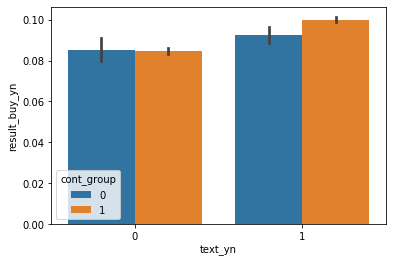

In [112]:
# text_yn

ax = sns.barplot(x="text_yn", y="result_buy_yn", hue="cont_group", data=data_cate)

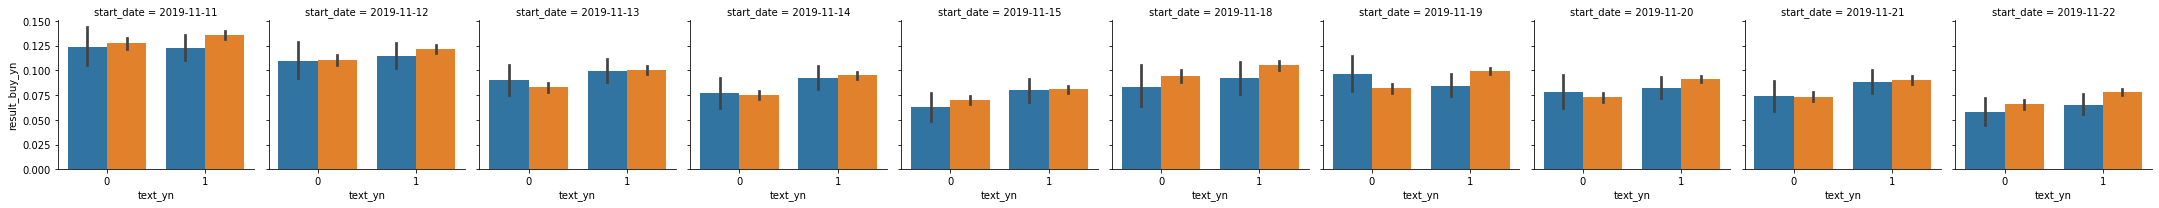

In [239]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'text_yn', 'result_buy_yn', 'cont_group', order=[0,1], hue_order=[0,1], palette = ['C0', 'C1'])

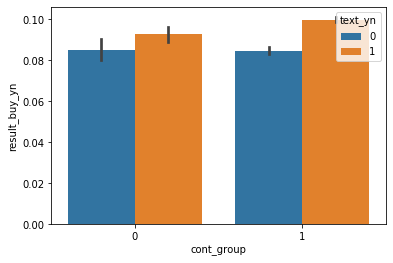

In [124]:
# text_yn

ax = sns.barplot(x="cont_group", y="result_buy_yn", hue="text_yn", data=data_cate)

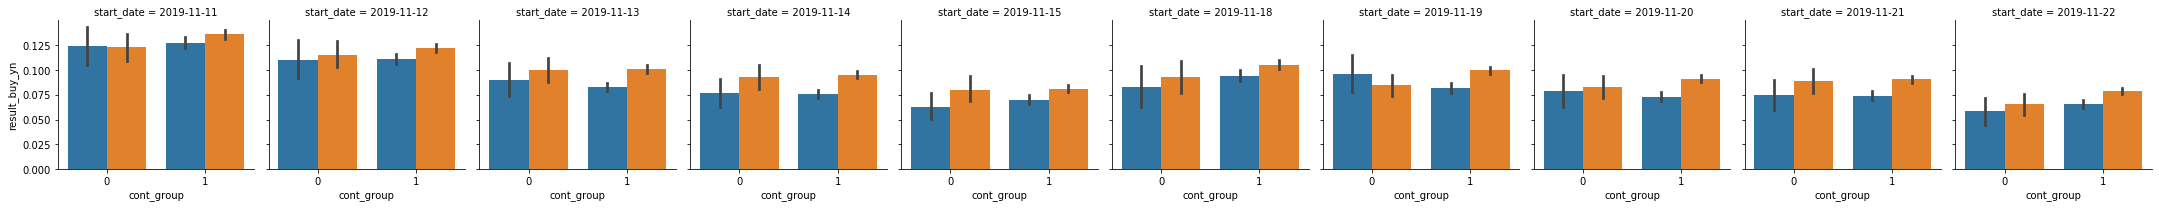

In [240]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'cont_group', 'result_buy_yn', 'text_yn', order=[0,1], hue_order=[0,1], palette = ['C0', 'C1'])

### 구매 데이터 한정, trt/cont 분포차이 확인

In [309]:
feature_ = cate_features[0];feature_

'text_yn'

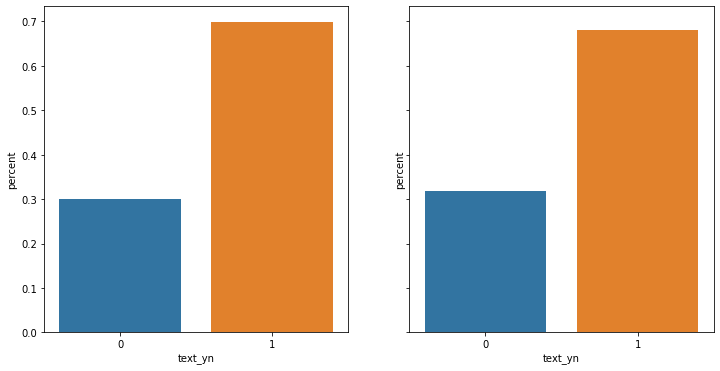

In [310]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

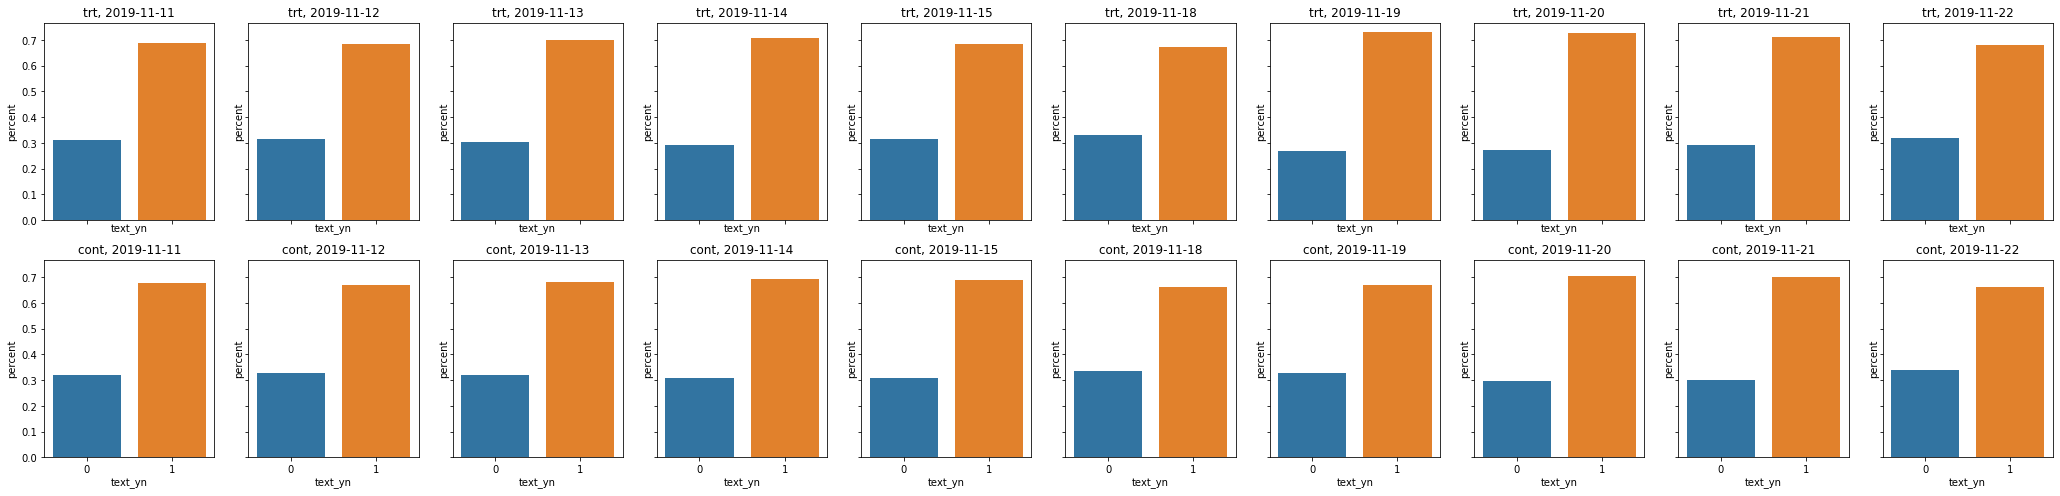

In [311]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

----

### ### 'push_yn'

In [116]:
cate_features[1]

'push_yn'

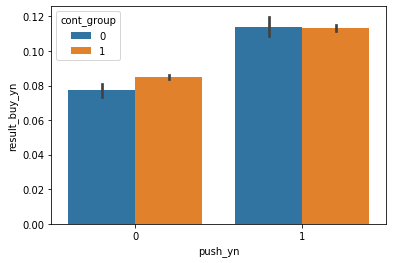

In [117]:
# push_yn

ax = sns.barplot(x="push_yn", y="result_buy_yn", hue="cont_group", data=data_cate)

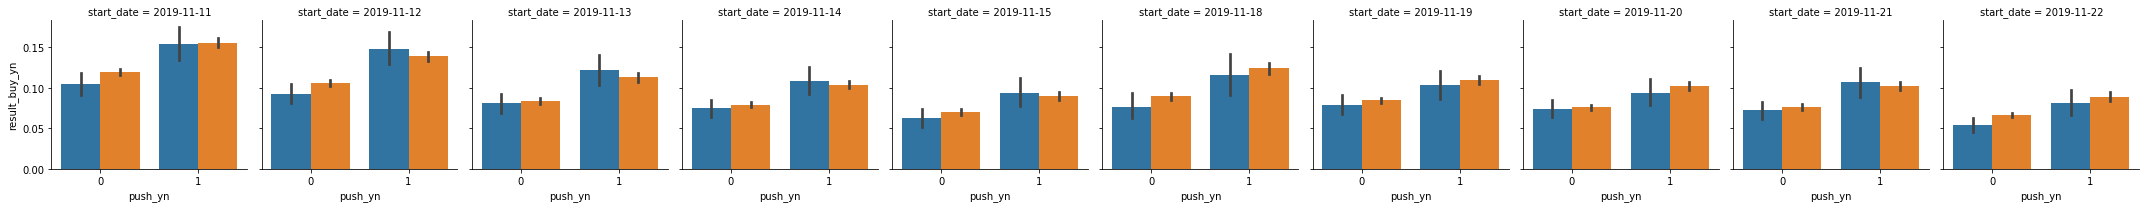

In [241]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'push_yn', 'result_buy_yn', 'cont_group', order=[0,1], hue_order=[0,1], palette = ['C0', 'C1'])

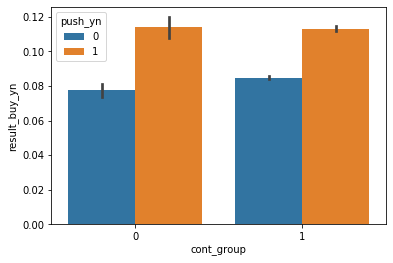

In [125]:
# push_yn

ax = sns.barplot(x="cont_group", y="result_buy_yn", hue="push_yn", data=data_cate)

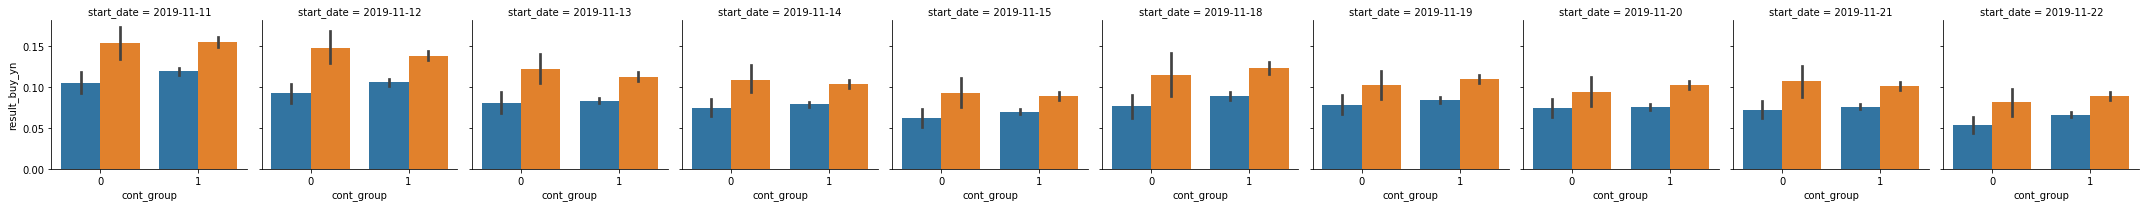

In [242]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'cont_group', 'result_buy_yn', 'push_yn', order=[0,1], hue_order=[0,1], palette = ['C0', 'C1'])

### 구매 데이터 한정, trt/cont 분포차이 확인

In [306]:
feature_ = cate_features[1];feature_

'push_yn'

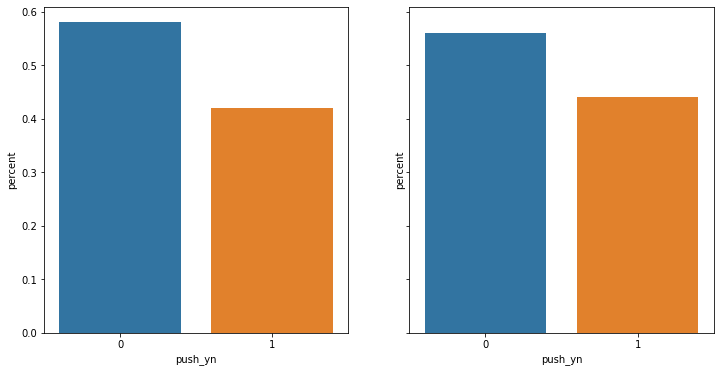

In [307]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

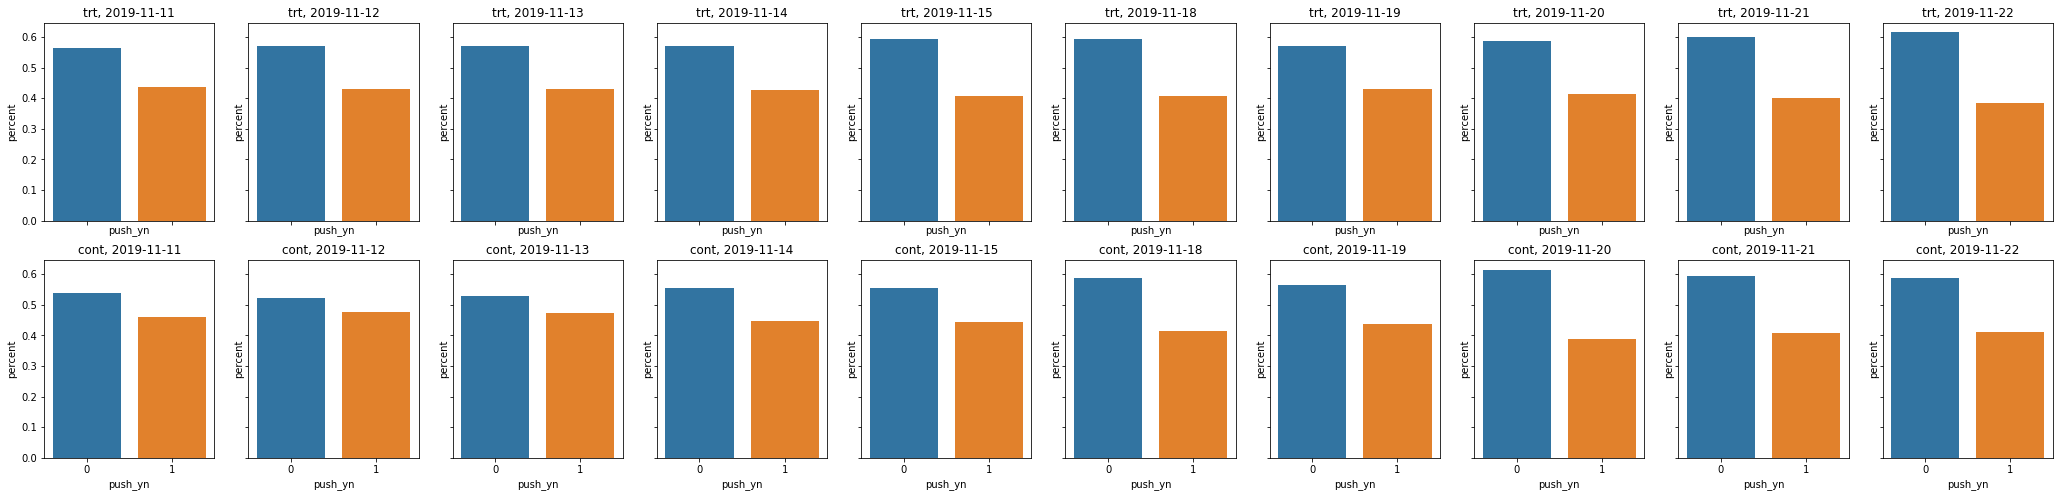

In [308]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

---

### ### 'mail_yn'

In [127]:
cate_features[2]

'mail_yn'

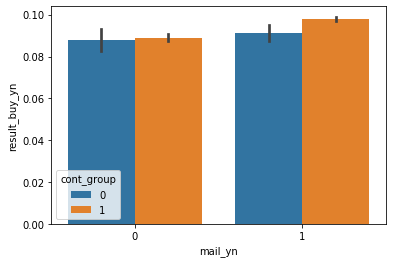

In [129]:
# mail_yn

ax = sns.barplot(x="mail_yn", y="result_buy_yn", hue="cont_group", data=data_cate)

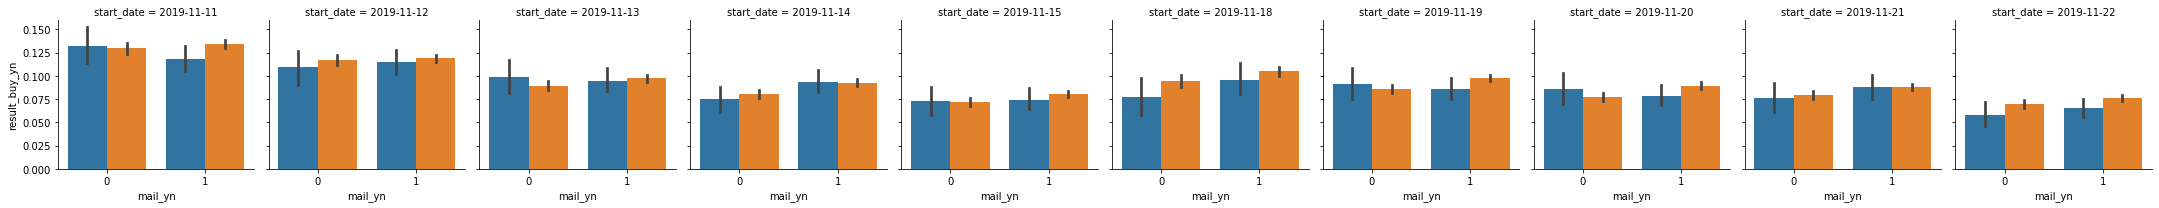

In [243]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'mail_yn', 'result_buy_yn', 'cont_group', order=[0,1], hue_order=[0,1], palette = ['C0', 'C1'])

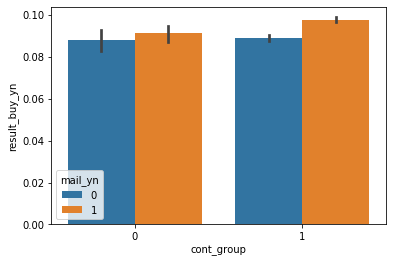

In [131]:
# push_yn

ax = sns.barplot(x="cont_group", y="result_buy_yn", hue="mail_yn", data=data_cate)

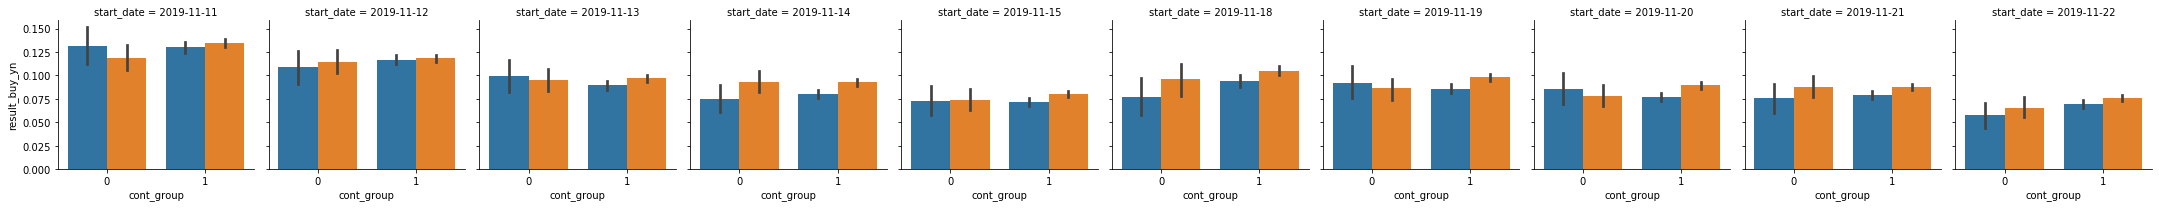

In [244]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'cont_group', 'result_buy_yn', 'mail_yn', order=[0,1], hue_order=[0,1], palette = ['C0', 'C1'])

### 구매 데이터 한정, trt/cont 분포차이 확인

In [304]:
feature_ = cate_features[2];feature_

'mail_yn'

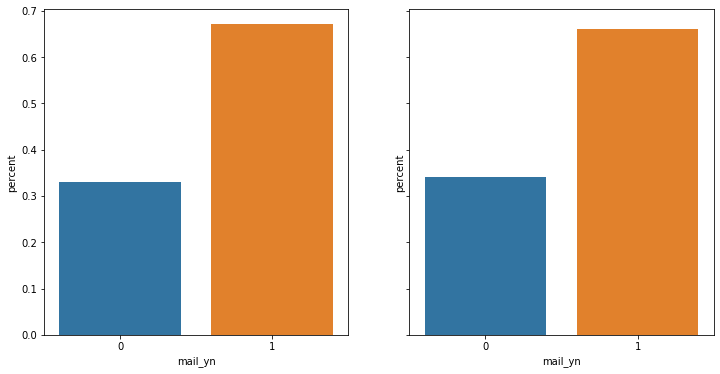

In [298]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

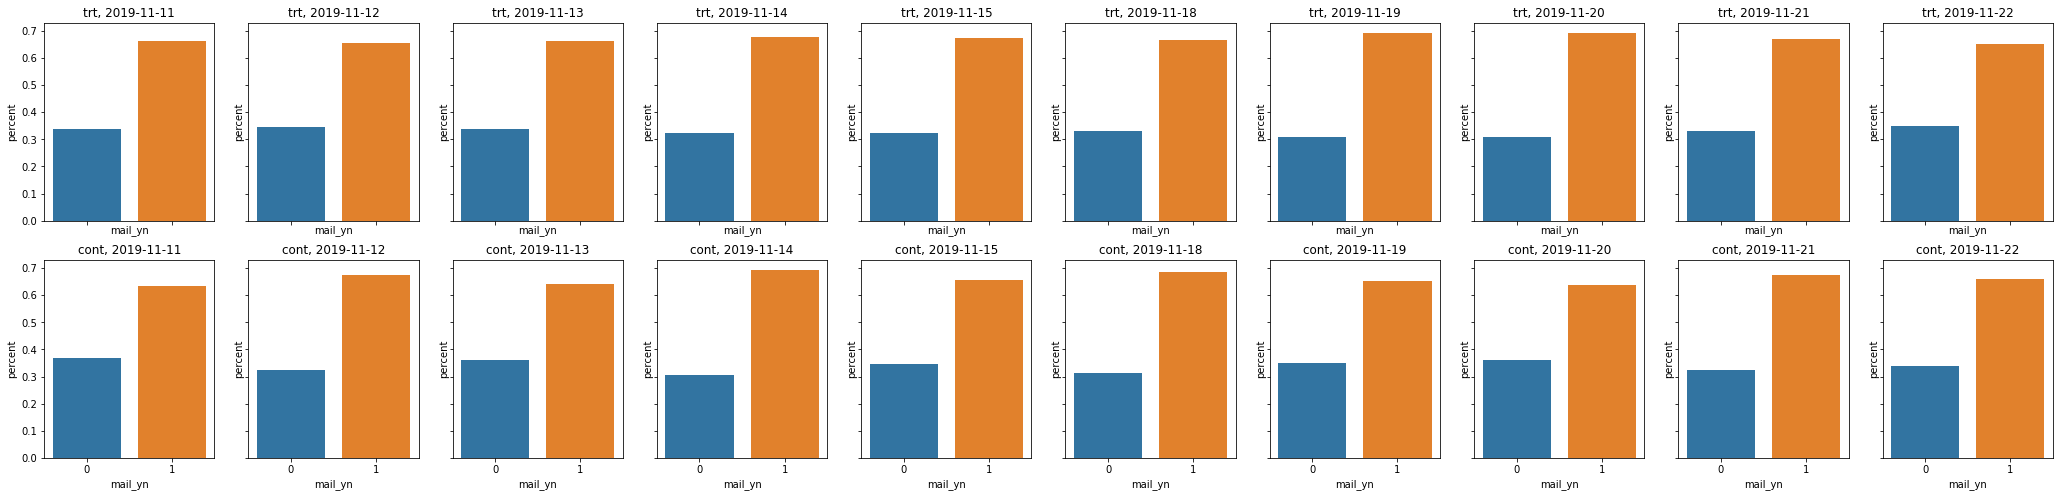

In [305]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

----

### ### 'buying_trend_group'

In [133]:
cate_features[3]

'buying_trend_group'

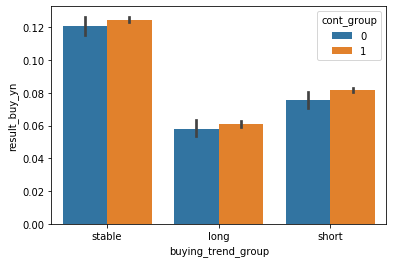

In [134]:
# buying_trend_group

ax = sns.barplot(x="buying_trend_group", y="result_buy_yn", hue="cont_group", data=data_cate)

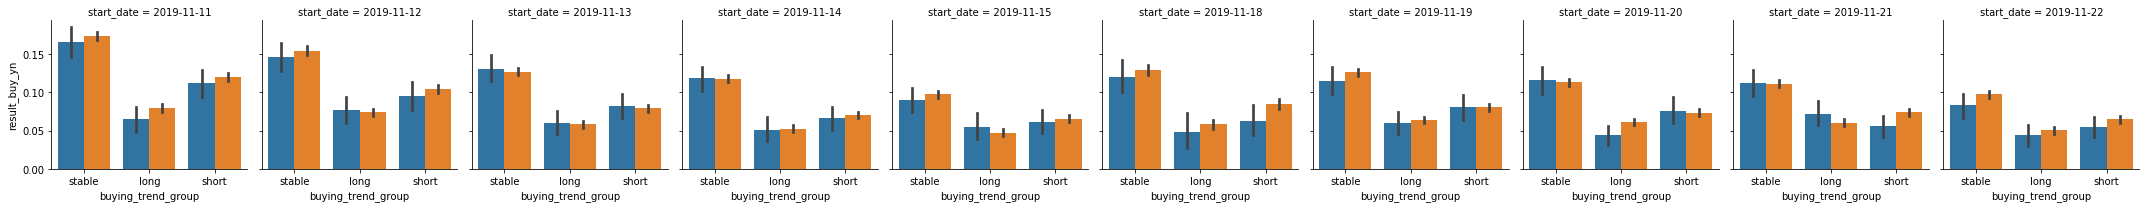

In [245]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'buying_trend_group', 'result_buy_yn', 'cont_group', order=['stable', 'long', 'short'], hue_order=[0,1], palette = ['C0', 'C1'])

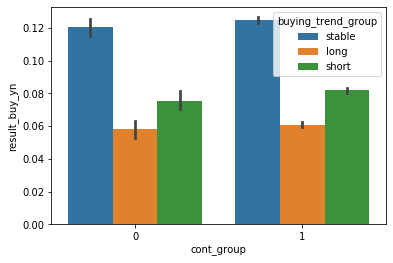

In [136]:
# 

ax = sns.barplot(x="cont_group", y="result_buy_yn", hue="buying_trend_group", data=data_cate)

In [246]:
# automatic dictionary for 'palette'
unique = ['stable', 'long', 'short']
palette = dict(zip(unique, sns.color_palette()))
palette.update({"Total":"k"})

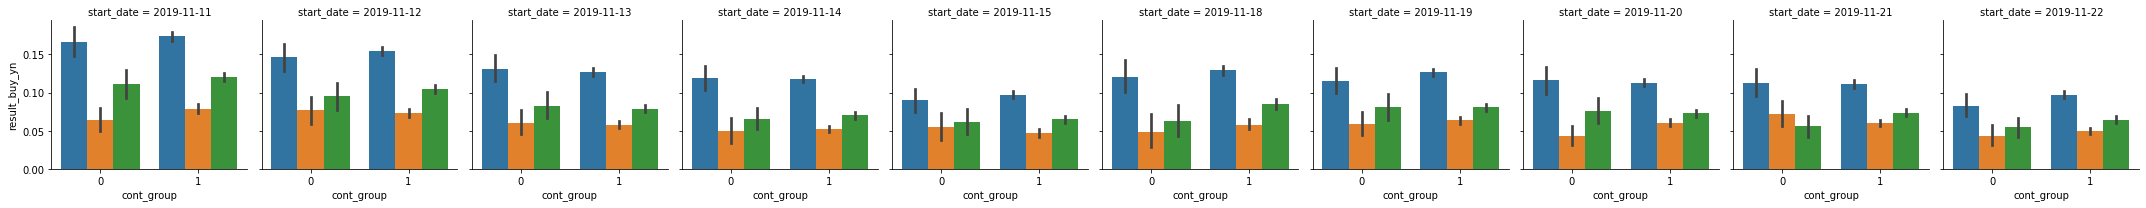

In [247]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'cont_group', 'result_buy_yn', 'buying_trend_group', order=[0,1], hue_order=['stable', 'long', 'short'], palette = palette)

### 구매 데이터 한정, trt/cont 분포차이 확인

In [300]:
feature_ = cate_features[3];feature_

'buying_trend_group'

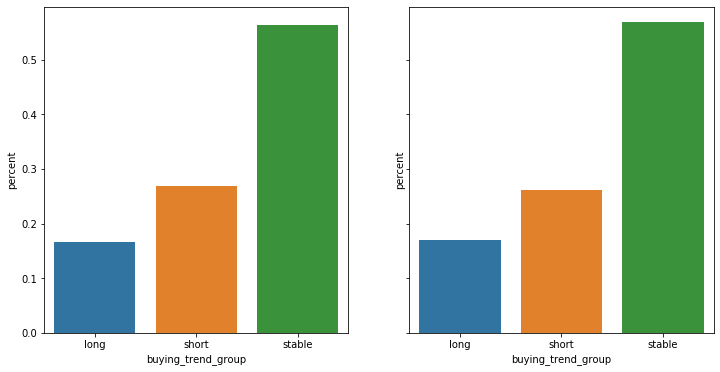

In [301]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

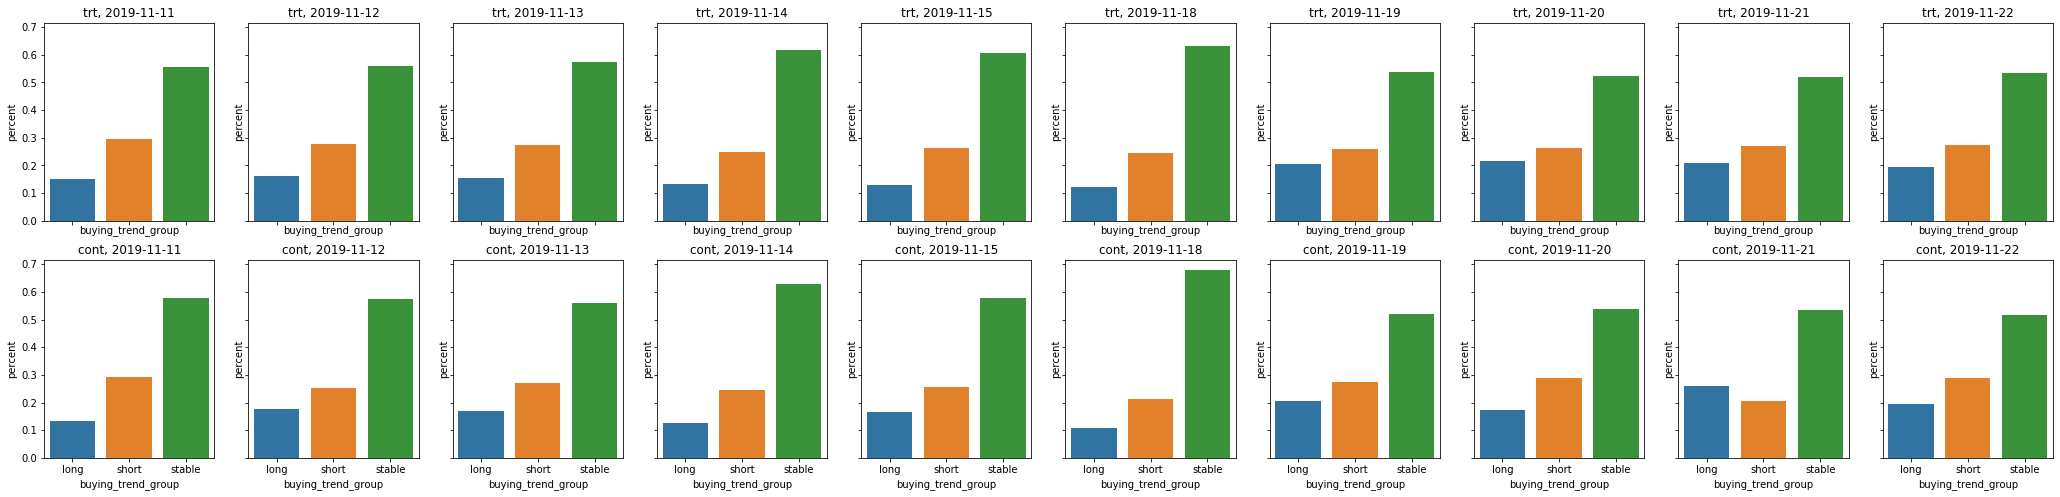

In [303]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

---

### ### 'buy_ep_yn_3day'

In [138]:
cate_features[4]

'buy_ep_yn_3day'

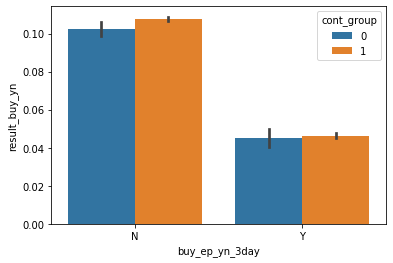

In [139]:
# buy_ep_yn_3day

ax = sns.barplot(x="buy_ep_yn_3day", y="result_buy_yn", hue="cont_group", data=data_cate)

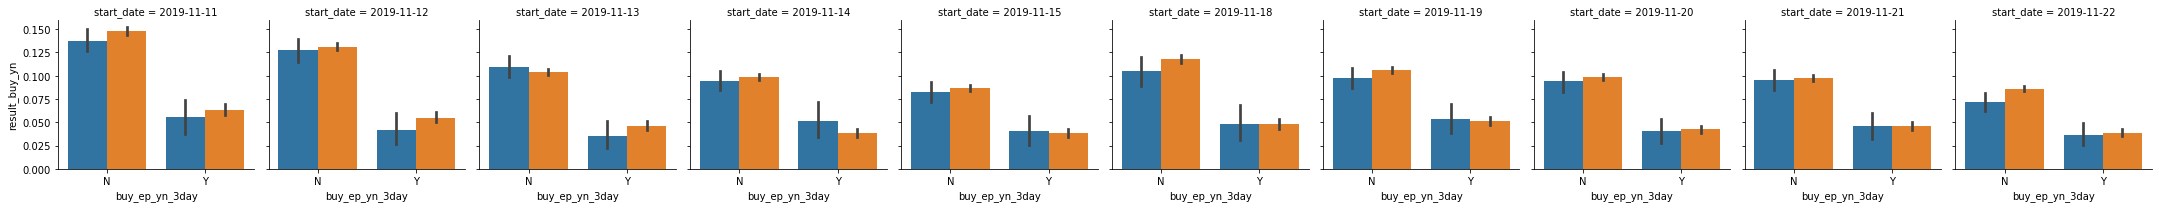

In [248]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'buy_ep_yn_3day', 'result_buy_yn', 'cont_group', order=['N', 'Y'], hue_order=[0,1], palette = ['C0', 'C1'])

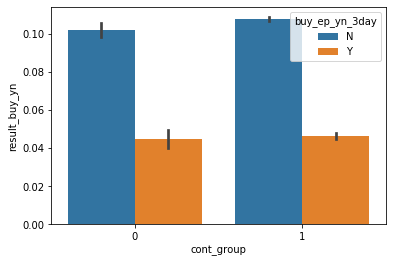

In [141]:
# 

ax = sns.barplot(x="cont_group", y="result_buy_yn", hue="buy_ep_yn_3day", data=data_cate)

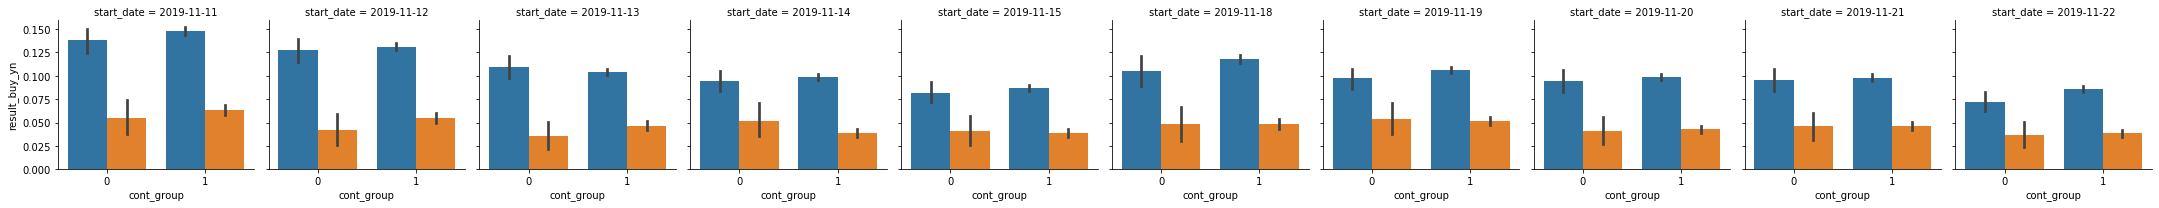

In [249]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'cont_group', 'result_buy_yn', 'buy_ep_yn_3day', order=[0,1], hue_order=['N', 'Y'], palette = ['C0', 'C1'])

### 구매 데이터 한정, trt/cont 분포차이 확인

In [312]:
feature_ = cate_features[4];feature_

'buy_ep_yn_3day'

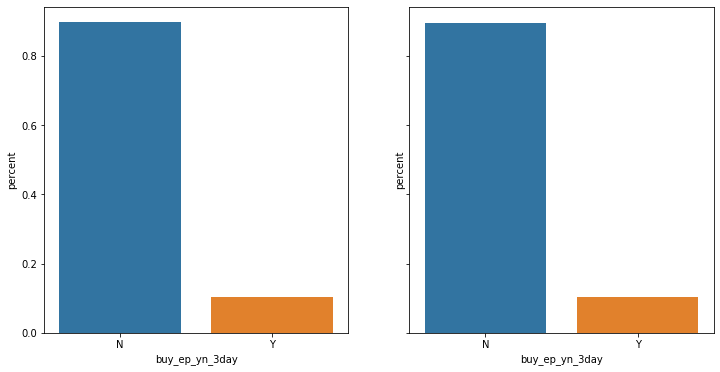

In [313]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

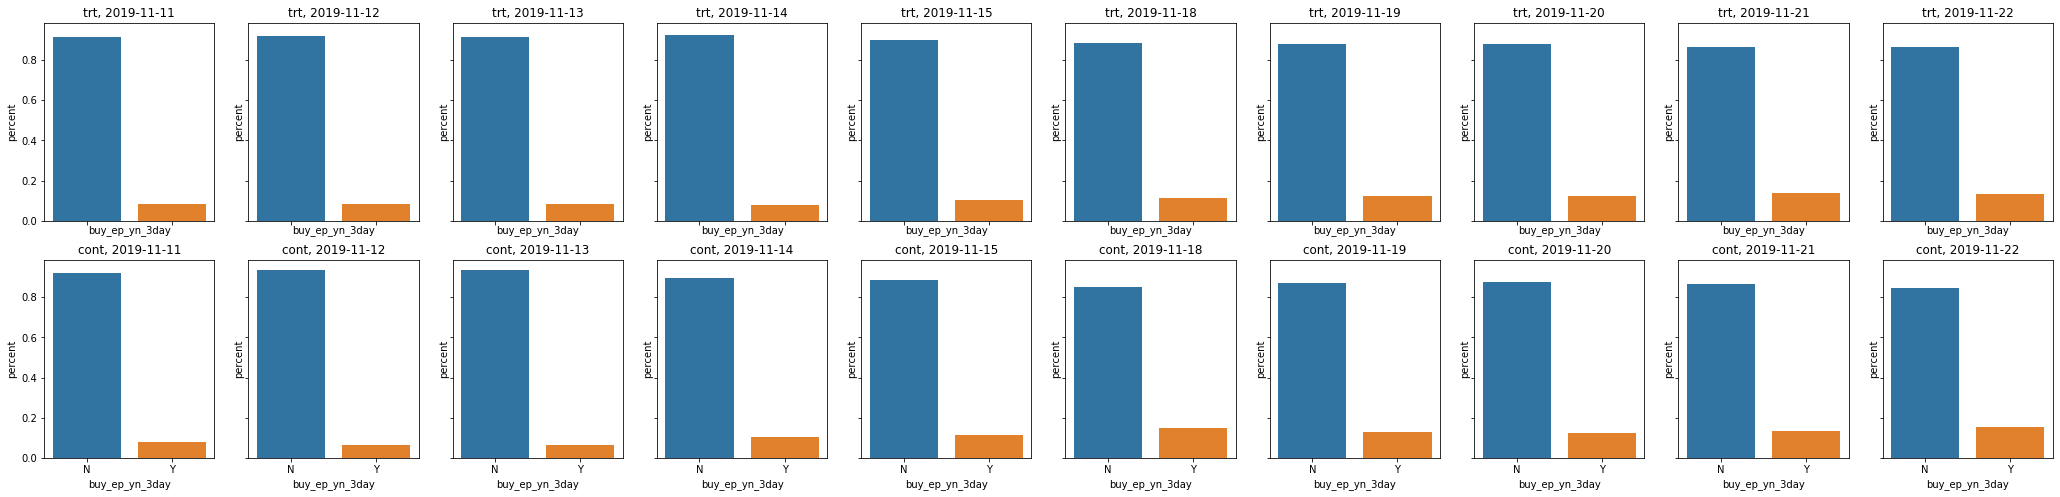

In [314]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

---

### ### 'visit_gubn'

In [144]:
cate_features[5]

'visit_gubn'

In [318]:
data_cate.groupby(['cont_group', 'visit_gubn'])['result_buy_yn'].mean()

cont_group  visit_gubn
0           N             0.069378
            O             0.102451
            R             0.036430
1           N             0.076633
            O             0.107769
            R             0.036258
Name: result_buy_yn, dtype: float64

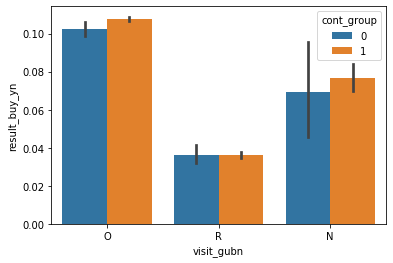

In [145]:
# visit_gubn

ax = sns.barplot(x="visit_gubn", y="result_buy_yn", hue="cont_group", data=data_cate)

In [253]:
data_cate.groupby(['cont_group', 'visit_gubn']).size()

cont_group  visit_gubn
0           N                418
            O              25905
            R               5792
1           N               5298
            O             314266
            R              67875
dtype: int64

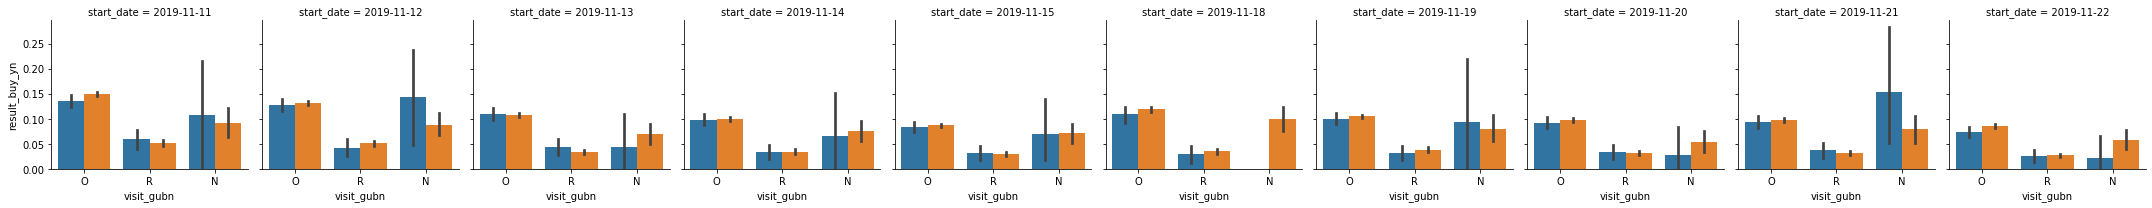

In [250]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'visit_gubn', 'result_buy_yn', 'cont_group', order=['O', 'R', 'N'], hue_order=[0,1], palette = ['C0', 'C1'])

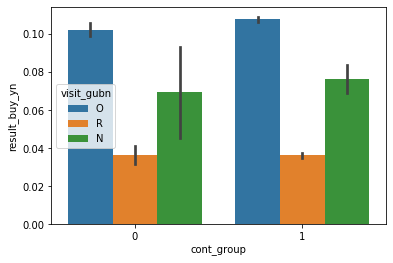

In [148]:
# 

ax = sns.barplot(x="cont_group", y="result_buy_yn", hue="visit_gubn", data=data_cate)

In [251]:
# automatic dictionary for 'palette'
unique = [ 'O', 'R', 'N' ]
palette = dict(zip(unique, sns.color_palette()))
palette.update({"Total":"k"})

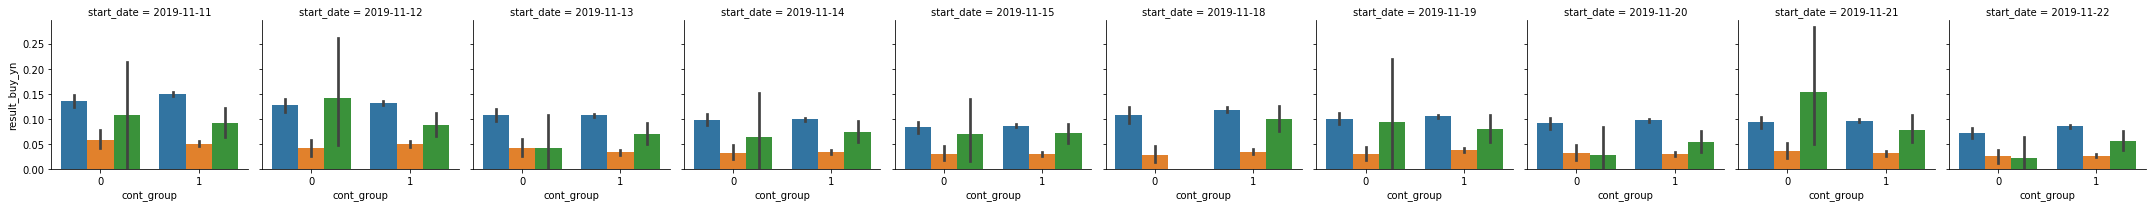

In [252]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'cont_group', 'result_buy_yn', 'visit_gubn', order=[0,1], hue_order=['O', 'R', 'N'], palette = palette)

### 구매 데이터 한정, trt/cont 분포차이 확인

In [315]:
feature_ = cate_features[5];feature_

'visit_gubn'

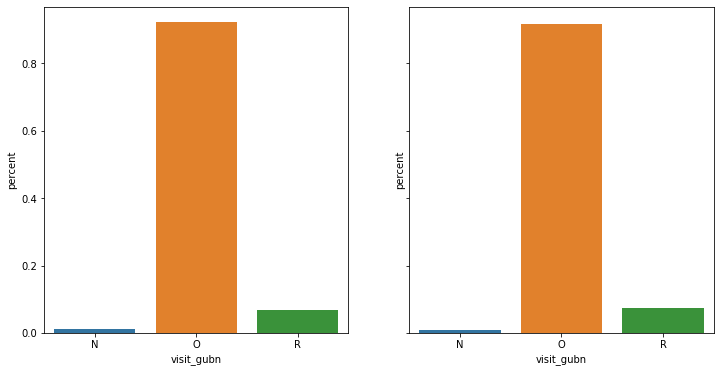

In [316]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

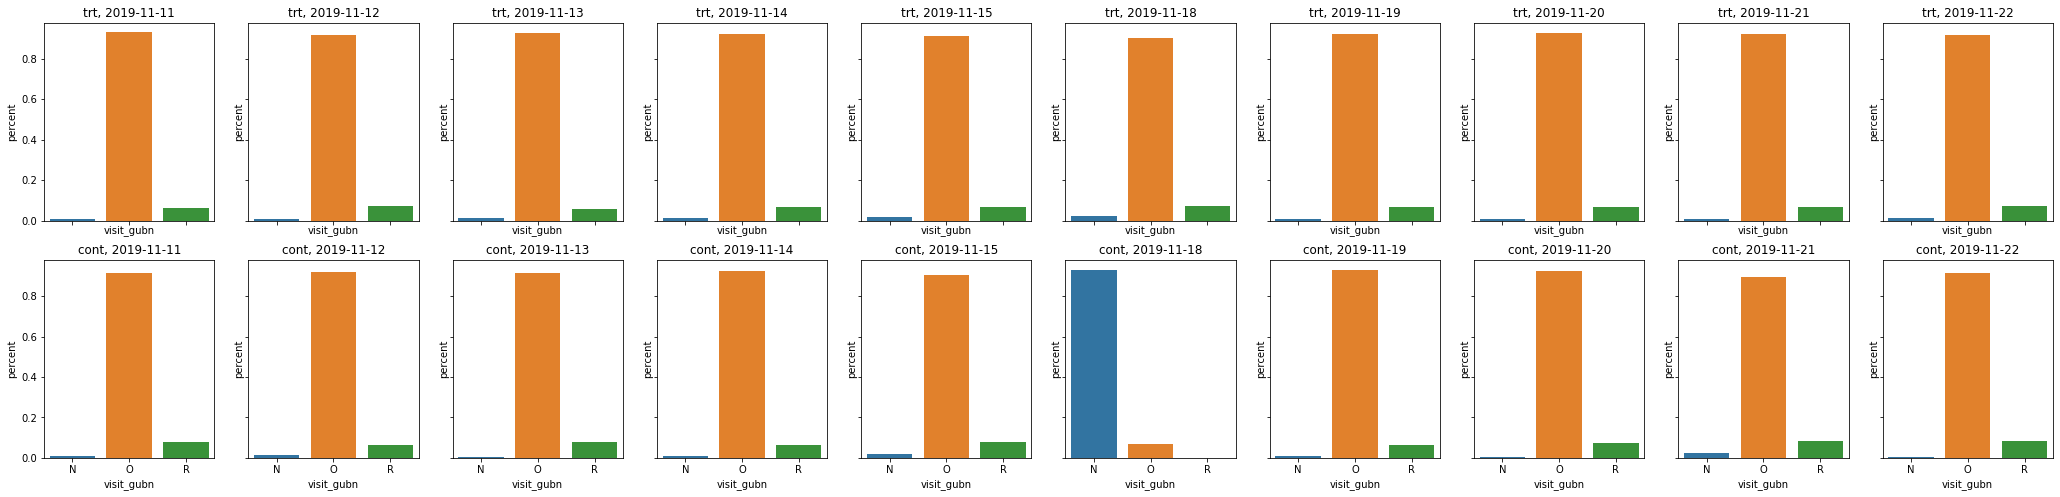

In [319]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

---

### ### 'last_buy_seg'

In [152]:
cate_features[6]

'last_buy_seg'

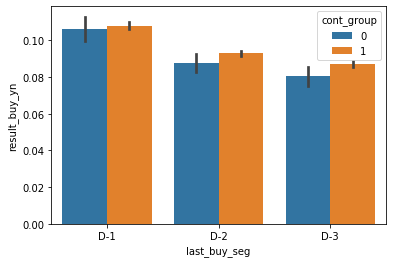

In [154]:
# visit_gubn

ax = sns.barplot(x="last_buy_seg", y="result_buy_yn", hue="cont_group", data=data_cate, order=['D-1', 'D-2', 'D-3'])

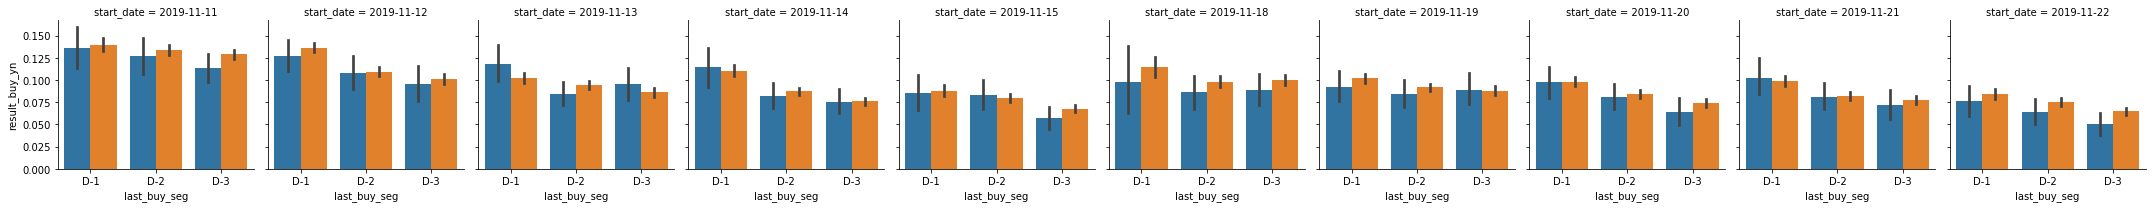

In [254]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'last_buy_seg', 'result_buy_yn', 'cont_group', order=['D-1', 'D-2', 'D-3'], hue_order=[0,1], palette = ['C0', 'C1'])

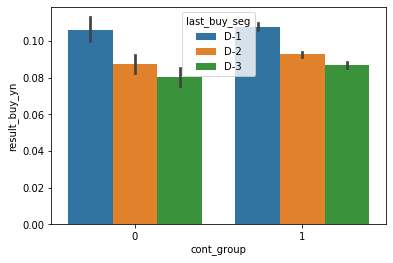

In [157]:
# 

ax = sns.barplot(x="cont_group", y="result_buy_yn", hue="last_buy_seg", data=data_cate, hue_order=['D-1', 'D-2', 'D-3'])

In [255]:
# automatic dictionary for 'palette'
unique = ['D-1', 'D-2', 'D-3']
palette = dict(zip(unique, sns.color_palette()))
palette.update({"Total":"k"})

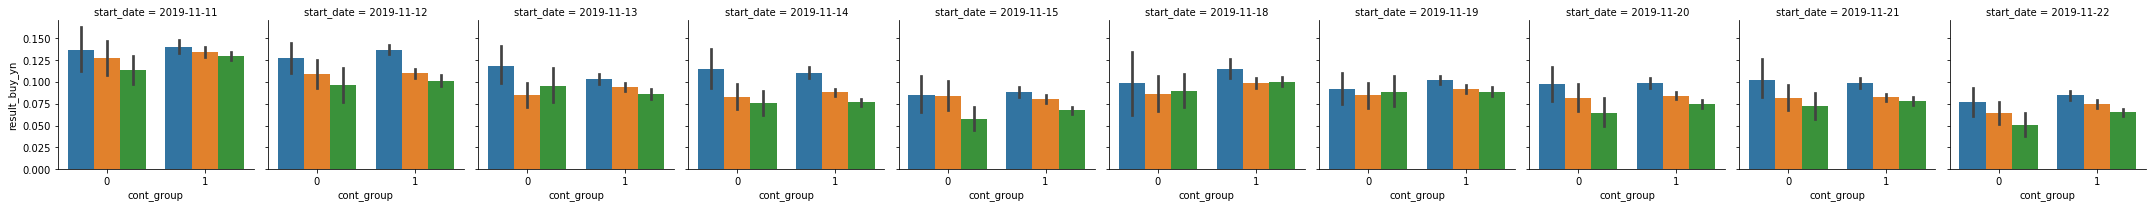

In [256]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'cont_group', 'result_buy_yn', 'last_buy_seg', order=[0,1], hue_order=['D-1', 'D-2', 'D-3'], palette = palette)

### 구매 데이터 한정, trt/cont 분포차이 확인

In [320]:
feature_ = cate_features[6];feature_

'last_buy_seg'

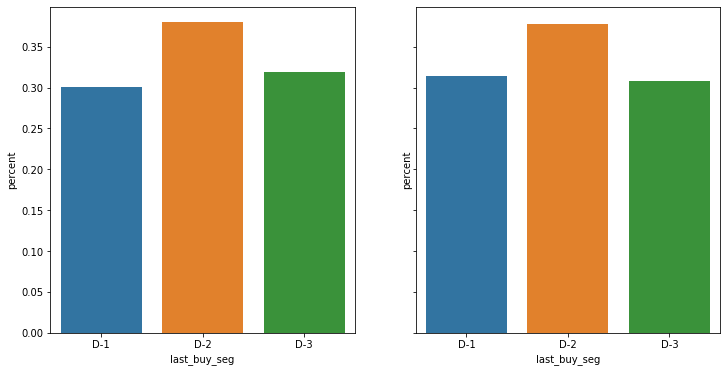

In [321]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

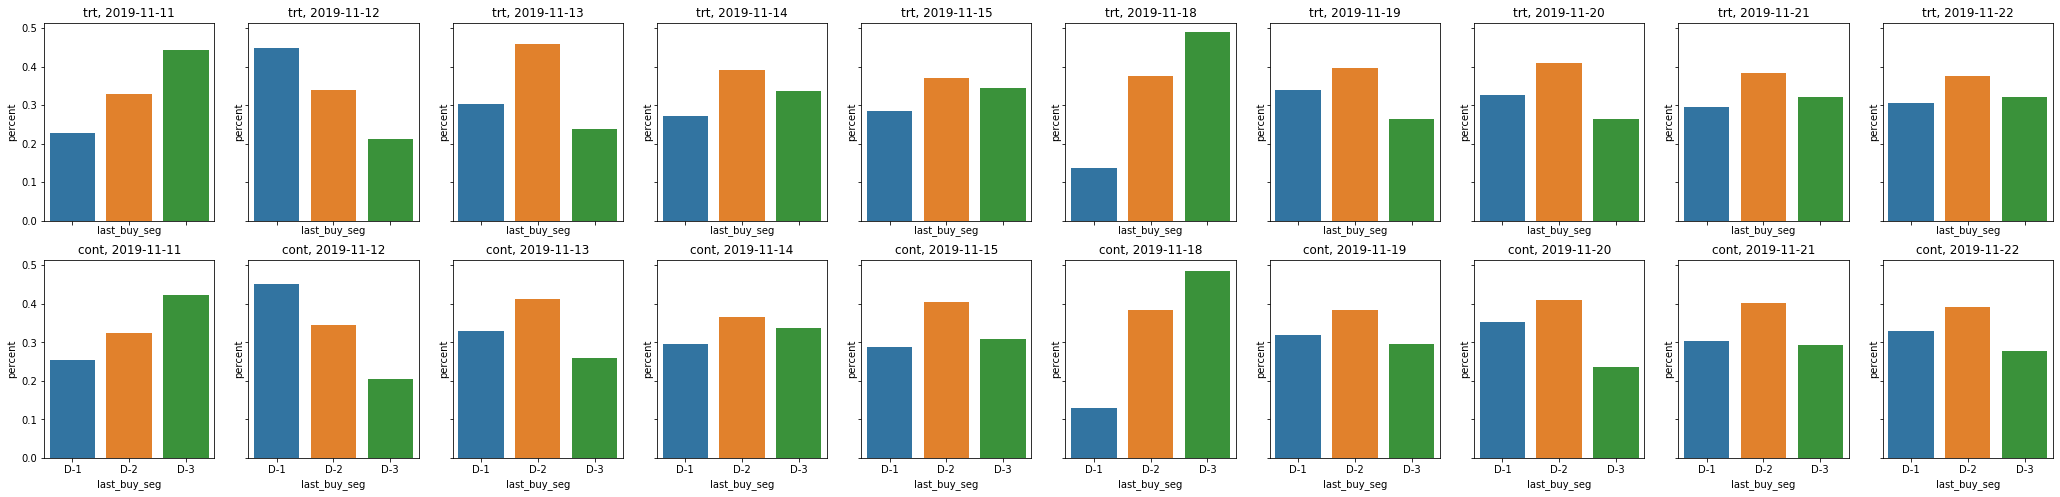

In [322]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

---

### ### 'last_buy_platform'

In [163]:
cate_features[7]

'last_buy_platform'

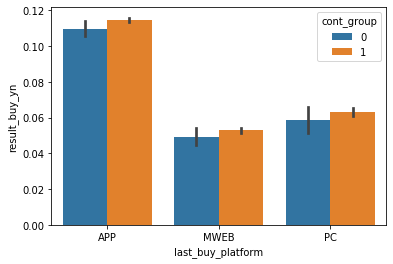

In [164]:
# last_buy_platform

ax = sns.barplot(x="last_buy_platform", y="result_buy_yn", hue="cont_group", data=data_cate)

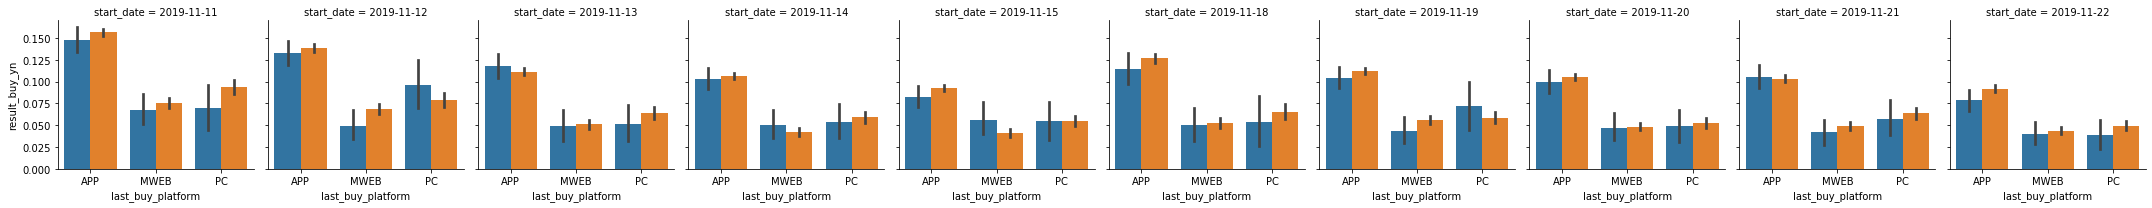

In [257]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'last_buy_platform', 'result_buy_yn', 'cont_group', order=['APP', 'MWEB', 'PC'], hue_order=[0,1], palette = ['C0', 'C1'])

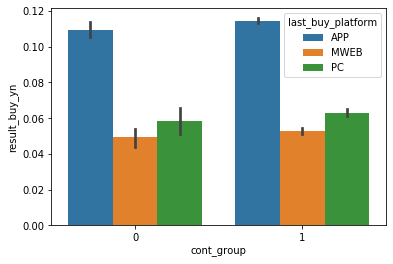

In [168]:
# 

ax = sns.barplot(x="cont_group", y="result_buy_yn", hue="last_buy_platform", data=data_cate, hue_order = ['APP', 'MWEB', 'PC'])

In [258]:
# automatic dictionary for 'palette'
unique = ['APP', 'MWEB', 'PC']
palette = dict(zip(unique, sns.color_palette()))
palette.update({"Total":"k"})

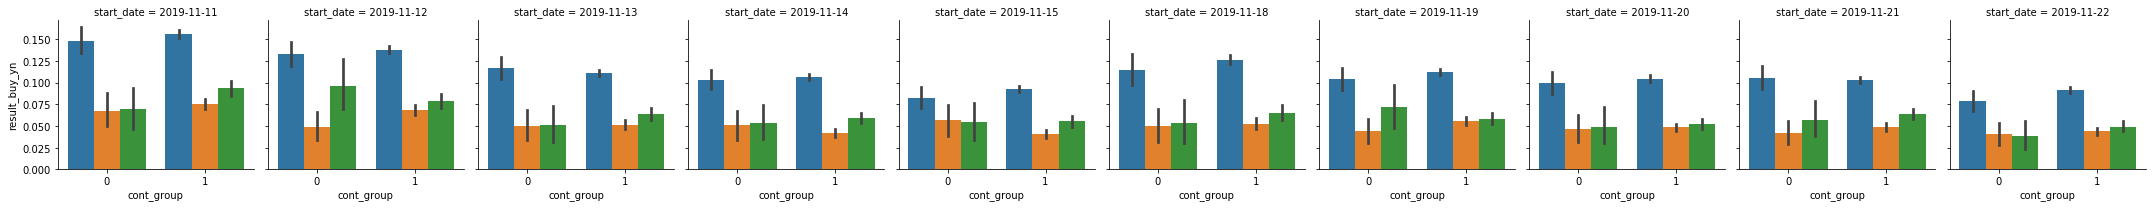

In [259]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'cont_group', 'result_buy_yn', 'last_buy_platform', order=[0,1], hue_order=['APP', 'MWEB', 'PC'], palette = palette)

### 구매 데이터 한정, trt/cont 분포차이 확인

In [324]:
feature_ = cate_features[7];feature_

'last_buy_platform'

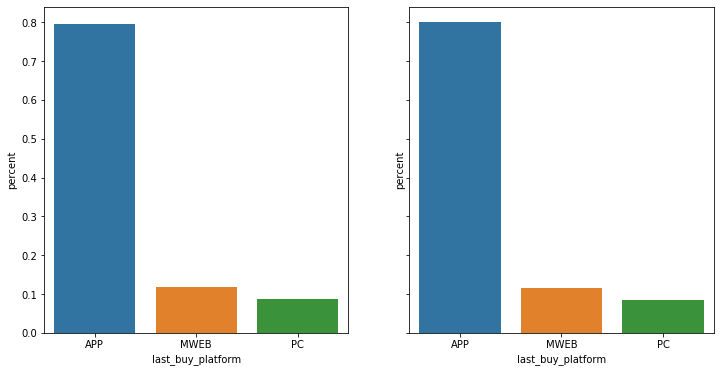

In [325]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

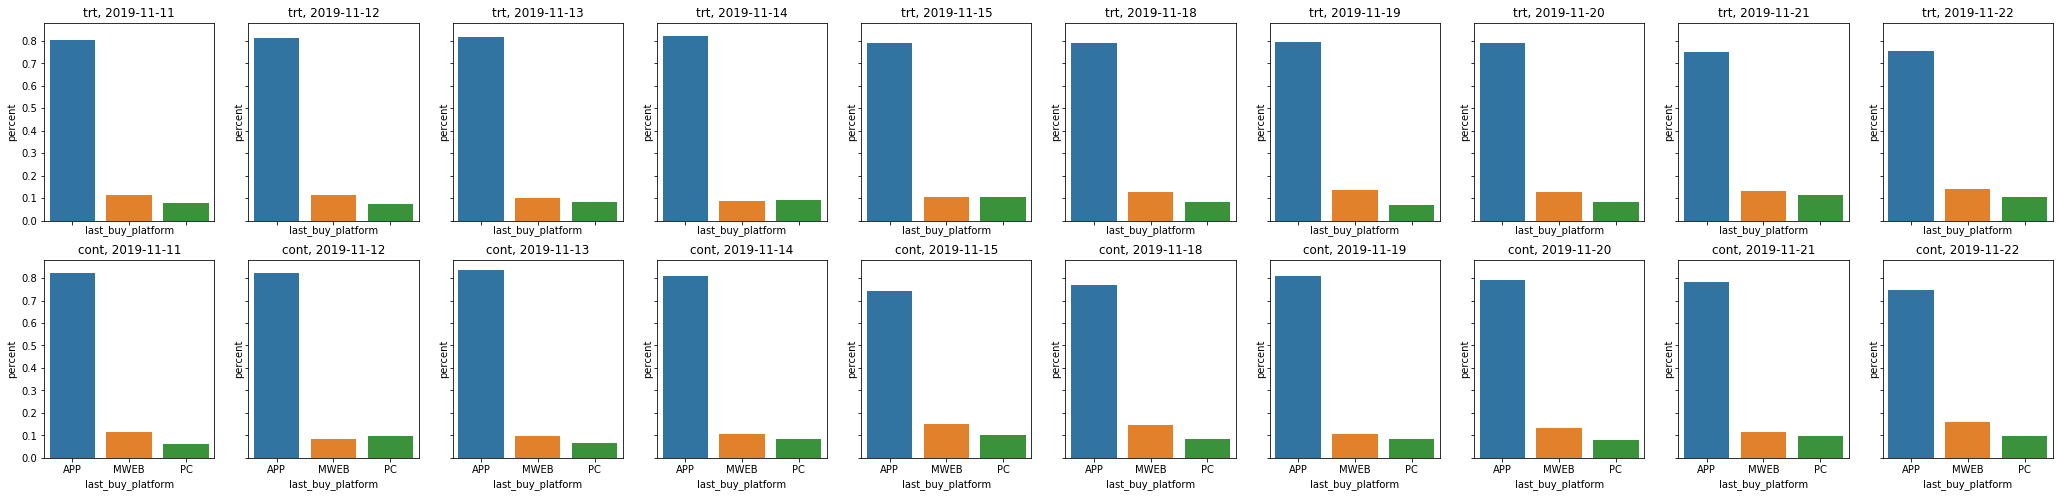

In [326]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

----

### ### 'wmp_pay_yn'

In [170]:
cate_features[8]

'wmp_pay_yn'

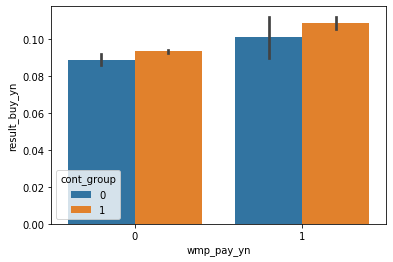

In [171]:
# last_buy_platform

ax = sns.barplot(x='wmp_pay_yn', y="result_buy_yn", hue="cont_group", data=data_cate)

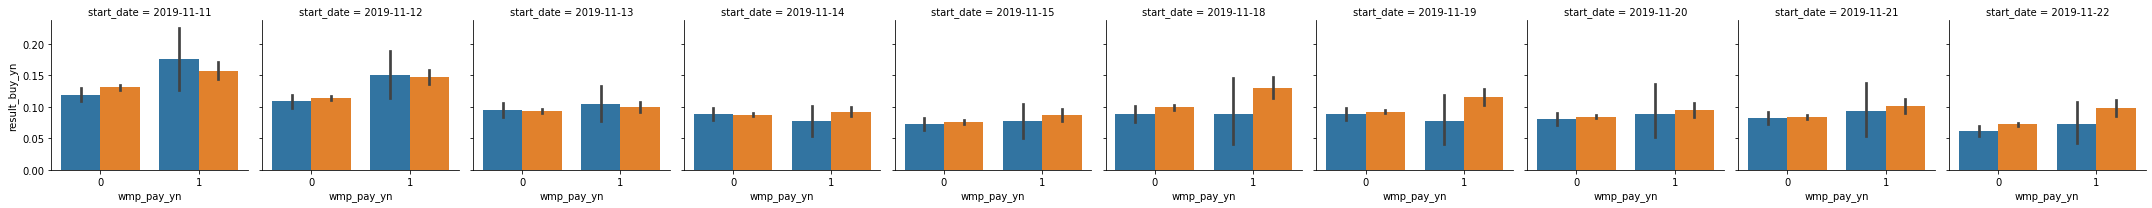

In [260]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'wmp_pay_yn', 'result_buy_yn', 'cont_group', order=[0, 1], hue_order=[0,1], palette = ['C0', 'C1'])

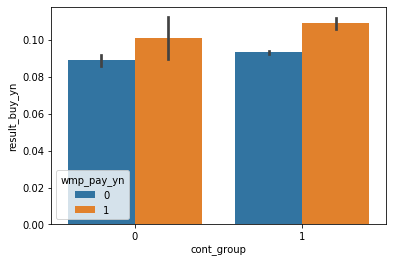

In [174]:
# 

ax = sns.barplot(x="cont_group", y="result_buy_yn", hue="wmp_pay_yn", data=data_cate, hue_order = [0, 1])

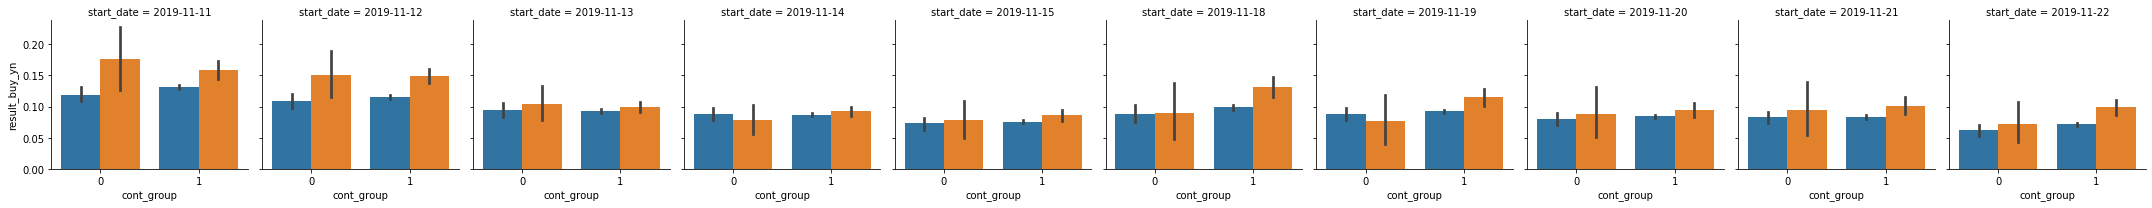

In [261]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'cont_group', 'result_buy_yn', 'wmp_pay_yn', order=[0,1], hue_order=[0 , 1], palette = ['C0', 'C1'])

### 구매 데이터 한정, trt/cont 분포차이 확인

In [327]:
feature_ = cate_features[8];feature_

'wmp_pay_yn'

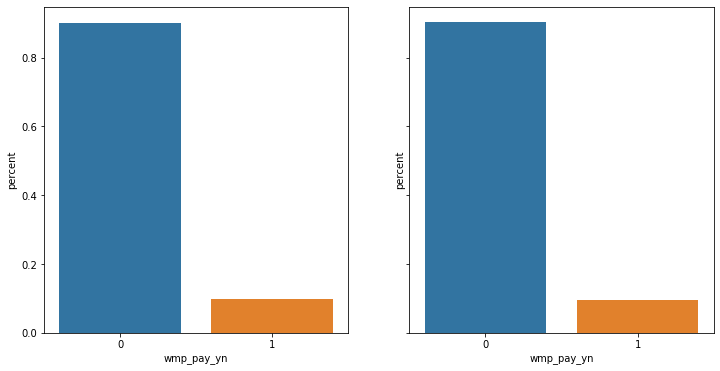

In [328]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

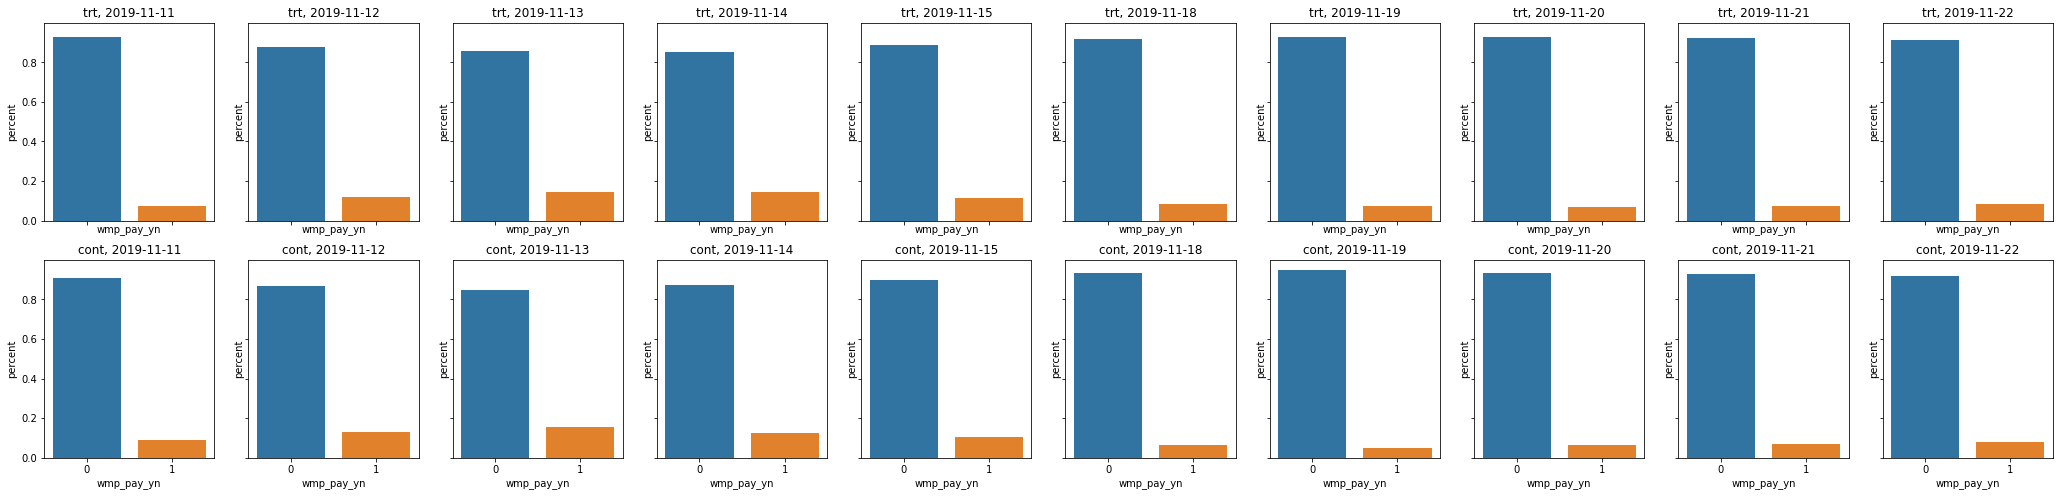

In [329]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

----

### ### 'referral_flag'

In [176]:
cate_features[9]

'referral_flag'

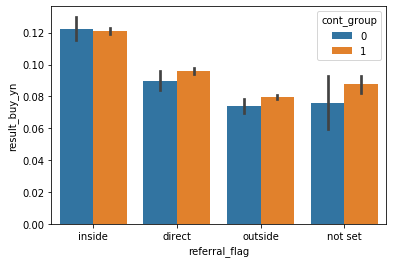

In [178]:
# last_buy_platform

ax = sns.barplot(x='referral_flag', y="result_buy_yn", hue="cont_group", data=data_cate, order = ['inside', 'direct', 'outside', 'not set'])

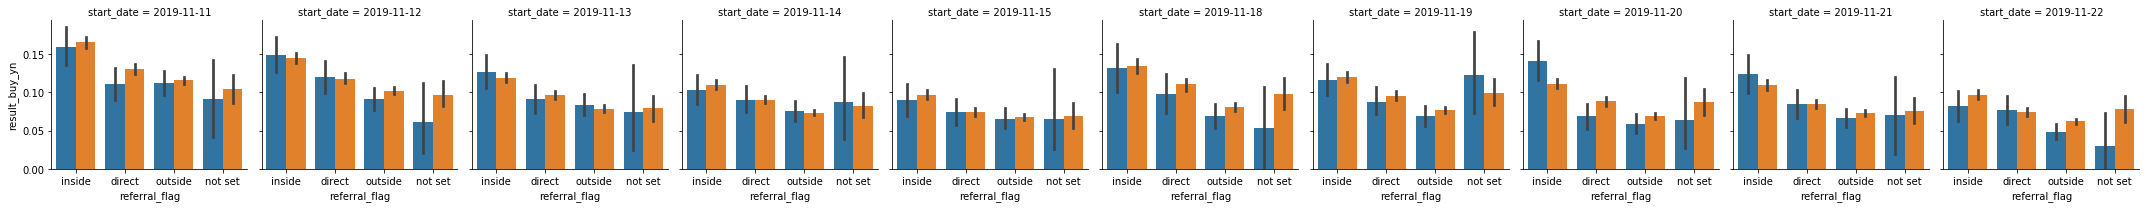

In [262]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'referral_flag', 'result_buy_yn', 'cont_group', order=['inside', 'direct', 'outside', 'not set'], hue_order=[0,1], palette = ['C0', 'C1'])

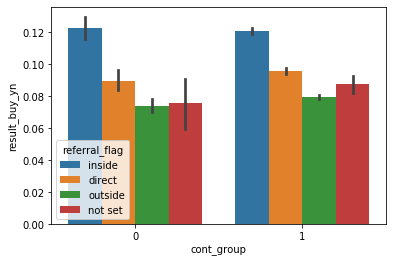

In [180]:
# 

ax = sns.barplot(x="cont_group", y="result_buy_yn", hue="referral_flag", data=data_cate, hue_order = ['inside', 'direct', 'outside', 'not set'])

In [263]:
# automatic dictionary for 'palette'
unique = ['inside', 'direct', 'outside', 'not set']
palette = dict(zip(unique, sns.color_palette()))
palette.update({"Total":"k"})

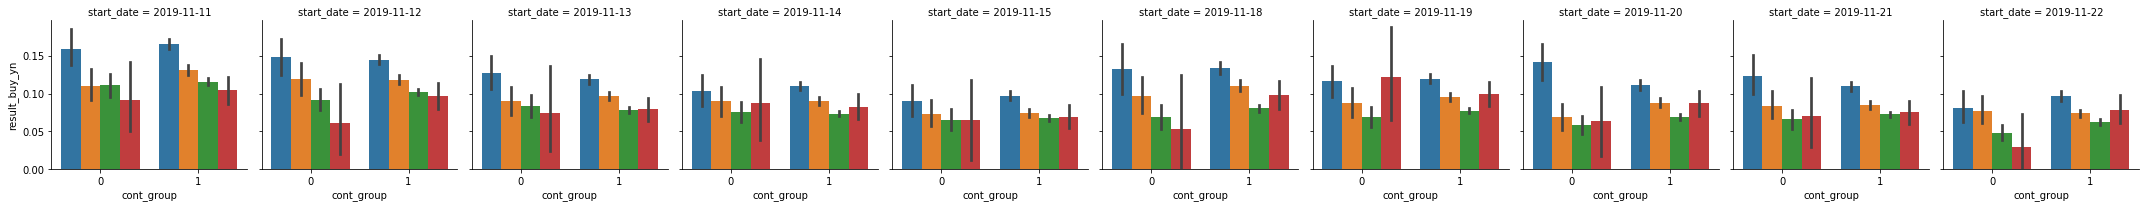

In [264]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'cont_group', 'result_buy_yn', 'referral_flag', order=[0,1], hue_order=['inside', 'direct', 'outside', 'not set'], palette = palette)

### 구매 데이터 한정, trt/cont 분포차이 확인

In [330]:
feature_ = cate_features[9];feature_

'referral_flag'

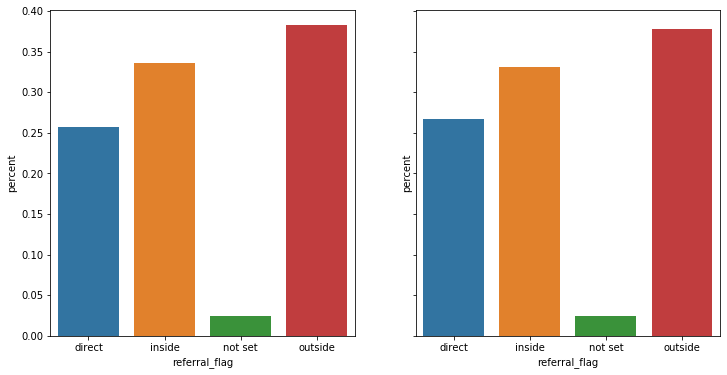

In [331]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

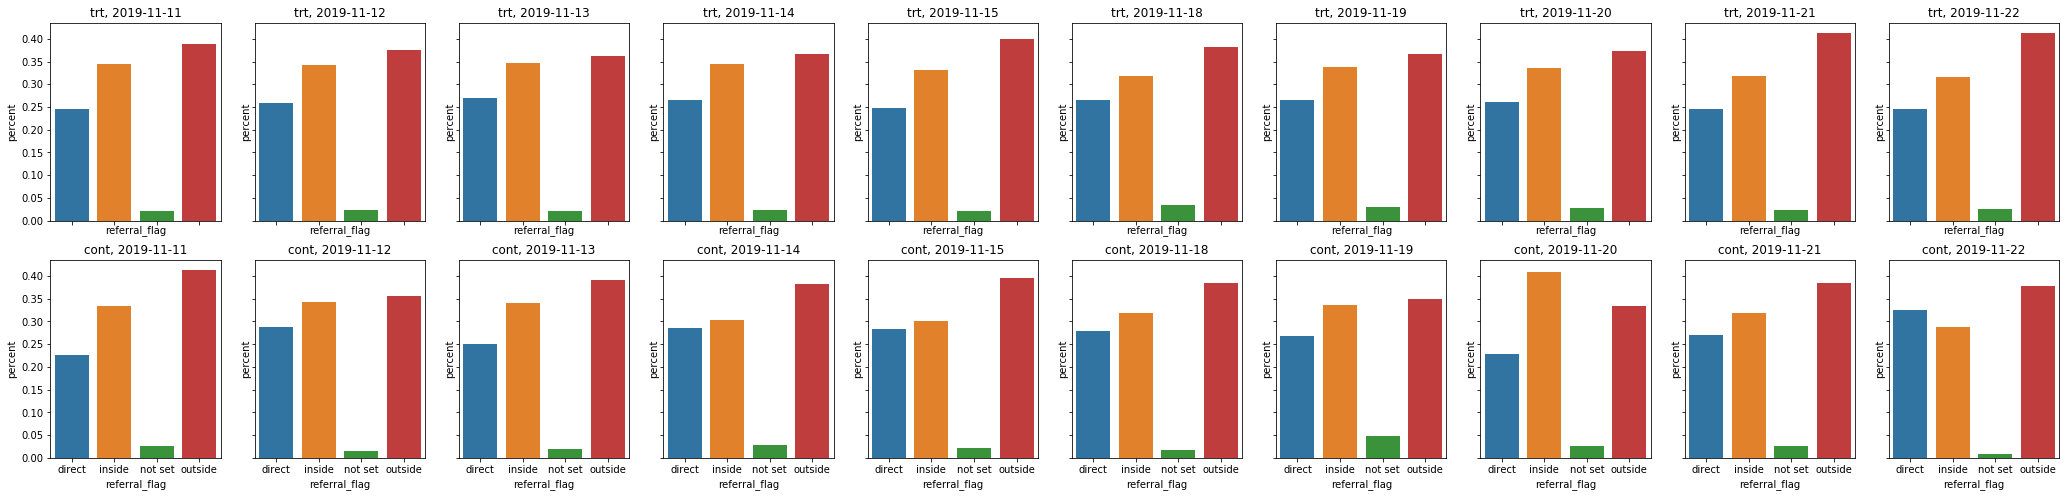

In [332]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

---

### ### 'order_route'

In [182]:
cate_features[10]

'order_route'

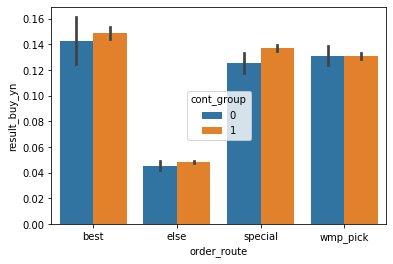

In [183]:
# last_buy_platform

ax = sns.barplot(x='order_route', y="result_buy_yn", hue="cont_group", data=data_cate)

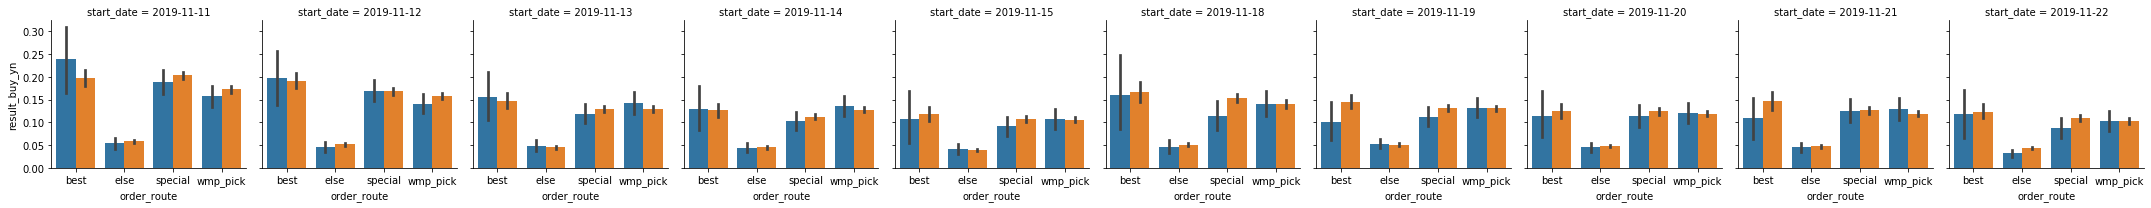

In [333]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'order_route', 'result_buy_yn', 'cont_group', order=['best', 'else', 'special', 'wmp_pick'], hue_order=[0,1], palette = ['C0', 'C1'])

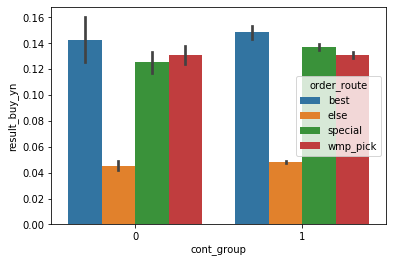

In [185]:
# 

ax = sns.barplot(x="cont_group", y="result_buy_yn", hue="order_route", data=data_cate, hue_order = ['best', 'else', 'special', 'wmp_pick'])

In [334]:
# automatic dictionary for 'palette'
unique = ['best', 'else', 'special', 'wmp_pick']
palette = dict(zip(unique, sns.color_palette()))
palette.update({"Total":"k"})

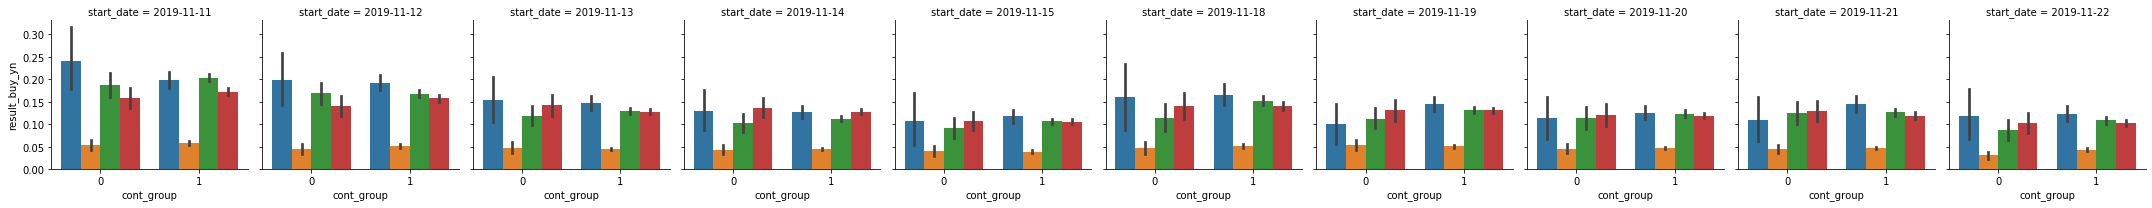

In [335]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'cont_group', 'result_buy_yn', 'order_route', order=[0,1], hue_order=['best', 'else', 'special', 'wmp_pick'], palette = palette)

### 구매 데이터 한정, trt/cont 분포차이 확인

In [336]:
feature_ = cate_features[10];feature_

'order_route'

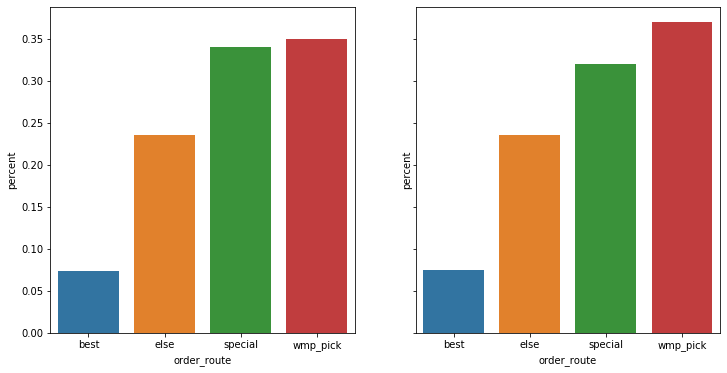

In [337]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

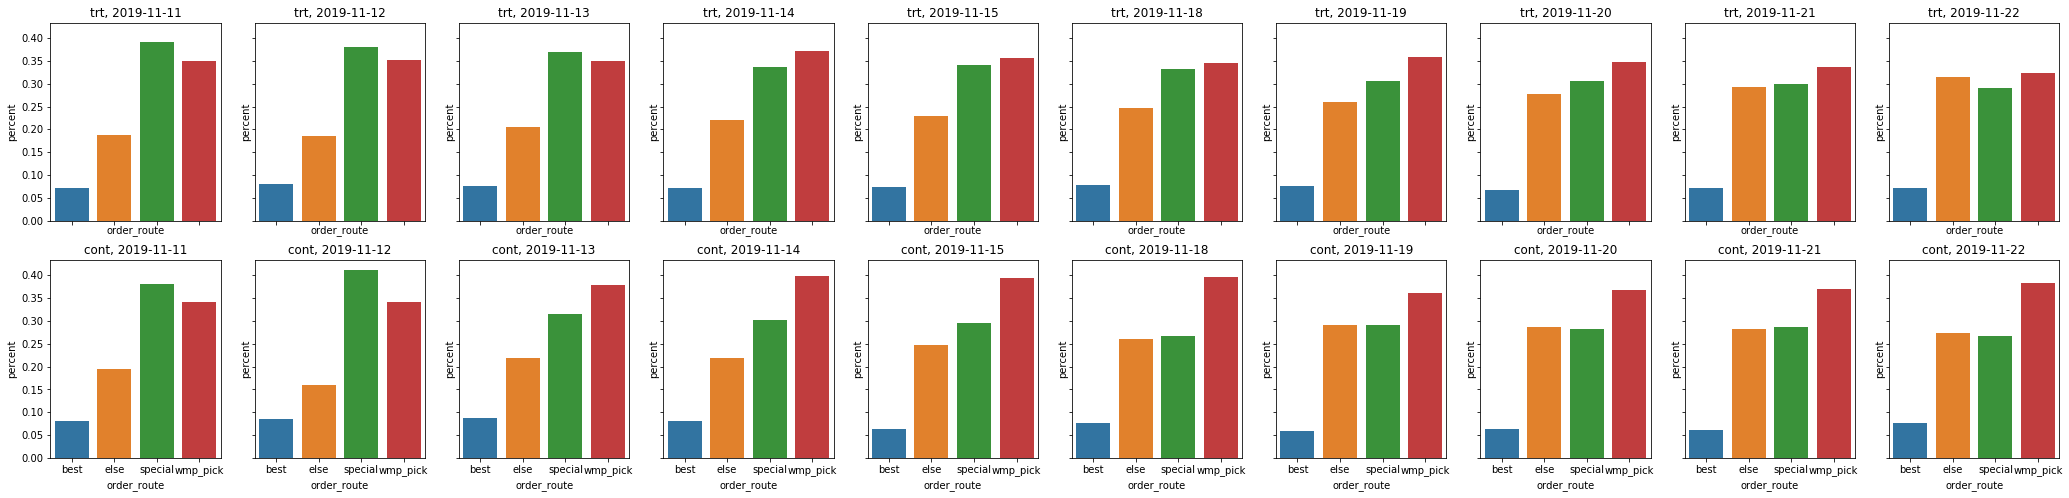

In [338]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

---

### ### 'buy_amount_avg_all_seg'

In [187]:
cate_features[11]

'buy_amount_avg_all_seg'

In [355]:
data_cate.groupby(['cont_group', 'buy_amount_avg_all_seg'])['result_buy_yn'].mean()

cont_group  buy_amount_avg_all_seg
0           0                         0.053846
            1                         0.080992
            2                         0.096972
            3                         0.103413
            4                         0.081143
            5                         0.064935
1           0                         0.045469
            1                         0.084784
            2                         0.104300
            3                         0.106177
            4                         0.087183
            5                         0.051020
Name: result_buy_yn, dtype: float64

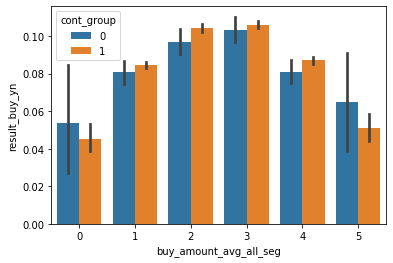

In [189]:
# last_buy_platform

ax = sns.barplot(x='buy_amount_avg_all_seg', y="result_buy_yn", hue="cont_group", data=data_cate)

In [357]:
data_cate[data_cate.start_date == '2019-11-11'].groupby(['cont_group', 'buy_amount_avg_all_seg'])['result_buy_yn'].mean()

cont_group  buy_amount_avg_all_seg
0           0                         0.227273
            1                         0.116279
            2                         0.117849
            3                         0.153675
            4                         0.102217
            5                         0.030303
1           0                         0.123867
            1                         0.120678
            2                         0.142034
            3                         0.144993
            4                         0.125599
            5                         0.081218
Name: result_buy_yn, dtype: float64

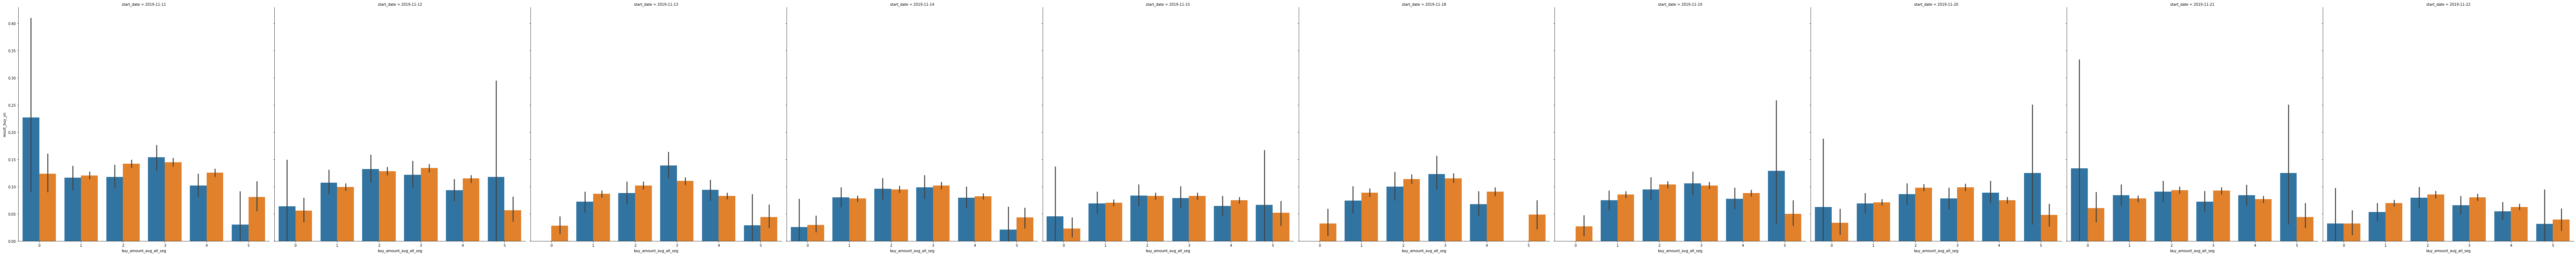

In [349]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array, height=10, aspect=1)
g.map(sns.barplot, 'buy_amount_avg_all_seg', 'result_buy_yn', 'cont_group' , order=[0, 1, 2, 3, 4, 5], hue_order=[0,1], palette = ['C0', 'C1'])



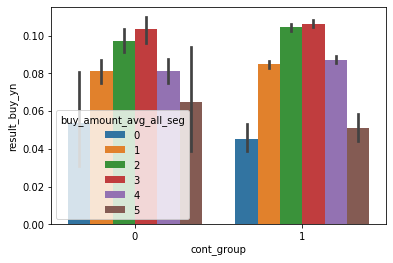

In [191]:
# 

ax = sns.barplot(x="cont_group", y="result_buy_yn", hue="buy_amount_avg_all_seg", data=data_cate, hue_order = [0, 1, 2, 3, 4, 5])

In [350]:
# automatic dictionary for 'palette'
unique = [0, 1, 2, 3, 4, 5]
palette = dict(zip(unique, sns.color_palette()))
palette.update({"Total":"k"})

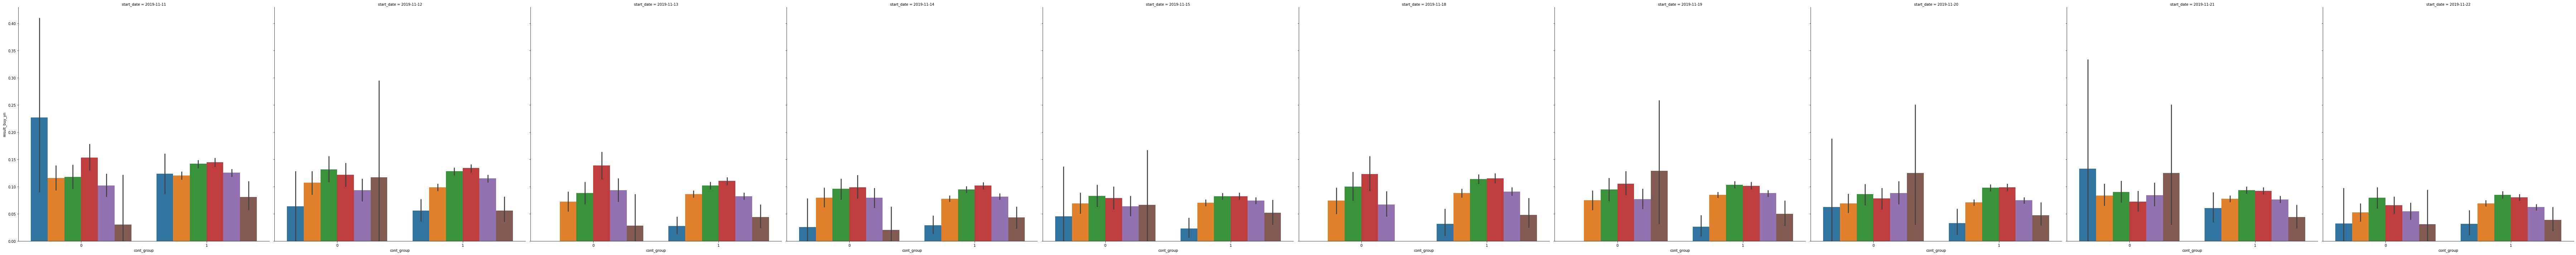

In [351]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array, height=10, aspect=1)
g.map(sns.barplot, 'cont_group', 'result_buy_yn', 'buy_amount_avg_all_seg', order=[0,1], hue_order=[0, 1, 2, 3, 4, 5], palette = palette )

### 구매 데이터 한정, trt/cont 분포차이 확인

In [352]:
feature_ = cate_features[11];feature_

'buy_amount_avg_all_seg'

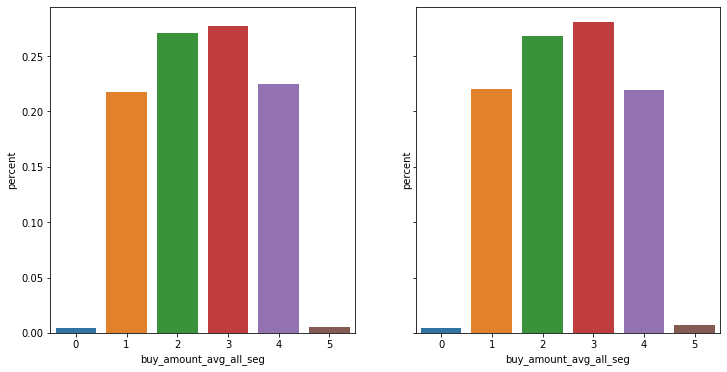

In [353]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

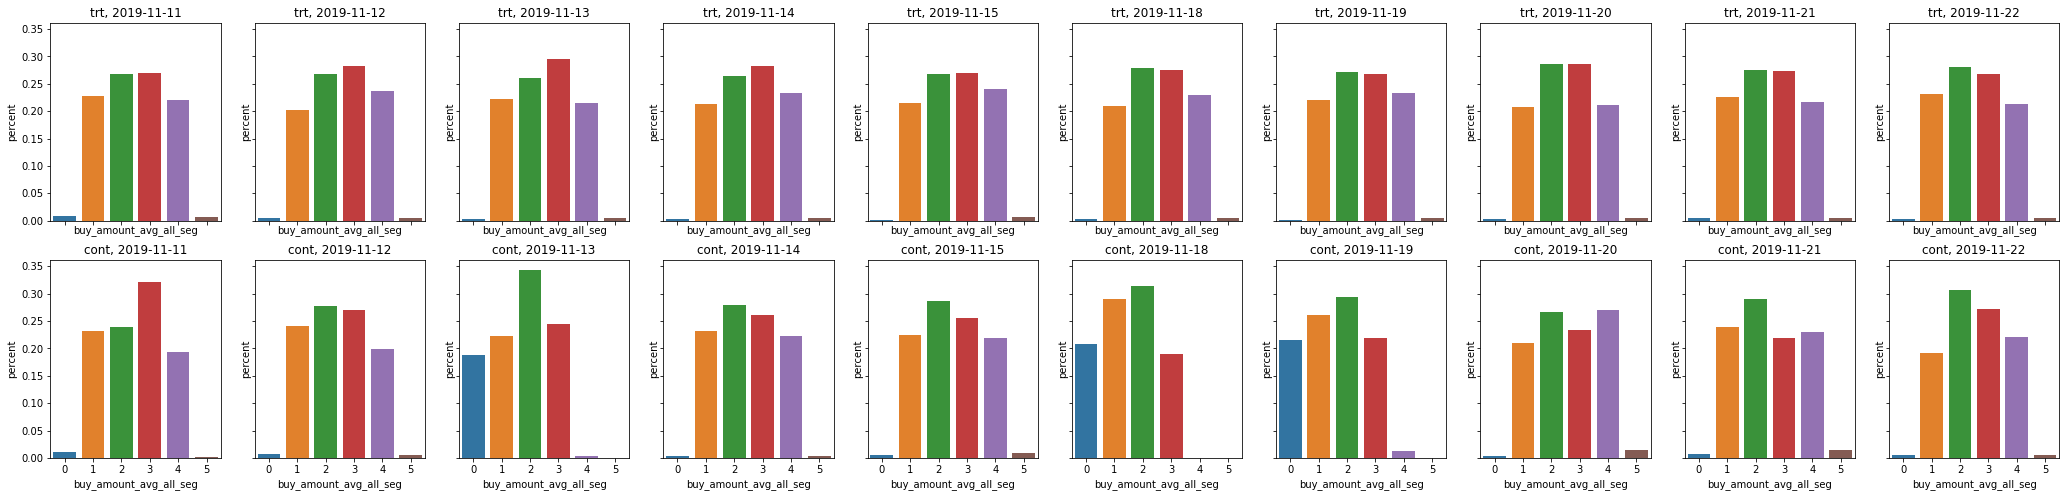

In [354]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

---

### ### 'rgt_elapsed_days_seg'

In [194]:
cate_features[12]

'rgt_elapsed_days_seg'

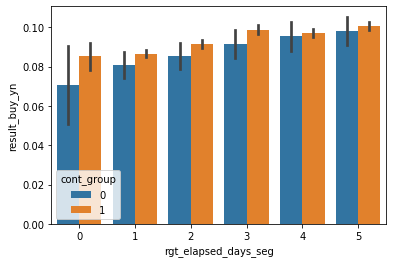

In [195]:
# last_buy_platform

ax = sns.barplot(x='rgt_elapsed_days_seg', y="result_buy_yn", hue="cont_group", data=data_cate)

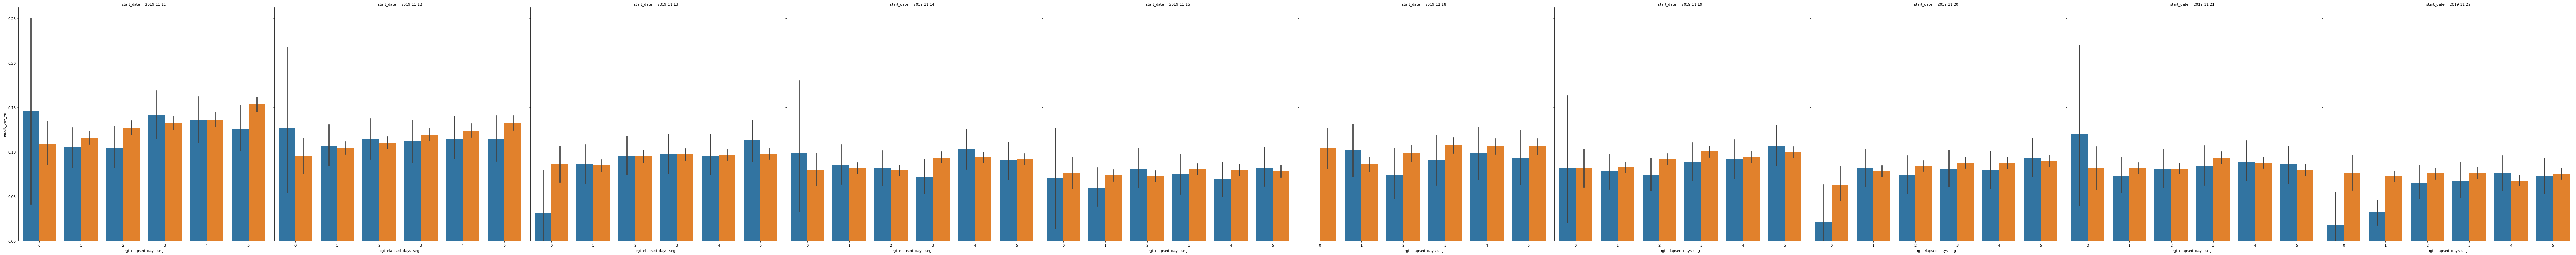

In [361]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array, height=10, aspect = 1)
g.map(sns.barplot, 'rgt_elapsed_days_seg', 'result_buy_yn', 'cont_group' , order=[0, 1, 2, 3, 4, 5], hue_order=[0,1], palette=['C0', 'C1'])

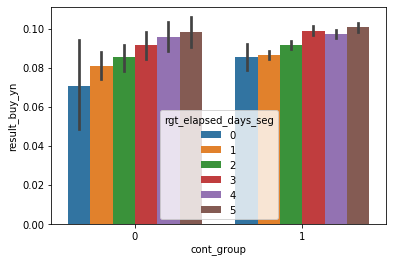

In [197]:
# 

ax = sns.barplot(x="cont_group", y="result_buy_yn", hue="rgt_elapsed_days_seg", data=data_cate, hue_order = [0, 1, 2, 3, 4, 5])

In [362]:
# automatic dictionary for 'palette'
unique = [0, 1, 2, 3, 4, 5]
palette = dict(zip(unique, sns.color_palette()))
palette.update({"Total":"k"})

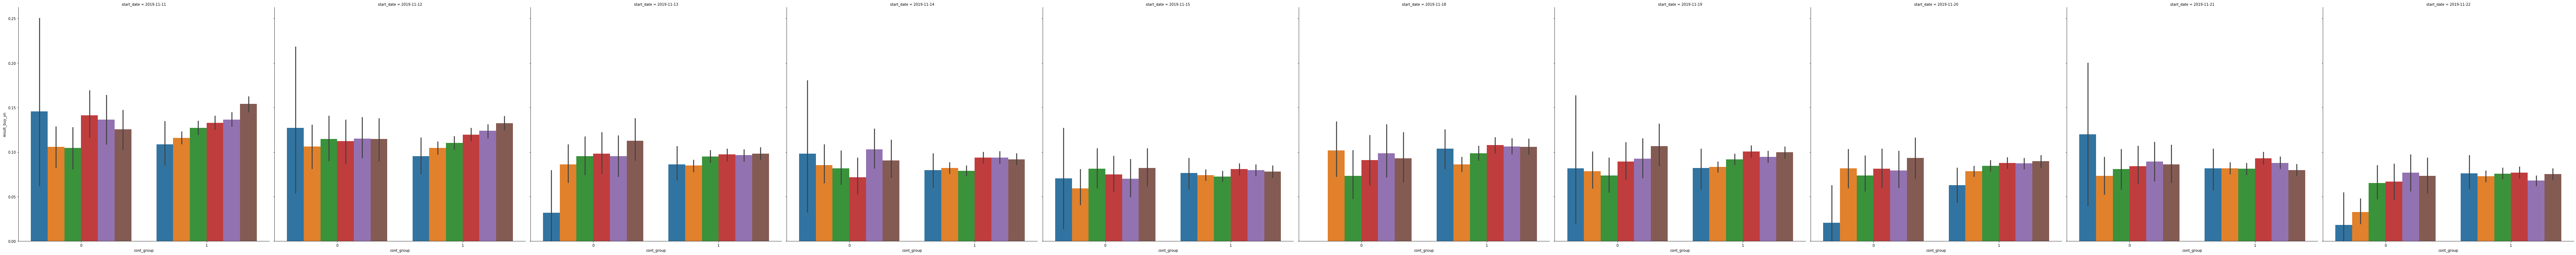

In [363]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array, height=10, aspect=1)
g.map(sns.barplot, 'cont_group', 'result_buy_yn', 'rgt_elapsed_days_seg', order=[0,1], hue_order=[0, 1, 2, 3, 4, 5], palette = palette)

### 구매 데이터 한정, trt/cont 분포차이 확인

In [364]:
feature_ = cate_features[12];feature_

'rgt_elapsed_days_seg'

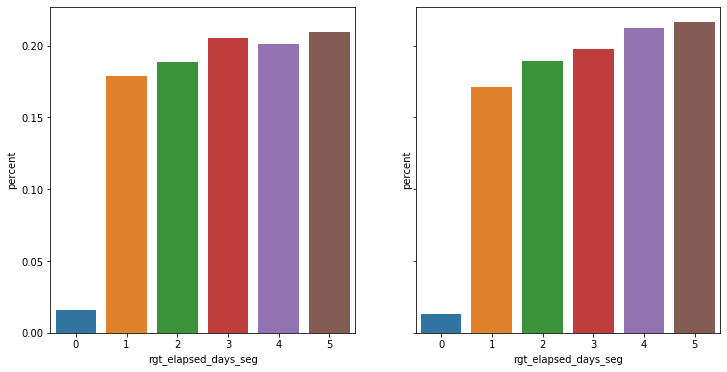

In [365]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

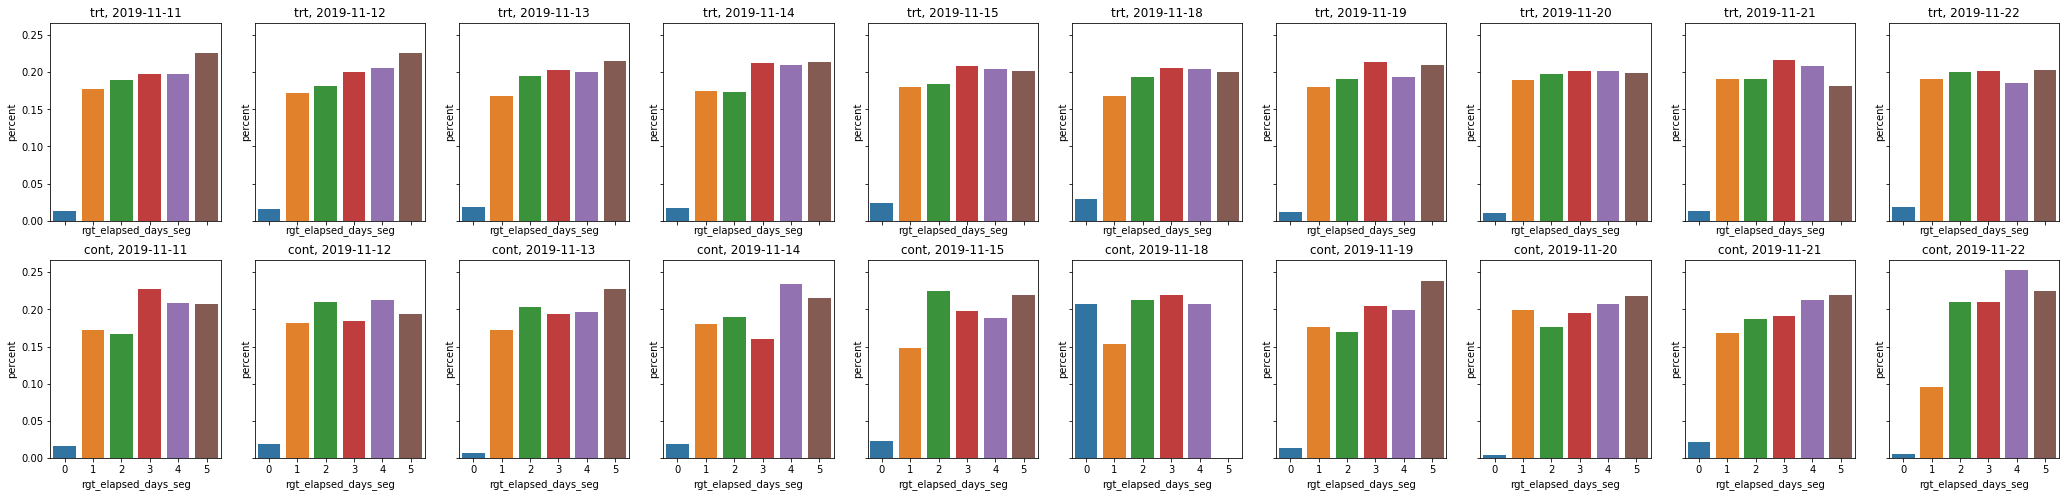

In [366]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

---

### ### 'text_mail_wemakepay_bool'

In [205]:
cate_features[14]

'text_mail_wemakepay_bool'

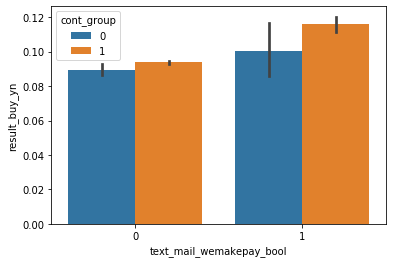

In [207]:
# last_buy_platform

ax = sns.barplot(x='text_mail_wemakepay_bool', y="result_buy_yn", hue="cont_group", data=data_cate)

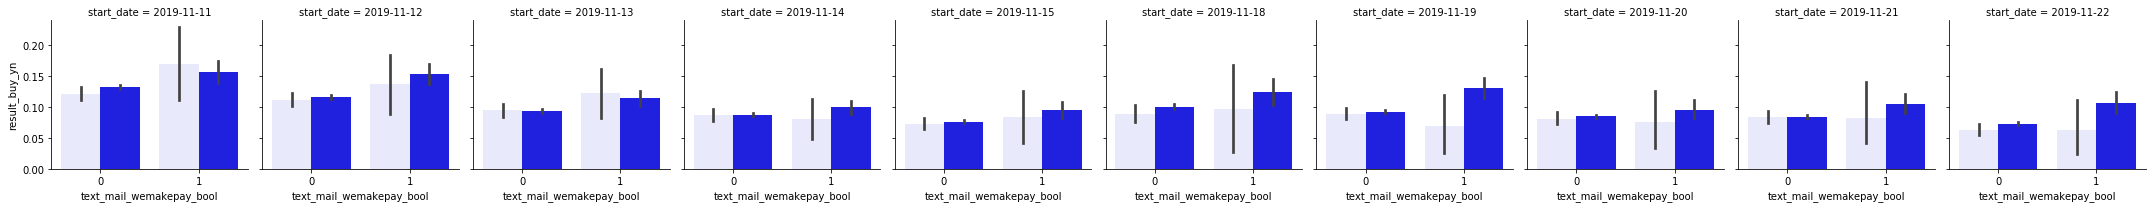

In [208]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'text_mail_wemakepay_bool', 'result_buy_yn', 'cont_group' , order=[0, 1], hue_order=[0,1], color='blue')

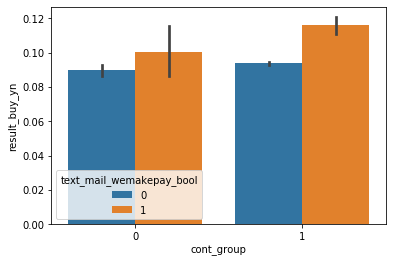

In [209]:
# 

ax = sns.barplot(x="cont_group", y="result_buy_yn", hue="text_mail_wemakepay_bool", data=data_cate, hue_order = [0, 1])

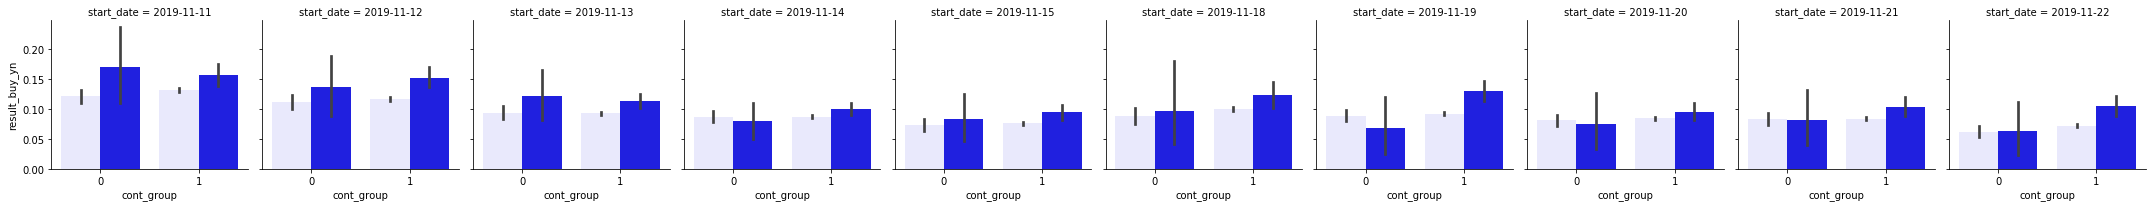

In [210]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'cont_group', 'result_buy_yn', 'text_mail_wemakepay_bool', order=[0,1], hue_order=[0, 1], color='blue')

### 구매 데이터 한정, trt/cont 분포차이 확인

In [367]:
feature_ = cate_features[14];feature_

'text_mail_wemakepay_bool'

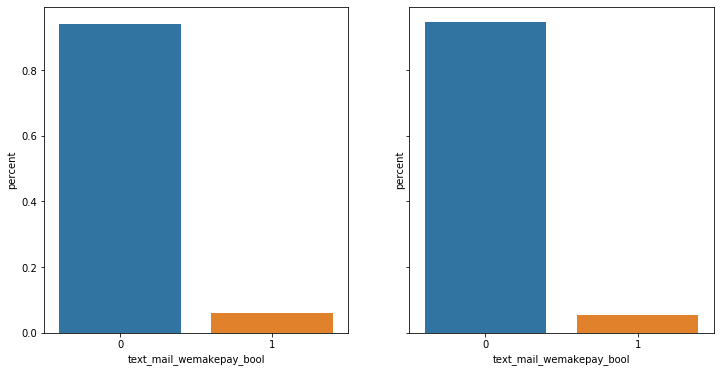

In [368]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

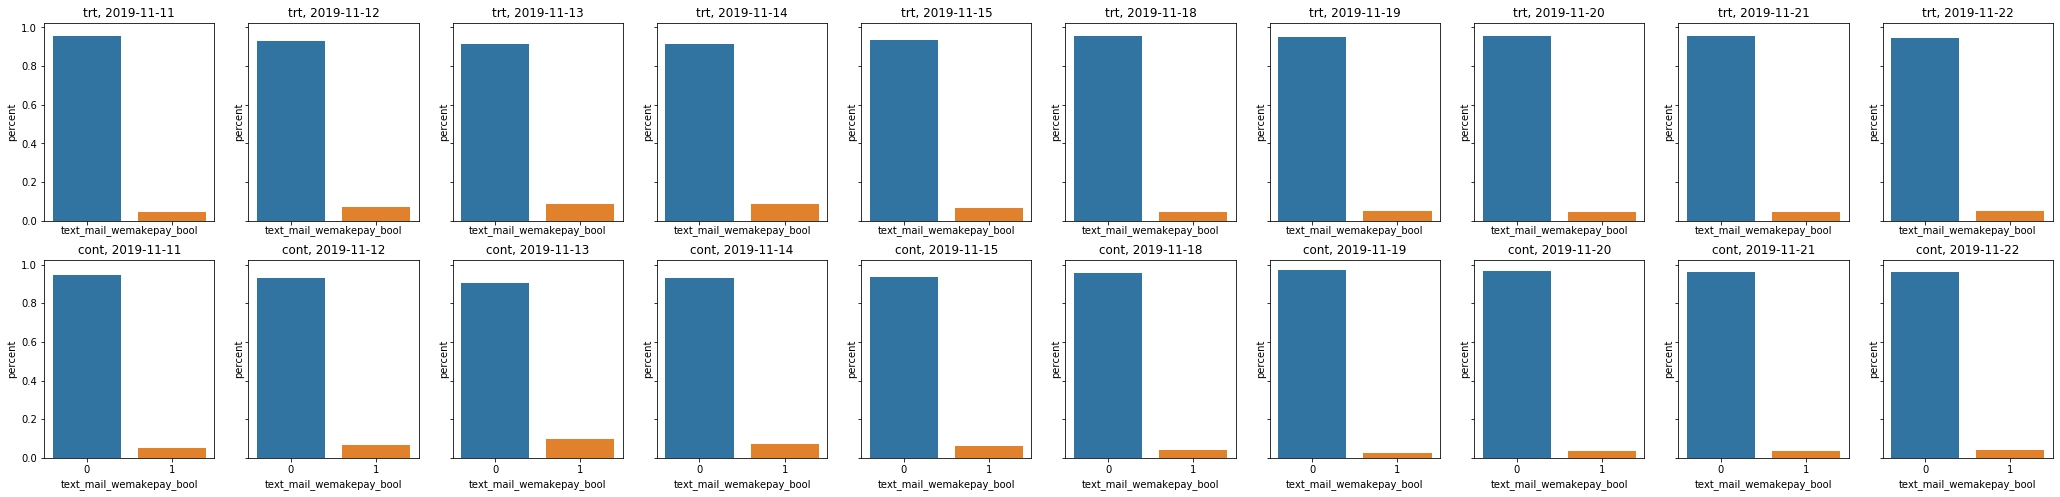

In [369]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

---

### ### 'text_mail_wemakepay'

In [211]:
cate_features[15]

'text_mail_wemakepay'

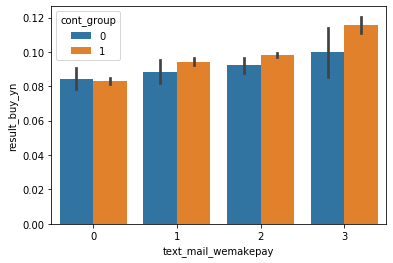

In [212]:
# last_buy_platform

ax = sns.barplot(x='text_mail_wemakepay', y="result_buy_yn", hue="cont_group", data=data_cate)

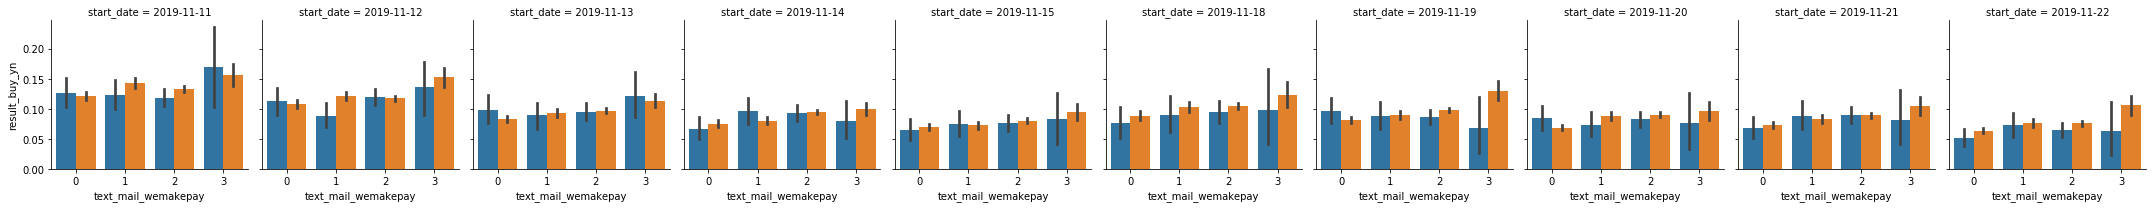

In [370]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'text_mail_wemakepay', 'result_buy_yn', 'cont_group' , order=[0, 1, 2, 3], hue_order=[0,1], palette = ['C0', 'C1'])

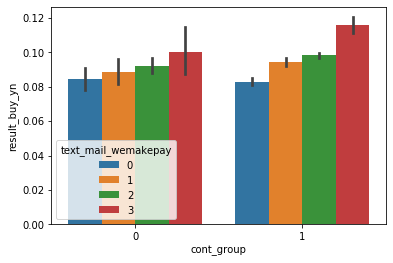

In [214]:
# 

ax = sns.barplot(x="cont_group", y="result_buy_yn", hue="text_mail_wemakepay", data=data_cate, hue_order = [0, 1, 2, 3])

In [374]:
# automatic dictionary for 'palette'
unique = [0, 1, 2, 3]
palette = dict(zip(unique, sns.color_palette()))
palette.update({"Total":"k"})

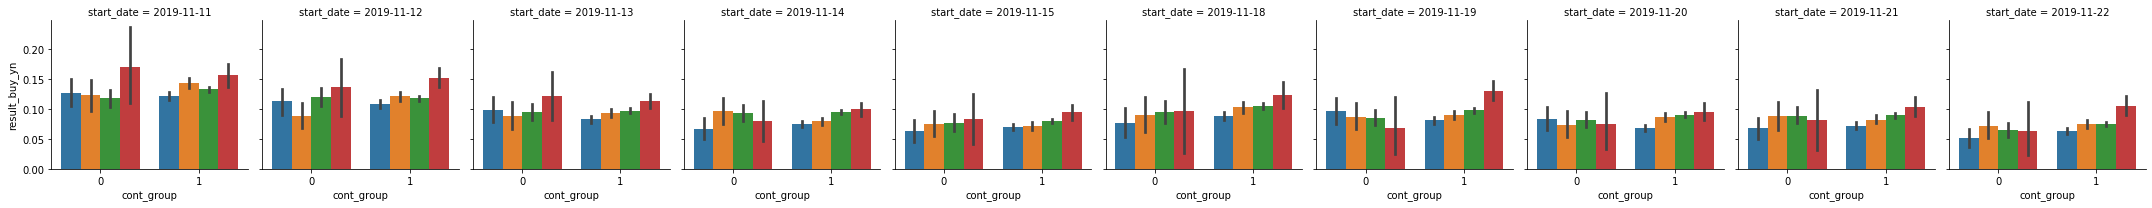

In [375]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'cont_group', 'result_buy_yn', 'text_mail_wemakepay', order=[0,1], hue_order=[0, 1, 2, 3], palette = palette)

### 구매 데이터 한정, trt/cont 분포차이 확인

In [371]:
feature_ = cate_features[15];feature_

'text_mail_wemakepay'

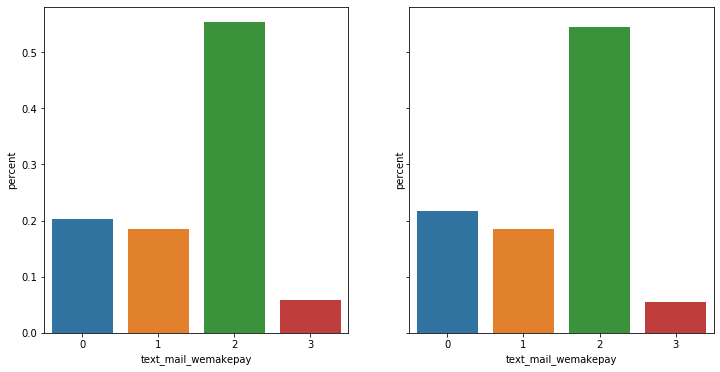

In [372]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

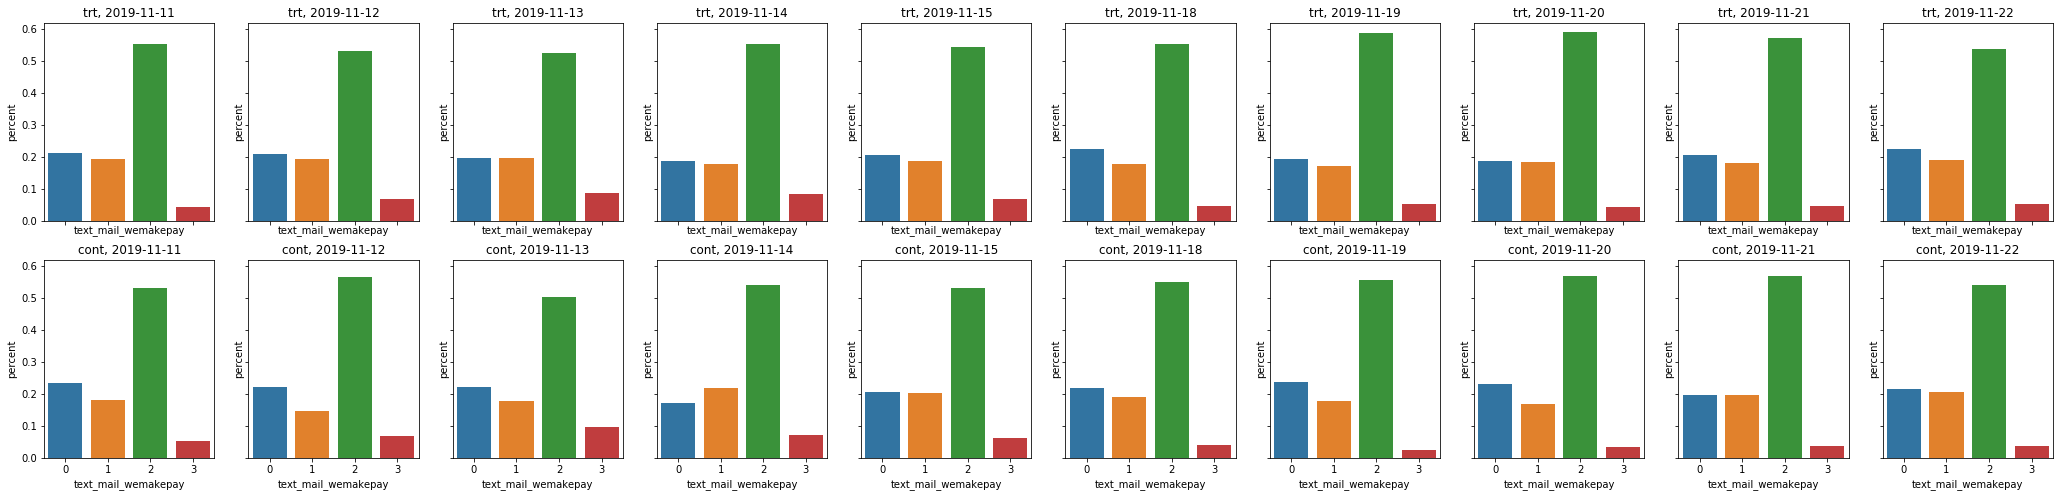

In [373]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

---

### ### 'birth'

In [216]:
cate_features[16]

'birth'

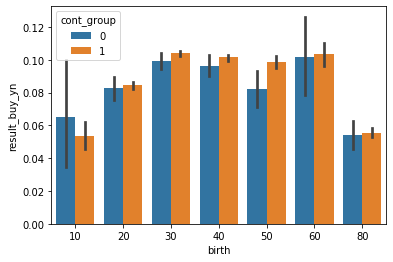

In [217]:
# last_buy_platform

ax = sns.barplot(x='birth', y="result_buy_yn", hue="cont_group", data=data_cate)

In [219]:
[10, 20, 30, 40, 50, 60, 80]

[10, 20, 30, 40, 50, 60, 70, 80]

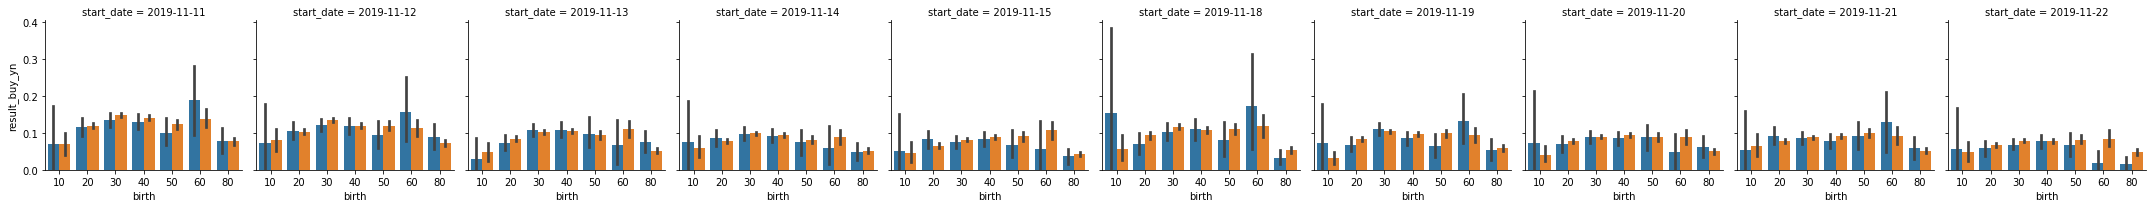

In [224]:
#

g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'birth', 'result_buy_yn', 'cont_group' , order=[10, 20, 30, 40, 50, 60, 80] , hue_order=[0,1], palette=['C0', 'C1'])

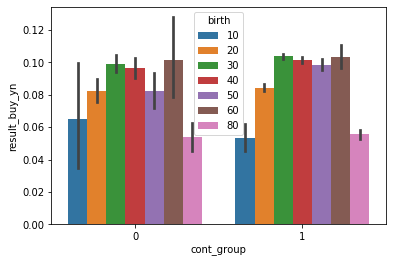

In [222]:
# 

ax = sns.barplot(x="cont_group", y="result_buy_yn", hue="birth", data=data_cate, hue_order = [10, 20, 30, 40, 50, 60, 80] )

In [228]:
# automatic dictionary for 'palette'
unique = [10, 20, 30, 40, 50, 60, 80]
palette = dict(zip(unique, sns.color_palette()))
palette.update({"Total":"k"})

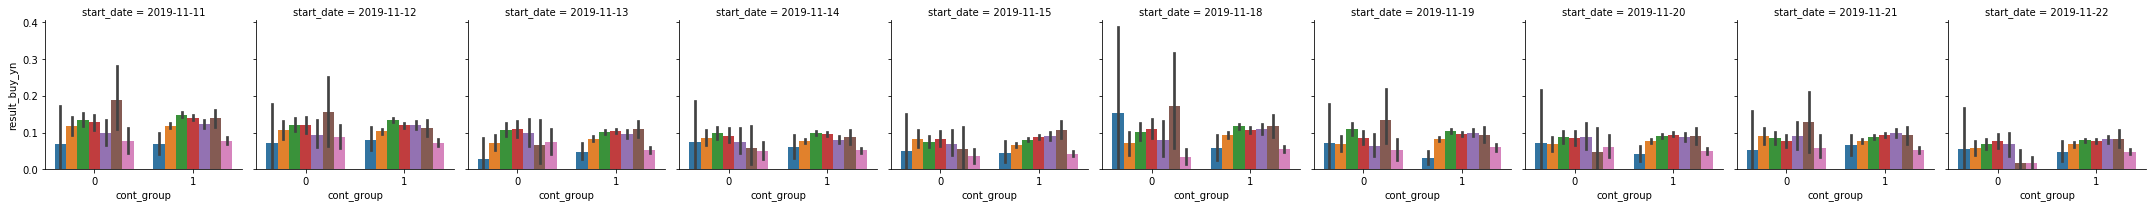

In [230]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'cont_group', 'result_buy_yn', 'birth', order=[0,1], hue_order=[10, 20, 30, 40, 50, 60, 80], palette = palette)

### 구매 데이터 한정, trt/cont 분포차이 확인

In [376]:
feature_ = cate_features[16];feature_

'birth'

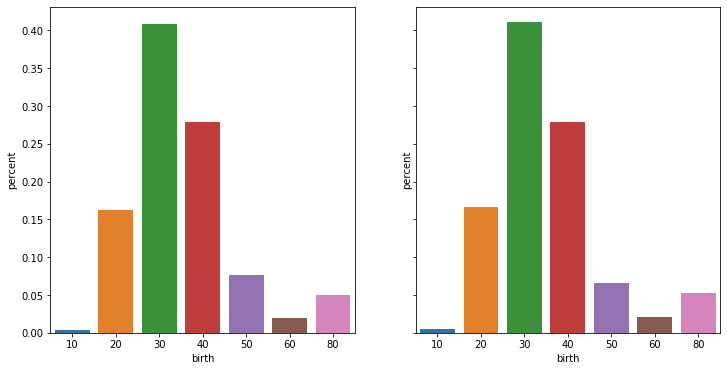

In [377]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

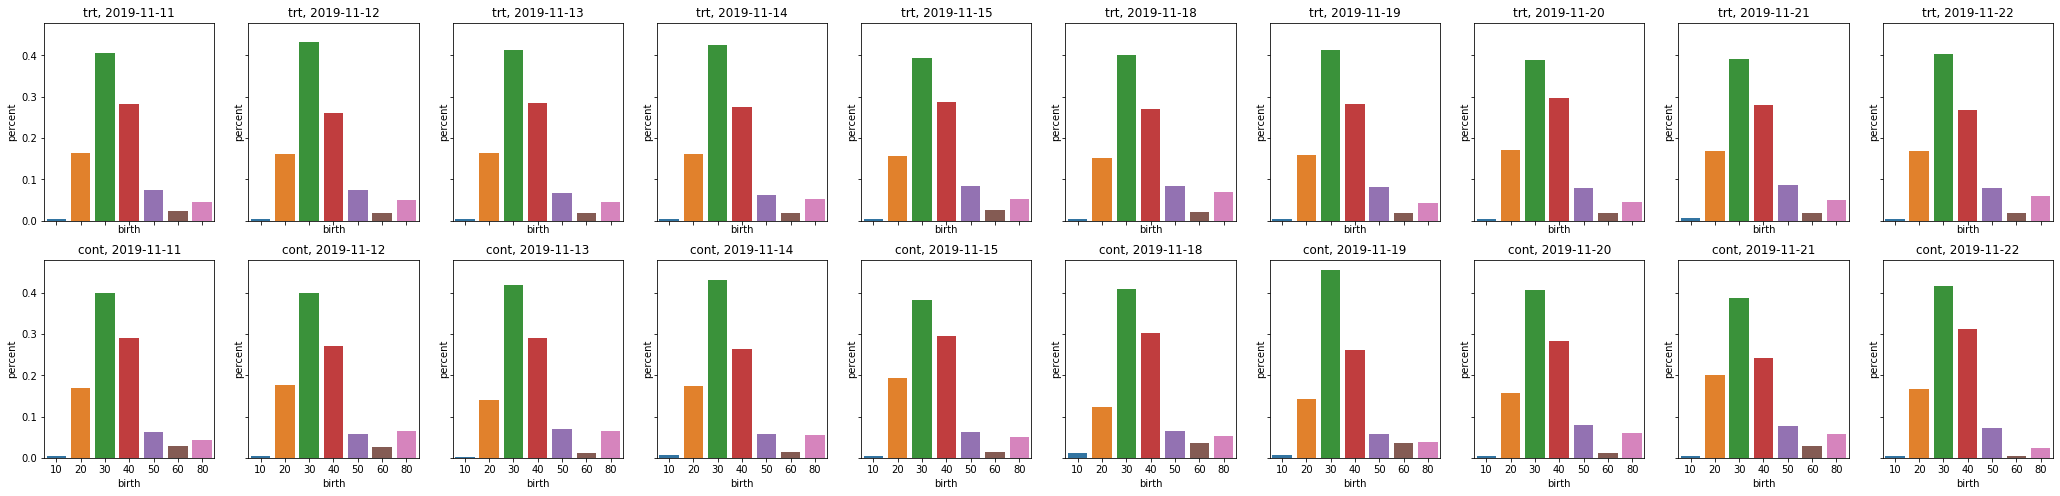

In [378]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

---

### ### 'ad_uv_yn'

In [379]:
cate_features[17]

'ad_uv_yn'

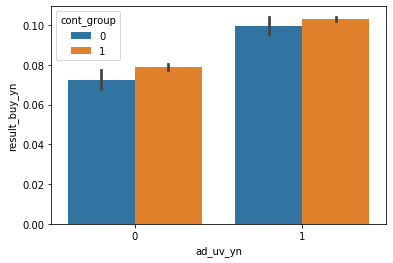

In [380]:
# last_buy_platform

ax = sns.barplot(x='ad_uv_yn', y="result_buy_yn", hue="cont_group", data=data_cate)

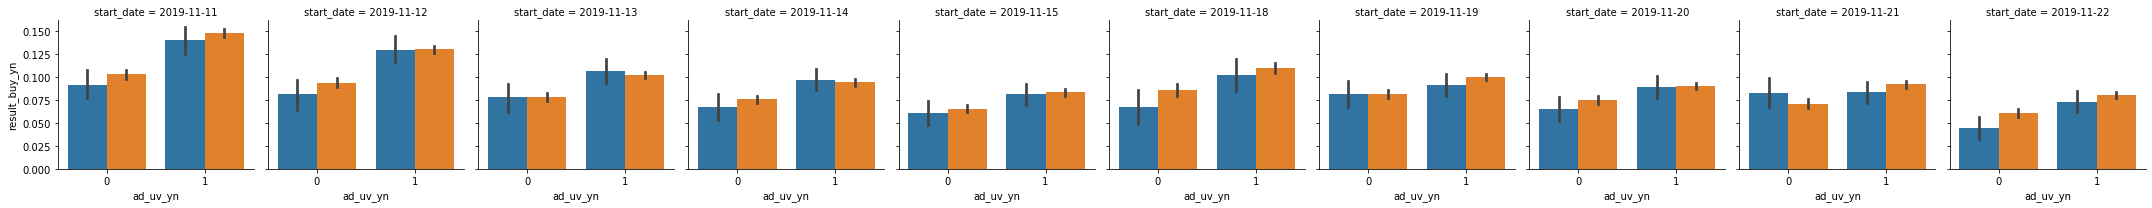

In [234]:
#

g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'ad_uv_yn', 'result_buy_yn', 'cont_group' , order=[0, 1] , hue_order=[0,1], palette=['C0', 'C1'])

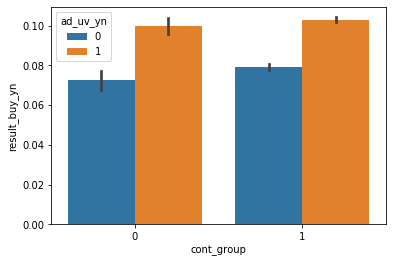

In [235]:
# 

ax = sns.barplot(x="cont_group", y="result_buy_yn", hue="ad_uv_yn", data=data_cate, hue_order = [0, 1] )

In [236]:
# automatic dictionary for 'palette'
unique = [0, 1]
palette = dict(zip(unique, sns.color_palette()))
palette.update({"Total":"k"})

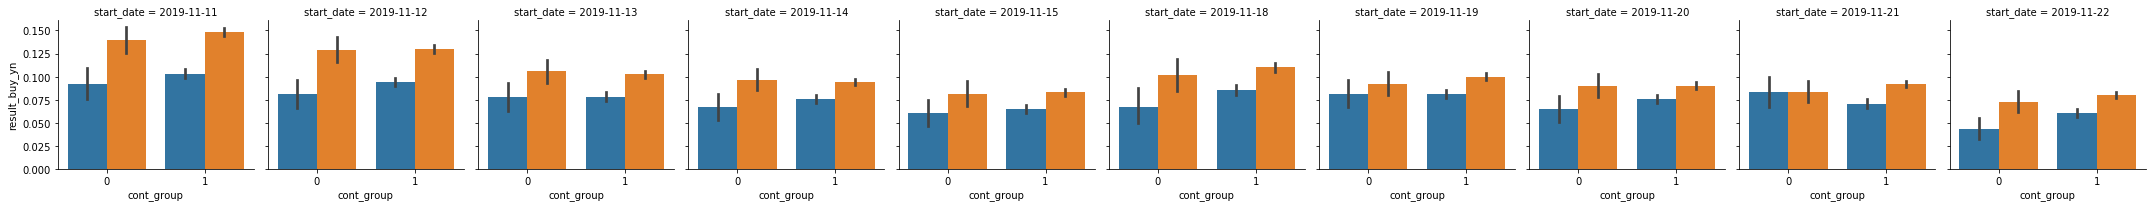

In [237]:
g = sns.FacetGrid(data_cate, col='start_date', col_order = date_array)
g.map(sns.barplot, 'cont_group', 'result_buy_yn', 'ad_uv_yn', order=[0,1], hue_order=[0, 1], palette = palette)

### 구매 데이터 한정, trt/cont 분포차이 확인

In [381]:
feature_ = cate_features[17];feature_

'ad_uv_yn'

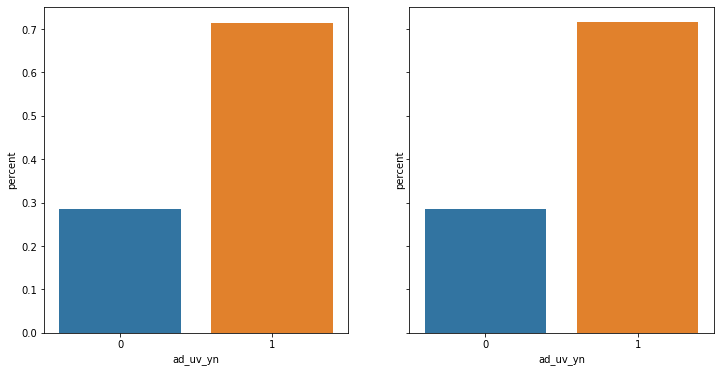

In [382]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

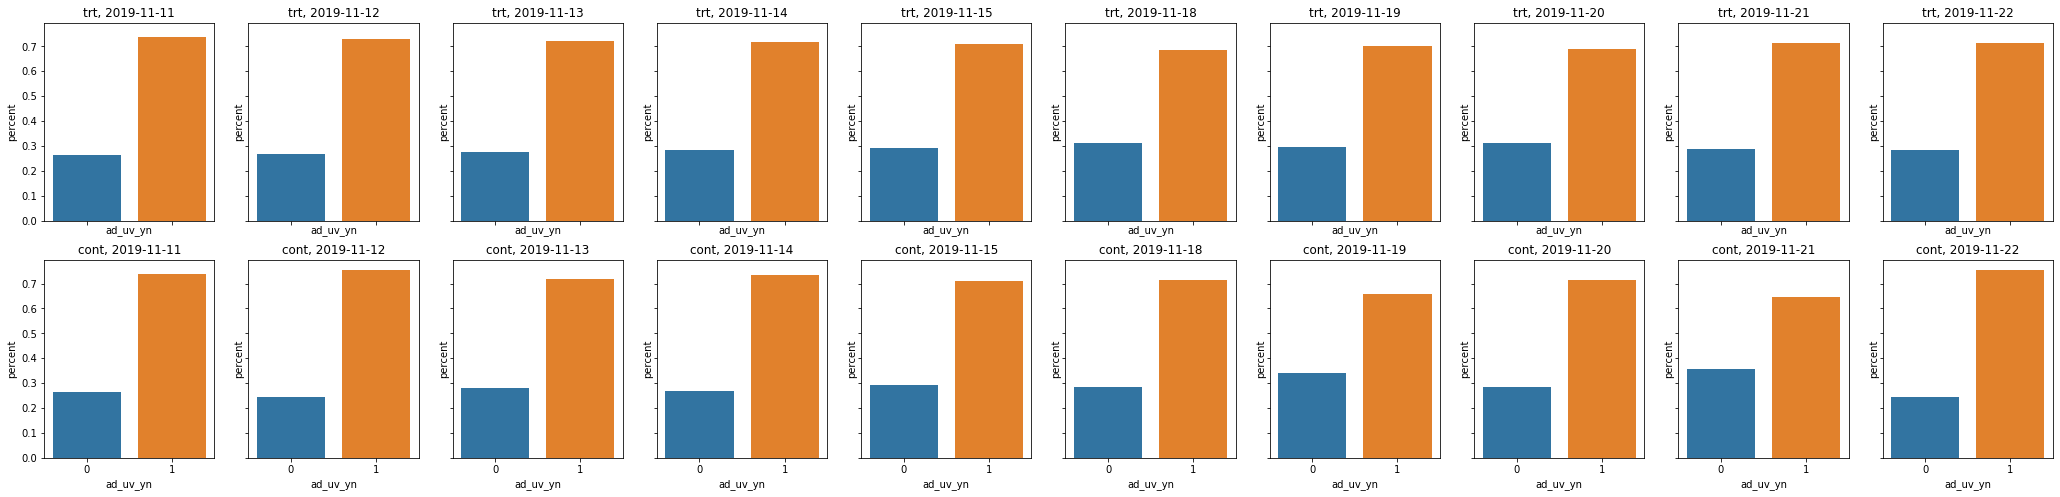

In [383]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

---

## ## cate_main_buy 살펴보자 (조금 더 꼼꼼하게 보고싶은 변수였어)
- 현재 cate_main_buy_ 는 cate_main_buy를 lcate로 축소시킨 버젼
- 가능하다면 cate_main_buy, cate_main_buy_ 둘다 활용한 결과 살피자

In [29]:
data_cate.head()

start_date  result_buy_yn  cont_group     m_id  text_yn  push_yn  mail_yn  \
0  2019-11-20              1           0  1000298        1        0        1   
1  2019-11-14              0           1  1000347        1        0        1   
2  2019-11-14              0           0  1000571        1        1        1   
3  2019-11-11              0           1  1001894        1        0        1   
4  2019-11-12              0           1  1002503        1        0        1   

  buying_trend_group buy_ep_yn_3day visit_gubn last_buy_seg last_buy_platform  \
0             stable              N          O          D-2               APP   
1             stable              Y          R          D-1              MWEB   
2               long              N          O          D-1               APP   
3              short              N          O          D-3               APP   
4             stable              N          O          D-1                PC   

   wmp_pay_yn referral_flag order_route  buy_amount_avg_all_seg  \
0           0       outside        best                       1   
1           0       outside        else                       1   
2           0        inside        else                       1   
3           0        direct        else                       1   
4           0       outside     special                       1   

   rgt_elapsed_days_seg  cate_main_buy_  text_mail_wemakepay_bool  birth  \
0                     5               3                         0     30   
1                     5              11                         0     30   
2                     5              11                         0     40   
3                     5               2                         0     30   
4                     5               3                         0     80   

   ad_uv_yn  
0         1  
1         1  
2         1  
3         1  
4         1

In [30]:
data_cate['cate_main_buy_'].unique() # 11 + 1가지 (various)

array([ 3, 11,  2,  8,  4,  6,  5,  7,  0,  1,  9, 10])

In [120]:
trt_data  = data_cate[(data_cate.result_buy_yn == 1) & (data_cate.cont_group == 1)]
cont_data = data_cate[(data_cate.result_buy_yn == 1) & (data_cate.cont_group == 0)]

In [32]:
trt_data['cate_main_buy_']

19        11
23         2
53         9
60         6
67        10
          ..
419459     6
419464     9
419466     3
419497     6
419501    11
Name: cate_main_buy_, Length: 36735, dtype: int64

### ### 모든일자 통합

In [384]:
feature_ = 'cate_main_buy_'

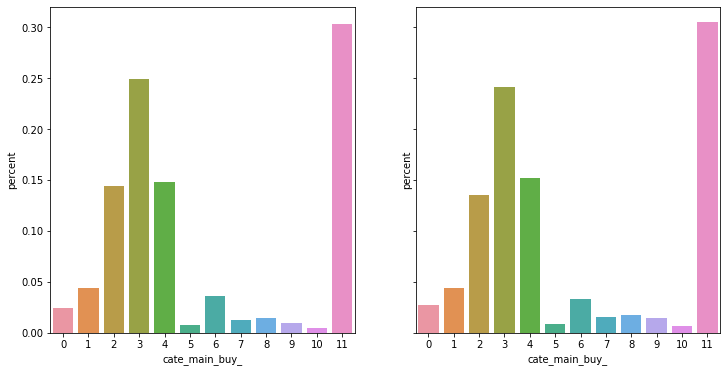

In [385]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

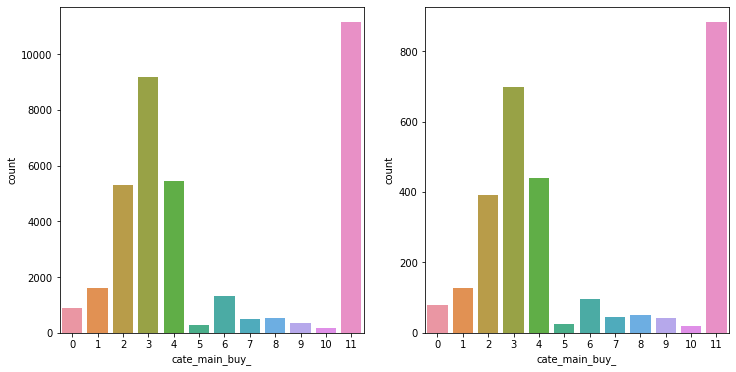

In [33]:
# 전체
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) )
sns.countplot( x = 'cate_main_buy_', data = trt_data , ax = axes[0])
sns.countplot( x = 'cate_main_buy_', data = cont_data , ax = axes[1])

### ### 날짜별

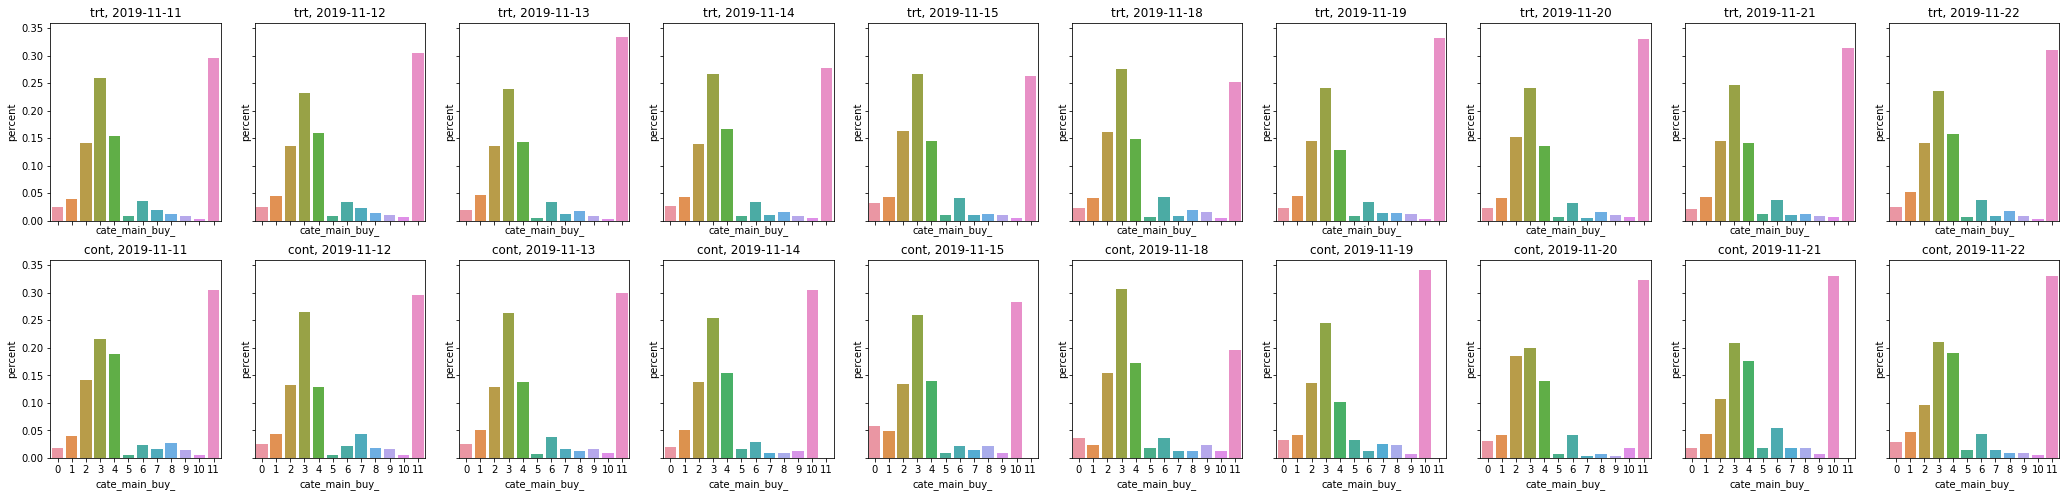

In [386]:
# 일자별 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(36,8) , sharex=True, sharey=True)

for i,date_ in enumerate(date_array):
    
    #데이터
    pct_trt  = ( trt_data[trt_data.start_date == date_ ].groupby([ feature_ ]).size()/trt_data[trt_data.start_date == date_ ].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    pct_cont = (cont_data[cont_data.start_date == date_].groupby([ feature_ ]).size()/cont_data[cont_data.start_date == date_].shape[0]).reset_index().rename({0:'percent'}, axis=1)
    
    sns.barplot(  x = feature_ , y = 'percent', data = pct_trt , ax = axes[0,i])
    sns.barplot(  x = feature_ , y = 'percent', data = pct_cont , ax = axes[1,i])
    
    axes[0,i].title.set_text('{}, {}'.format('trt', date_) )
    axes[1,i].title.set_text('{}, {}'.format('cont', date_) )

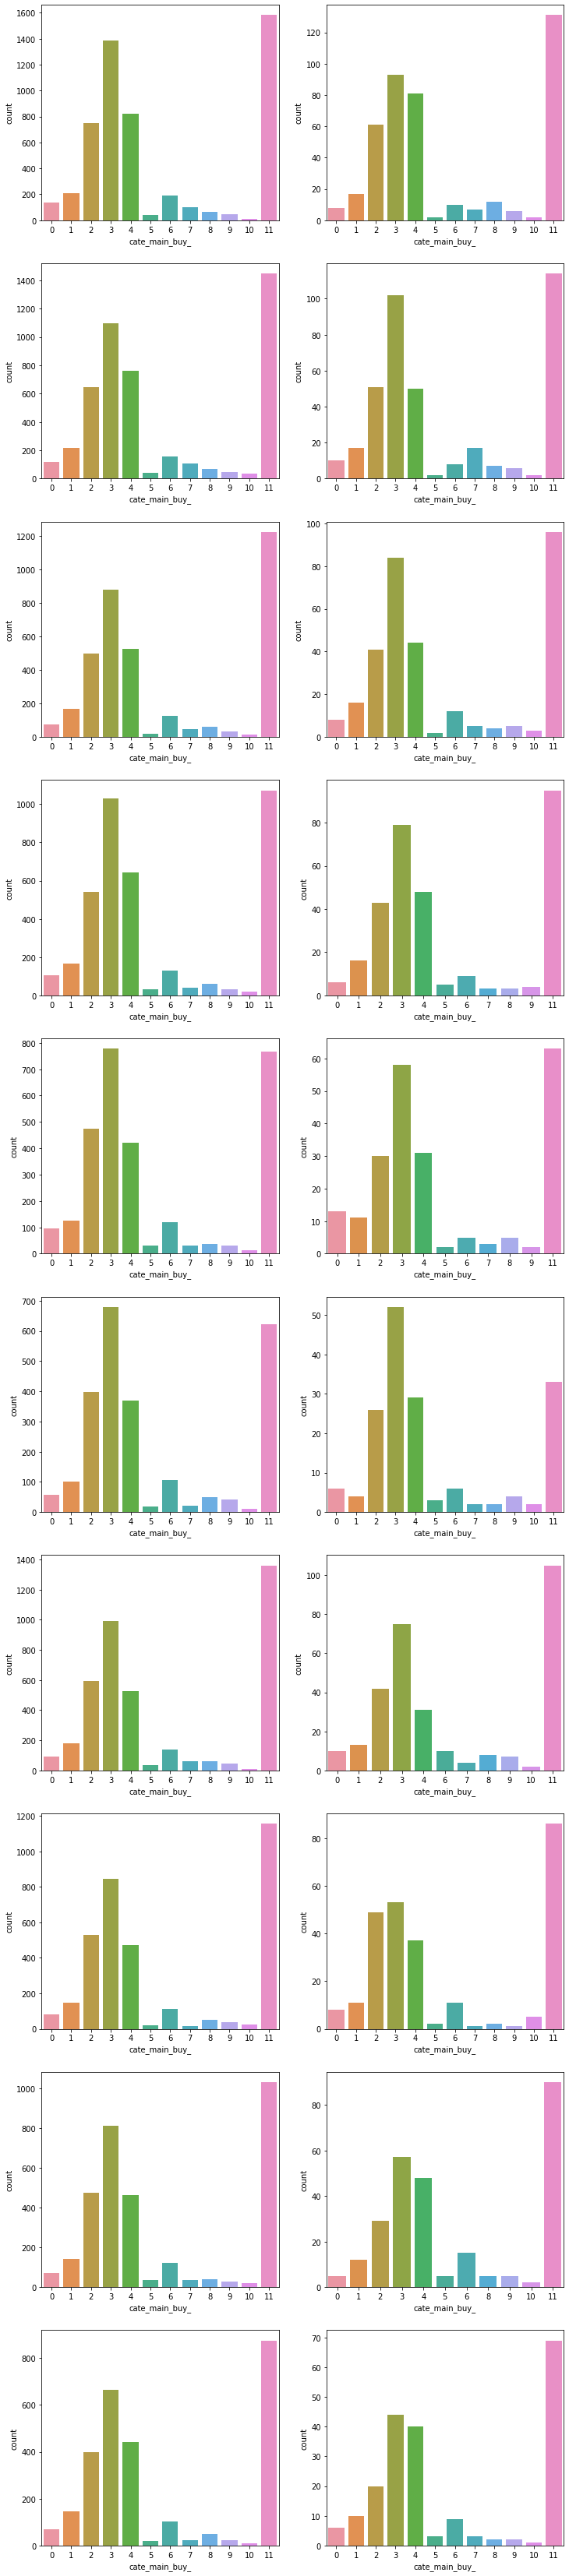

In [54]:
# 일자별 
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(12,60) )

for i,date_ in enumerate(date_array):
    sns.countplot( x = 'cate_main_buy_', data =  trt_data[trt_data.start_date == date_ ] , ax = axes[i,0])
    sns.countplot( x = 'cate_main_buy_', data = cont_data[cont_data.start_date == date_] , ax = axes[i,1])

### ### cate_main_buy_(lcate로 축약) 의 원본

In [387]:
pwd

'/mnt/sda1/myeonggyulee/myeonggyulee/uplift/2020_0113'

In [43]:
original_data = pd.read_csv('/mnt/sda1/common/uplift_data/ojm_uplift.zip', thousands=',')

In [44]:
original_data.head()

crm_id cmpn_nm     m_id  cont_group  start_date    end_date  min_value  \
0      33   ~3day  1000298           3  2019-11-20  2019-11-20          0   
1      33   ~3day  1000347           1  2019-11-14  2019-11-14      30000   
2      33   ~3day  1000571           3  2019-11-14  2019-11-14          0   
3      33   ~3day  1001894           1  2019-11-11  2019-11-11      30000   
4      33   ~3day  1002503           1  2019-11-12  2019-11-12      30000   

   max_value  text_yn  push_yn  mail_yn last_buy_date  result_buy_yn  \
0          0        1        0        1    2019-11-18              1   
1       5000        1        0        1    2019-11-13              0   
2          0        1        1        1    2019-11-13              0   
3       5000        1        0        1    2019-11-08              0   
4       5000        1        0        1    2019-11-11              0   

   buy_period  buy_cnt_date  buy_cnt_payment  buy_amount  buying_trend  \
0         6.0            40               58     1109550           0.0   
1       178.0             2                2       37400           NaN   
2        36.0            11               15      240412          -2.0   
3        70.0             6                8       90100          24.0   
4         7.0            49               69     1019316           0.0   

  buying_trend_group  cate_buy_cnt  cate_rate cate_main_buy  coupon_use_rate  \
0             stable          11.0       35.0          신선식품               41   
1                NaN           1.0       50.0       various               50   
2               long           1.0       20.0       various               20   
3              short           3.0       60.0   화장지/물티슈/생리대               38   
4             stable          18.0       40.0          신선식품               17   

   crm_coupon_use_rate  buy_amount_3day  buy_cnt_payment_3day buy_ep_yn_3day  \
0                    0            69000                     3              N   
1                    0            27500                     1              Y   
2                    0            11800                     1              N   
3                    0             5000                     1              N   
4                    0            18700                     2              N   

  buy_cate_3day  buy_amount_avg visit_gubn  dt_cnt_last_visit  \
0           NaN         19147.0          O                5.0   
1         바디/헤어          9900.0          R              177.0   
2           NaN         16329.0          O                6.0   
3        클렌징/필링         12157.0          O                7.0   
4          신선식품         15991.0          O                2.0   

   dt_cnt_last_buy last_buy_seg last_buy_platform  click_to_buy_interval  \
0              6.0          D-2               APP                   54.0   
1            178.0          D-1              MWEB                    0.0   
2             36.0          D-1               APP                    0.0   
3              7.0          D-3               APP                    0.0   
4             31.0          D-1                PC                    0.0   

   wmp_pay_yn  ratio_spc referral_source referral_flag  day_cnt_app_exec  \
0           0        0.9          google       outside               1.0   
1           0        0.0           naver       outside               NaN   
2           0        0.2        app_push        inside               1.0   
3           0        1.0        (direct)        direct              10.0   
4           0        0.8         TypeB_C       outside              32.0   

   refund_rate  wmp_freq  wmp_stay_avg  after_order_term order_route  \
0           11      16.0           7.0              32.0        best   
1            0       5.0           2.0               5.0        else   
2            0       3.0           3.0               NaN        else   
3           33       6.0           0.0               NaN        else   
4            7      31.0           

In [45]:
data_cate.head()

start_date  result_buy_yn  cont_group     m_id  text_yn  push_yn  mail_yn  \
0  2019-11-20              1           0  1000298        1        0        1   
1  2019-11-14              0           1  1000347        1        0        1   
2  2019-11-14              0           0  1000571        1        1        1   
3  2019-11-11              0           1  1001894        1        0        1   
4  2019-11-12              0           1  1002503        1        0        1   

  buying_trend_group buy_ep_yn_3day visit_gubn last_buy_seg last_buy_platform  \
0             stable              N          O          D-2               APP   
1             stable              Y          R          D-1              MWEB   
2               long              N          O          D-1               APP   
3              short              N          O          D-3               APP   
4             stable              N          O          D-1                PC   

   wmp_pay_yn referral_flag order_route  buy_amount_avg_all_seg  \
0           0       outside        best                       1   
1           0       outside        else                       1   
2           0        inside        else                       1   
3           0        direct        else                       1   
4           0       outside     special                       1   

   rgt_elapsed_days_seg  cate_main_buy_  text_mail_wemakepay_bool  \
0                     5               3                         0   
1                     5              11                         0   
2                     5              11                         0   
3                     5               2                         0   
4                     5               3                         0   

   text_mail_wemakepay  birth  ad_uv_yn  
0                    2     30         1  
1                    2     30         1  
2                    2     40         1  
3                    2     30         1  
4                    2     80         1

In [46]:
# id 만들기 - 같은 멤버가 여러 일자의 캠페인에 진입할 수 있다.
data_cate['id']     = data_cate['start_date'] + '_' + data_cate['m_id'].astype(str)
original_data['id'] = original_data['start_date'] + '_' + original_data['m_id'].astype(str)

In [47]:
original_data[['id', 'cate_main_buy' , 'buy_cate_3day']]

id cate_main_buy buy_cate_3day
0        2019-11-20_1000298          신선식품           NaN
1        2019-11-14_1000347       various         바디/헤어
2        2019-11-14_1000571       various           NaN
3        2019-11-11_1001894   화장지/물티슈/생리대        클렌징/필링
4        2019-11-12_1002503          신선식품          신선식품
...                     ...           ...           ...
440565  2019-11-22_30701057   화장지/물티슈/생리대   화장지/물티슈/생리대
440566  2019-11-22_30701176          계절가전          계절가전
440567  2019-11-22_30701225     건강식품/다이어트     건강식품/다이어트
440568  2019-11-22_30701429          메이크업          메이크업
440569  2019-11-22_30701479     스포츠의류/운동화     스포츠의류/운동화

[440570 rows x 3 columns]

In [48]:
data_cate['id']

0          2019-11-20_1000298
1          2019-11-14_1000347
2          2019-11-14_1000571
3          2019-11-11_1001894
4          2019-11-12_1002503
                 ...         
419549    2019-11-22_30700256
419550    2019-11-22_30701057
419551    2019-11-22_30701225
419552    2019-11-22_30701429
419553    2019-11-22_30701479
Name: id, Length: 419554, dtype: object

In [394]:
data_cate.merge( original_data[['id', 'cate_main_buy' , 'buy_cate_3day']], on='id')

start_date  result_buy_yn  cont_group      m_id  text_yn  push_yn  \
0       2019-11-20              1           0   1000298        1        0   
1       2019-11-14              0           1   1000347        1        0   
2       2019-11-14              0           0   1000571        1        1   
3       2019-11-11              0           1   1001894        1        0   
4       2019-11-12              0           1   1002503        1        0   
...            ...            ...         ...       ...      ...      ...   
419549  2019-11-22              0           1  30700256        0        0   
419550  2019-11-22              0           1  30701057        0        0   
419551  2019-11-22              0           1  30701225        0        0   
419552  2019-11-22              0           1  30701429        0        0   
419553  2019-11-22              0           1  30701479        0        0   

        mail_yn buying_trend_group buy_ep_yn_3day visit_gubn last_buy_seg  \
0             1             stable              N          O          D-2   
1             1             stable              Y          R          D-1   
2             1               long              N          O          D-1   
3             1              short              N          O          D-3   
4             1             stable              N          O          D-1   
...         ...                ...            ...        ...          ...   
419549        1             stable              N          N          D-1   
419550        1             stable              N          N          D-1   
419551        1             stable              Y          N          D-1   
419552        1             stable              N          N          D-1   
419553        1             stable              Y          N          D-1   

       last_buy_platform  wmp_pay_yn referral_flag order_route  \
0                    APP           0       outside        best   
1                   MWEB           0       outside        else   
2                    APP           0        inside        else   
3                    APP           0        direct        else   
4                     PC           0       outside     special   
...                  ...         ...           ...         ...   
419549                PC           0       outside        else   
419550              MWEB           0       outside        else   
419551              MWEB           0       outside        else   
419552               APP           0       not set        else   
419553                PC           0       outside        else   

        buy_amount_avg_all_seg  rgt_elapsed_days_seg  cate_main_buy_  \
0                            1                     5               3   
1                            1                     5              11   
2                            1                     5              11   
3                            1                     5               2   
4                            1                     5               3   
...                        ...                   ...             ...   
419549                       1                     0               5   
419550                       1                     0               2   
419551                       1                     0               3   
419552                       1                     0               0   
419553                       1                     0               9   

        text_mail_wemakepay_bool  text_mail_wemakepay  birth  ad_uv_yn  \
0                              0                    2     30         1   
1                              0                    2     30         1   
2                              0                    2     40         1   
3                              0                    2     30         1   
4                              0                    2     80         1   
...                          ...                  ...   

In [395]:
data_cate.merge( original_data[['id', 'cate_main_buy' , 'buy_cate_3day']], on='id').isnull().sum()

start_date                      0
result_buy_yn                   0
cont_group                      0
m_id                            0
text_yn                         0
push_yn                         0
mail_yn                         0
buying_trend_group              0
buy_ep_yn_3day                  0
visit_gubn                      0
last_buy_seg                    0
last_buy_platform               0
wmp_pay_yn                      0
referral_flag                   0
order_route                     0
buy_amount_avg_all_seg          0
rgt_elapsed_days_seg            0
cate_main_buy_                  0
text_mail_wemakepay_bool        0
text_mail_wemakepay             0
birth                           0
ad_uv_yn                        0
id                              0
cate_main_buy                   0
buy_cate_3day               57376
dtype: int64

In [49]:
# 원본데이터와 합쳐진 데이터 - 원본데이터에선 'cate_main_buy'(1년동안의 주 구매 카테고리 기록), 'buy_cate_3day'(지난 3일의 구매에서의 카테고리)
data_cate_ = data_cate.merge( original_data[['id', 'cate_main_buy' , 'buy_cate_3day']], on='id')

In [50]:
data_cate_.drop(columns = ['id'], inplace=True)

In [51]:
#  preprocessed_20191223에서는 cate_main_buy에서 legacy여서 na인 rows를 제거했었어. 그런데 buy_cate_3day에서는 legacy여서 na인 rows 남아있을거야
data_cate_['buy_cate_3day'] = data_cate_['buy_cate_3day'].fillna('legacy') 

In [52]:
data_cate_.isnull().sum()

start_date                  0
result_buy_yn               0
cont_group                  0
m_id                        0
text_yn                     0
push_yn                     0
mail_yn                     0
buying_trend_group          0
buy_ep_yn_3day              0
visit_gubn                  0
last_buy_seg                0
last_buy_platform           0
wmp_pay_yn                  0
referral_flag               0
order_route                 0
buy_amount_avg_all_seg      0
rgt_elapsed_days_seg        0
cate_main_buy_              0
text_mail_wemakepay_bool    0
text_mail_wemakepay         0
birth                       0
ad_uv_yn                    0
cate_main_buy               0
buy_cate_3day               0
dtype: int64

In [53]:
data_cate_.nunique()

start_date                      10
result_buy_yn                    2
cont_group                       2
m_id                        411220
text_yn                          2
push_yn                          2
mail_yn                          2
buying_trend_group               3
buy_ep_yn_3day                   2
visit_gubn                       3
last_buy_seg                     3
last_buy_platform                3
wmp_pay_yn                       2
referral_flag                    4
order_route                      4
buy_amount_avg_all_seg           6
rgt_elapsed_days_seg             6
cate_main_buy_                  12
text_mail_wemakepay_bool         2
text_mail_wemakepay              4
birth                            7
ad_uv_yn                         2
cate_main_buy                   73
buy_cate_3day                   73
dtype: int64

In [401]:
trt_data  = data_cate_[(data_cate_.result_buy_yn == 1) & (data_cate_.cont_group == 1)]
cont_data = data_cate_[(data_cate_.result_buy_yn == 1) & (data_cate_.cont_group == 0)]
nobuy_data = data_cate_[(data_cate_.result_buy_yn == 0)]

In [408]:
trt_data['group_index']  = 'trt_buy'
cont_data['group_index'] = 'cont_buy'
nobuy_data['group_index']= 'nobuy'

/home/wmind/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/wmind/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/wmind/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [411]:
group_merged_data = pd.concat( [trt_data, cont_data, nobuy_data], axis=0 ).reset_index(drop=True)

In [409]:
print(trt_data.shape, cont_data.shape, nobuy_data.shape)

(36735, 25) (2894, 25) (379925, 25)


In [412]:
group_merged_data.head()

start_date  result_buy_yn  cont_group     m_id  text_yn  push_yn  mail_yn  \
0  2019-11-12              1           1  1012355        1        1        1   
1  2019-11-14              1           1  1013802        1        1        1   
2  2019-11-12              1           1  1028493        1        0        1   
3  2019-11-19              1           1  1030219        1        0        1   
4  2019-11-11              1           1  1032912        1        0        1   

  buying_trend_group buy_ep_yn_3day visit_gubn last_buy_seg last_buy_platform  \
0               long              N          O          D-1               APP   
1             stable              N          O          D-3               APP   
2             stable              N          O          D-1               APP   
3             stable              Y          O          D-1                PC   
4             stable              N          R          D-2                PC   

   wmp_pay_yn referral_flag order_route  buy_amount_avg_all_seg  \
0           0        direct     special                       3   
1           1       outside     special                       4   
2           1       not set    wmp_pick                       3   
3           0       outside        else                       4   
4           0       outside        else                       1   

   rgt_elapsed_days_seg  cate_main_buy_  text_mail_wemakepay_bool  \
0                     5              11                         0   
1                     5               2                         1   
2                     5               9                         1   
3                     5               6                         0   
4                     5              10                         0   

   text_mail_wemakepay  birth  ad_uv_yn cate_main_buy buy_cate_3day  \
0                    2     30         1       various          여성의류   
1                    3     20         1          주방용품          메이크업   
2                    3     30         1       수영/수상레저   화장지/물티슈/생리대   
3                    2     30         1       컴퓨터/태블릿   디지털/휴대폰/카메라   
4                    2     40         1         자동차용품         자동차용품   

  group_index  
0     trt_buy  
1     trt_buy  
2     trt_buy  
3     trt_buy  
4     trt_buy

In [413]:
group_merged_data.shape

(419554, 25)

In [404]:
# Matplotlib 한글 폰트 지정
from matplotlib import rc, font_manager

rc('font', family = 'NanumGothic')

# (한글 사용시)마이너스 폰트 깨짐 문제해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [405]:
print (plt.rcParams['font.family'] )

['NanumGothic']


In [ ]:
# 일자별 
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(12,60) )

for i,date_ in enumerate(date_array):
    sns.countplot( x = 'cate_main_buy_', data =  trt_data[trt_data.start_date == date_ ] , ax = axes[i,0])
    sns.countplot( x = 'cate_main_buy_', data = cont_data[cont_data.start_date == date_] , ax = axes[i,1])

In [ ]:
order

In [71]:
# x-axis의 order
data_cate_['cate_main_buy'].value_counts().index

Index(['various', '신선식품', '기저귀/분유/유아식', '커피/음료', '가공식품', '건강식품/다이어트',
       '디지털/휴대폰/카메라', '화장지/물티슈/생리대', '세제/구강', '반려동물용품', '육아용품', '생활용품',
       '바디/헤어', '스킨케어', '여성의류', '메이크업', '주방용품', '장난감', '유아동 의류', '컴퓨터/태블릿',
       '건강/의료용품', 'E쿠폰/상품권', '스포츠의류/운동화', '자동차용품', '남성의류', '가구/DIY/시공', '문구용품',
       '계절가전', '신발', '가방/잡화', '침구/커튼', '대형가전', '주방가전', '캠핑/낚시', '언더웨어',
       '히든프라이스', '유아동 신발/잡화', '상품권', '브랜드 여성의류', '클렌징/필링', '공구/설비자재',
       '조명/인테리어', '도서/교육/음반', '골프', '브랜드 남성의류', '남성화장품', '패션 쇼핑몰', '브랜드 신발',
       '브랜드 가방/잡화', '악기/취미/원예', '향수', '생활가전', '수영/수상레저', '휘트니스/요가', '브랜드 언더웨어',
       '구기/라켓', '쥬얼리/시계', '등산/아웃도어', '패션 로드샵', '브랜드 진/캐주얼', '선케어', '이미용가전',
       '브랜드 쥬얼리/시계', '자전거', '네일케어', '이미용소품/기기', '수입명품', '스케이트/보드', '음향가전',
       '스포츠 액세서리/안전용품', '스키/스노우보드', '명품화장품', '격투기/복싱'],
      dtype='object')

### ### cate_main_buy

In [ ]:
# 전체

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6) , sharex=True, sharey=True)

pct_trt  = (trt_data.groupby([ feature_ ]).size()/trt_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)
pct_cont = (cont_data.groupby([ feature_ ]).size()/cont_data.shape[0]).reset_index().rename({0:'percent'}, axis=1)

sns.barplot( x = feature_ , y = 'percent', data = pct_trt , ax = axes[0])
sns.barplot( x =  feature_ , y = 'percent', data = pct_cont , ax = axes[1])

In [418]:
pct = (group_merged_data.groupby(['group_index', 'cate_main_buy']).size()/group_merged_data.groupby(['group_index']).size()).reset_index().rename({0:'percent'}, axis=1)

In [419]:
pct.head()

group_index cate_main_buy   percent
0    cont_buy       E쿠폰/상품권  0.010366
1    cont_buy       various  0.304768
2    cont_buy          가공식품  0.059779
3    cont_buy     가구/DIY/시공  0.002764
4    cont_buy         가방/잡화  0.004838

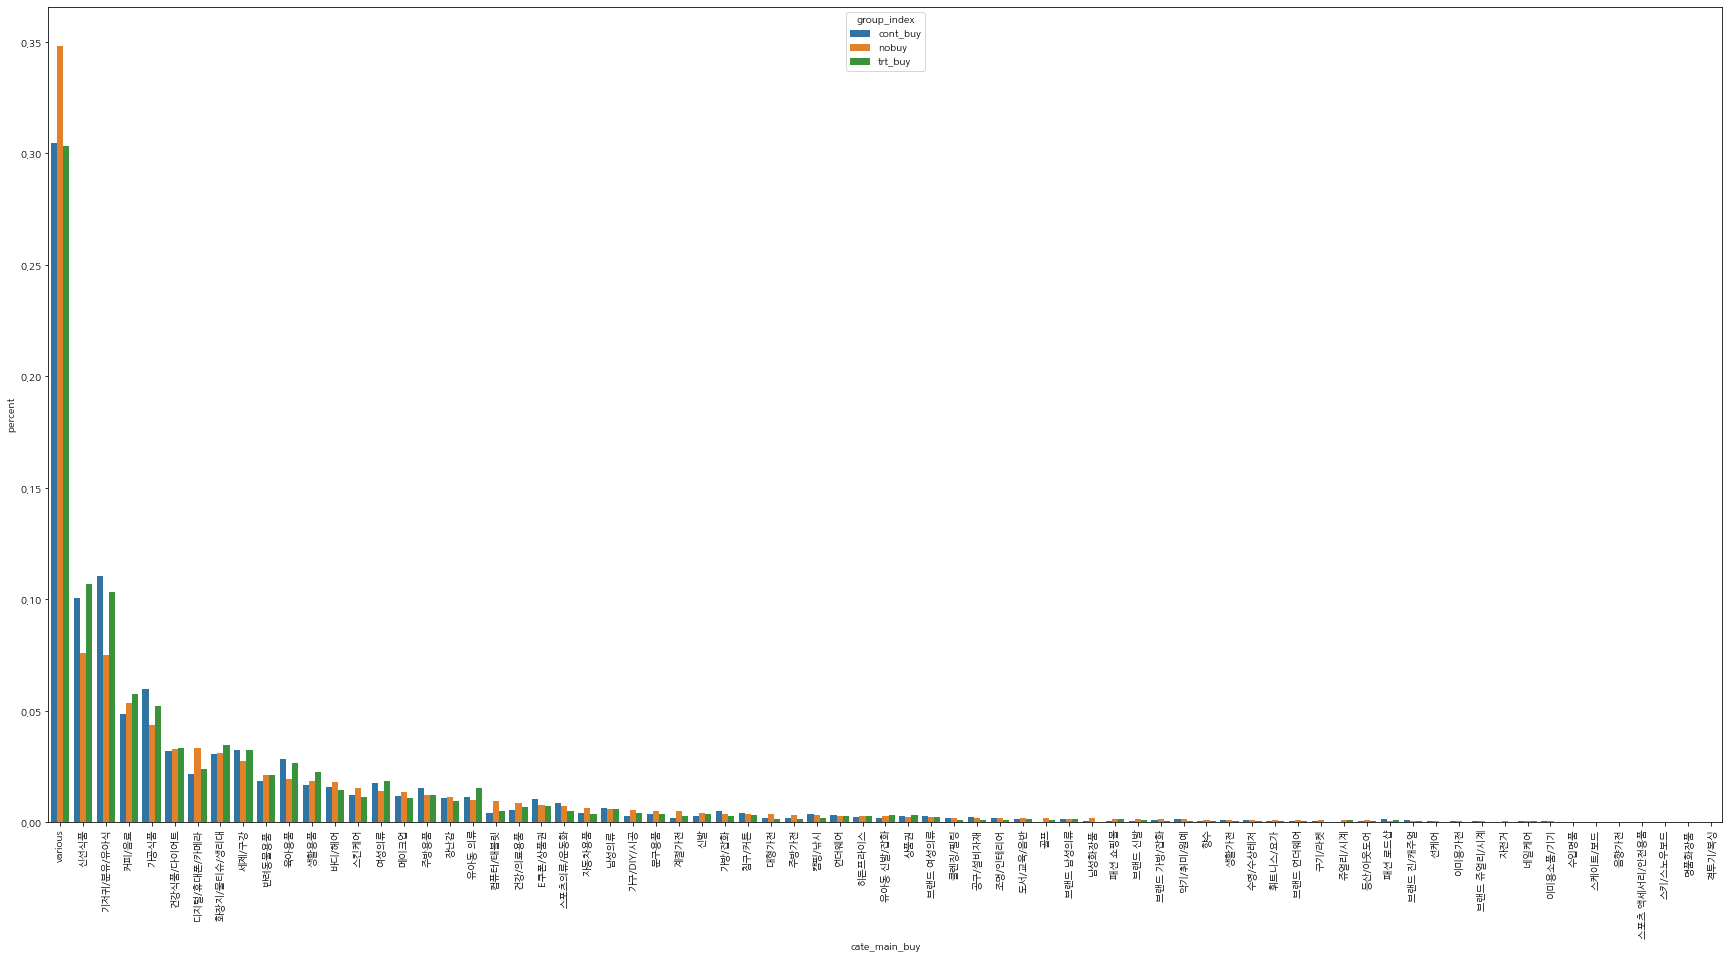

In [431]:
pct = (group_merged_data.groupby(['group_index', 'cate_main_buy']).size()/group_merged_data.groupby(['group_index']).size()).reset_index().rename({0:'percent'}, axis=1)

plt.figure(figsize=(30,15))
sns.barplot(x='cate_main_buy', hue='group_index', y='percent', data=pct , order = data_cate_['cate_main_buy'].value_counts().index)
plt.xticks(rotation=90)
plt.show()
plt.close()

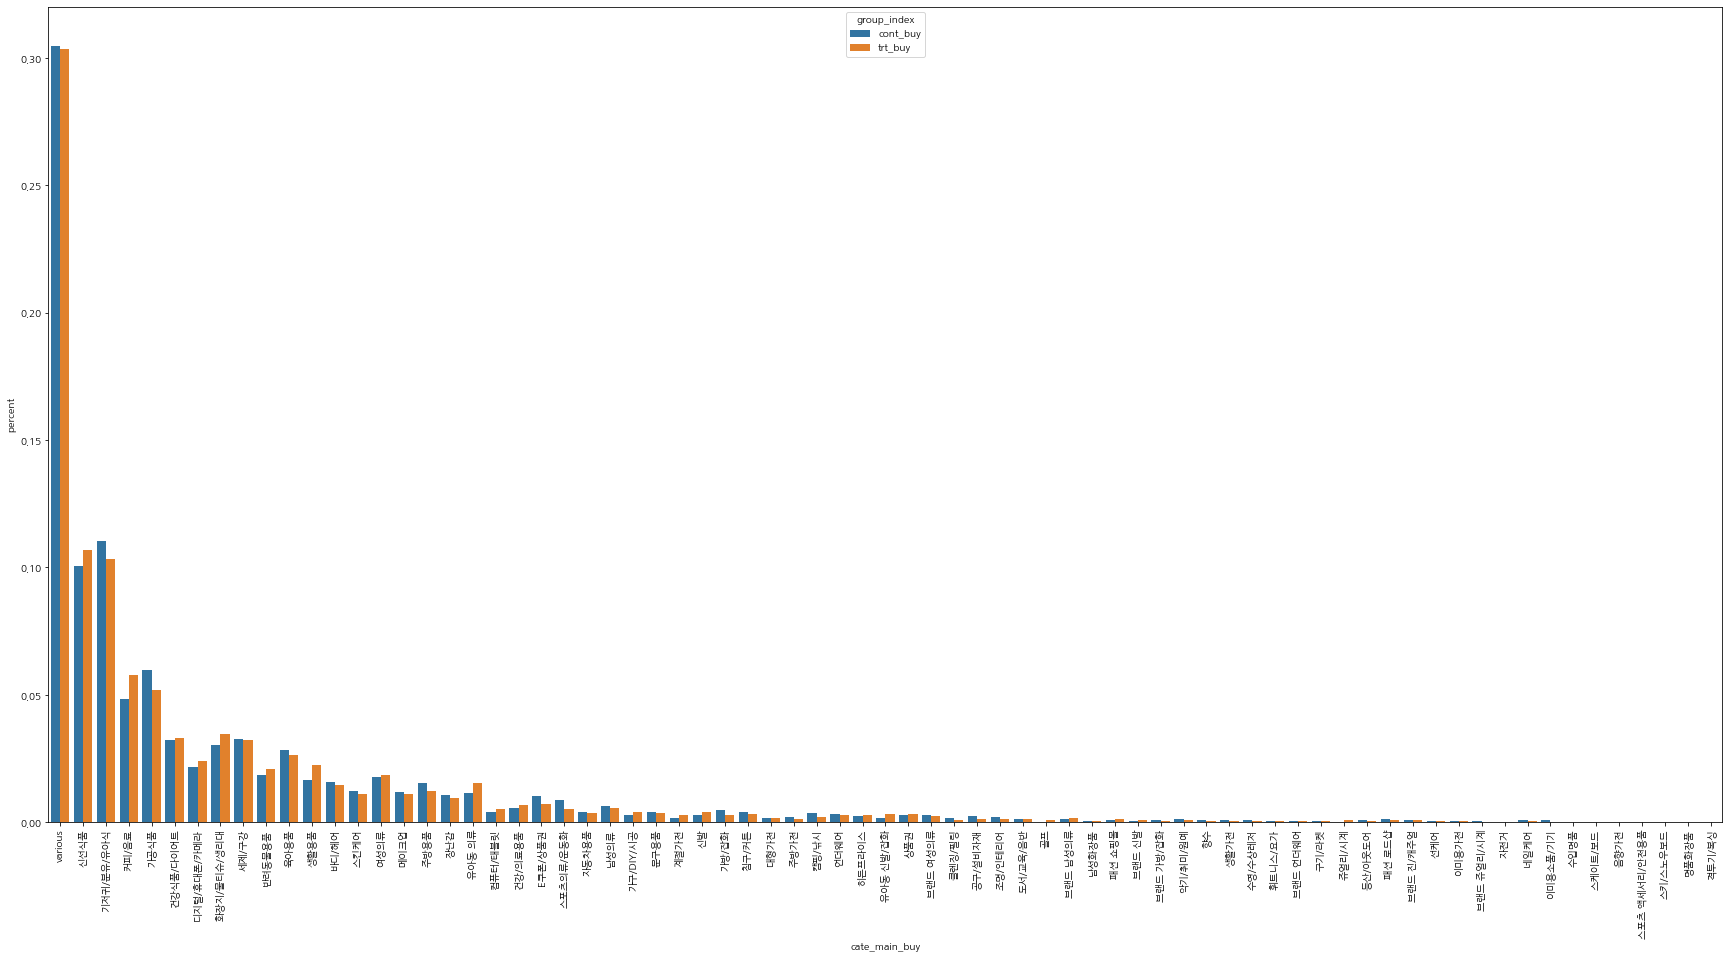

In [432]:
pct = (group_merged_data.groupby(['group_index', 'cate_main_buy']).size()/group_merged_data.groupby(['group_index']).size()).reset_index().rename({0:'percent'}, axis=1)

plt.figure(figsize=(30,15))
sns.barplot(x='cate_main_buy', hue='group_index', y='percent', data=pct[pct.group_index != 'nobuy'], order = data_cate_['cate_main_buy'].value_counts().index)
plt.xticks(rotation=90)
plt.show()
plt.close()

- 일자별로

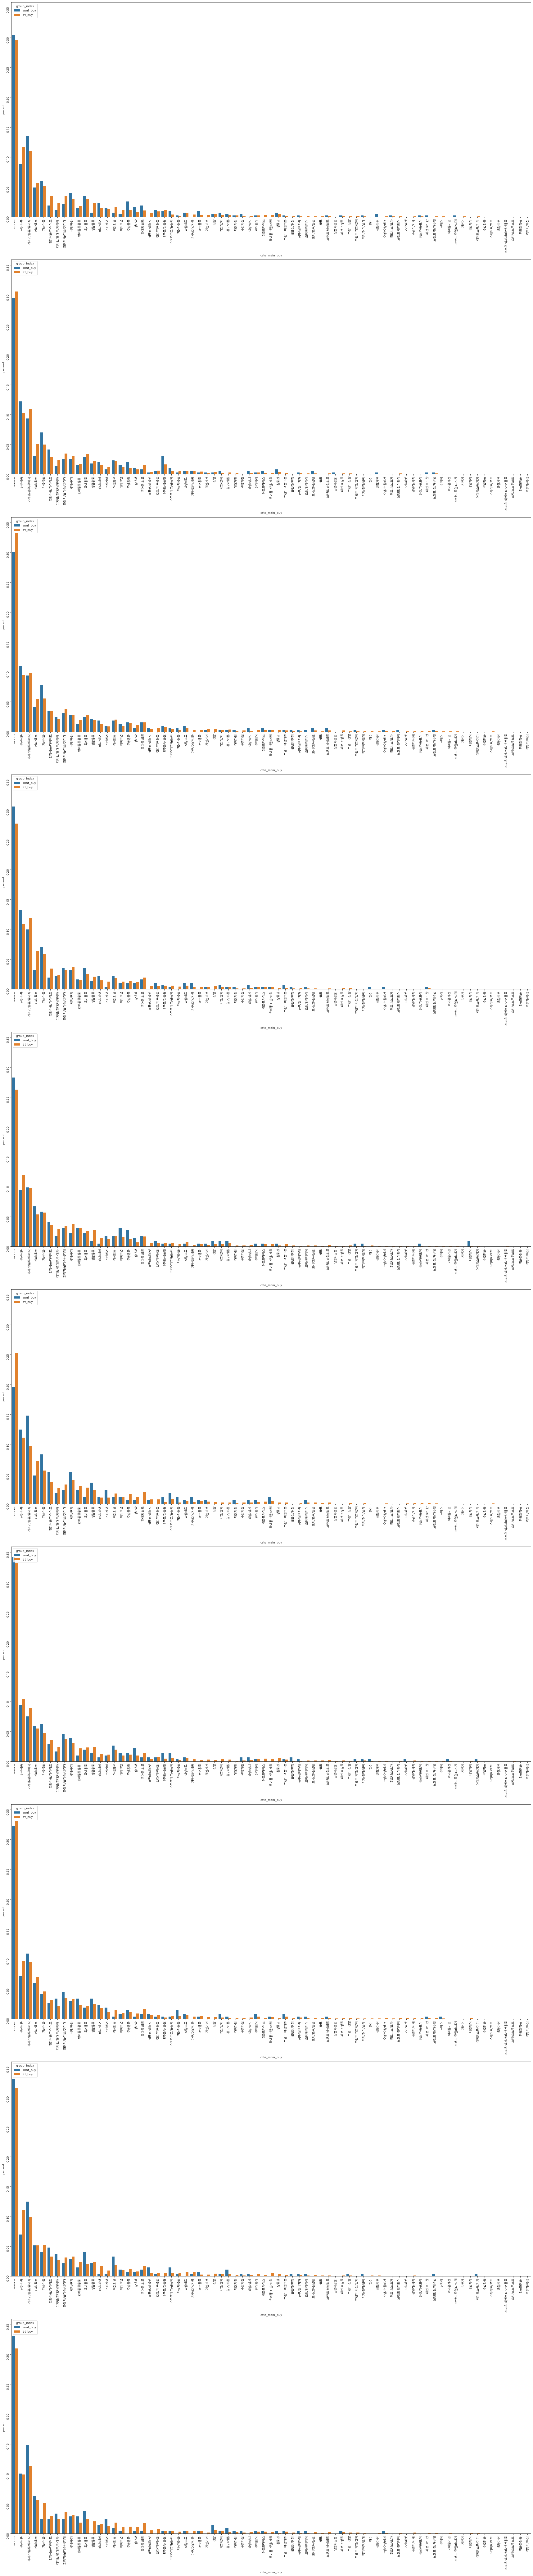

In [428]:
fig, axes = plt.subplots( nrows=10, ncols=1 , figsize=(30,150),  sharey=True)

for i, date_ in enumerate(date_array):
    
    #데이터 정의
    pct = (group_merged_data[group_merged_data.start_date == date_].groupby(['group_index', 'cate_main_buy']).size()
               /group_merged_data[group_merged_data.start_date == date_].groupby(['group_index']).size()).reset_index().rename({0:'percent'}, axis=1)
    
    #plotting
    sns.barplot(x='cate_main_buy', hue='group_index', y='percent', data=pct[pct.group_index != 'nobuy'] , ax = axes[i], order = data_cate_['cate_main_buy'].value_counts().index )
    plt.xticks(rotation=90)
    
    axes[i].tick_params(labelrotation=90)

In [427]:
data_cate.head()

start_date  result_buy_yn  cont_group     m_id  text_yn  push_yn  mail_yn  \
0  2019-11-20              1           0  1000298        1        0        1   
1  2019-11-14              0           1  1000347        1        0        1   
2  2019-11-14              0           0  1000571        1        1        1   
3  2019-11-11              0           1  1001894        1        0        1   
4  2019-11-12              0           1  1002503        1        0        1   

  buying_trend_group buy_ep_yn_3day visit_gubn last_buy_seg last_buy_platform  \
0             stable              N          O          D-2               APP   
1             stable              Y          R          D-1              MWEB   
2               long              N          O          D-1               APP   
3              short              N          O          D-3               APP   
4             stable              N          O          D-1                PC   

   wmp_pay_yn referral_flag order_route  buy_amount_avg_all_seg  \
0           0       outside        best                       1   
1           0       outside        else                       1   
2           0        inside        else                       1   
3           0        direct        else                       1   
4           0       outside     special                       1   

   rgt_elapsed_days_seg  cate_main_buy_  text_mail_wemakepay_bool  \
0                     5               3                         0   
1                     5              11                         0   
2                     5              11                         0   
3                     5               2                         0   
4                     5               3                         0   

   text_mail_wemakepay  birth  ad_uv_yn                  id  
0                    2     30         1  2019-11-20_1000298  
1                    2     30         1  2019-11-14_1000347  
2                    2     40         1  2019-11-14_1000571  
3                    2     30         1  2019-11-11_1001894  
4                    2     80         1  2019-11-12_1002503

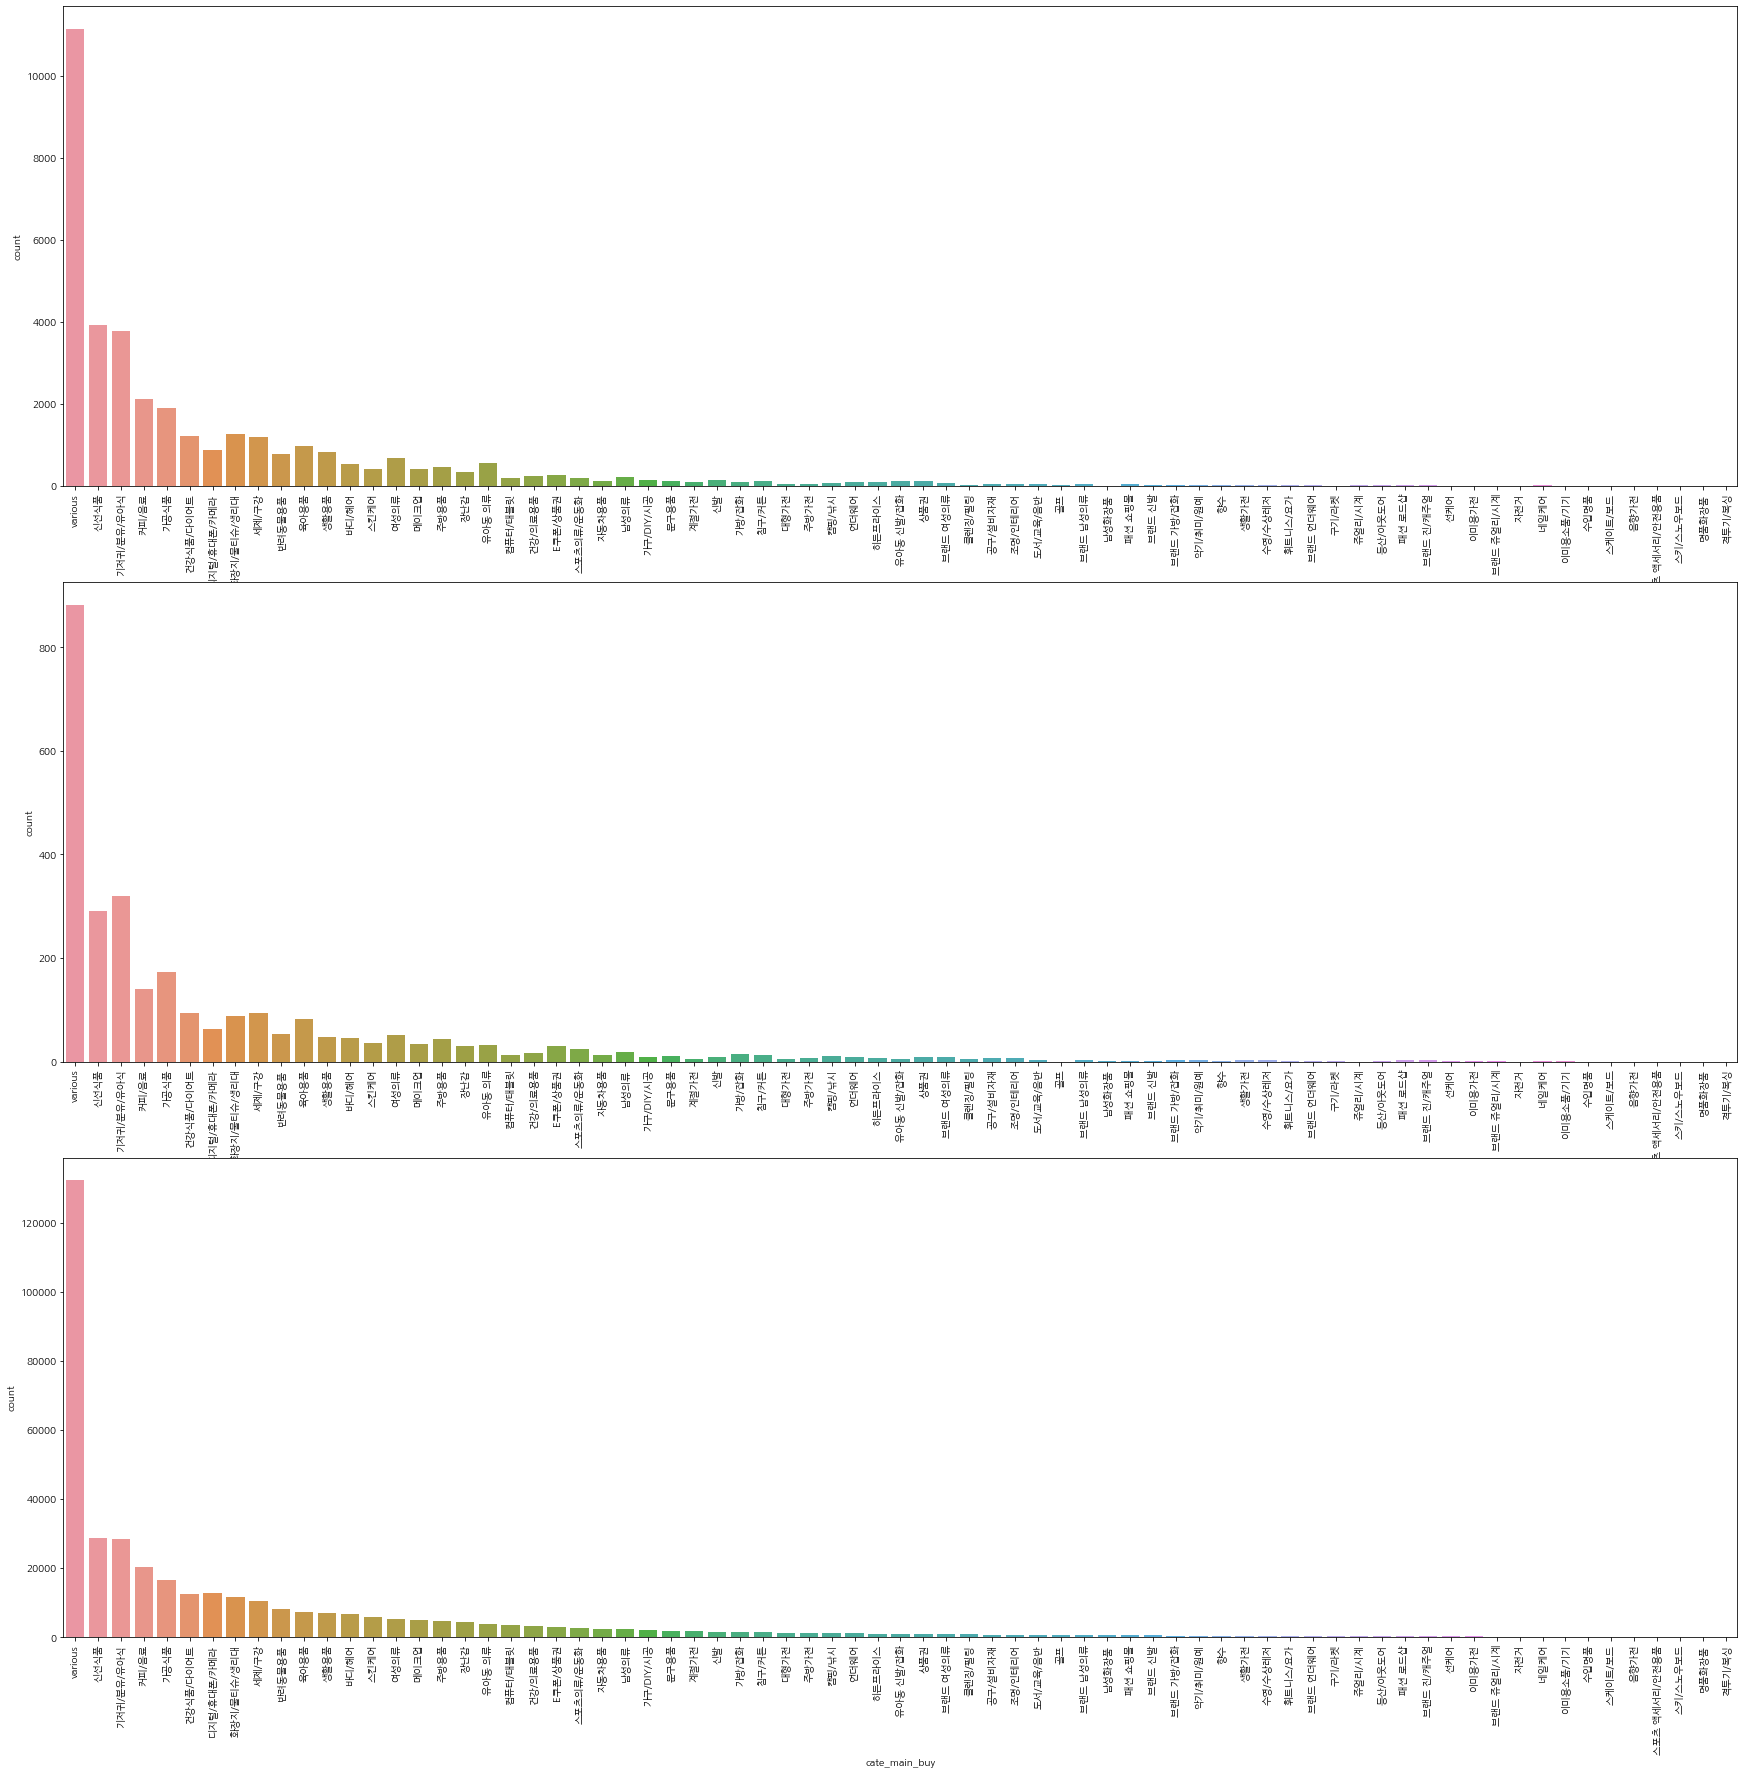

In [74]:
#rc('font', family = 'NanumGothic')

# 전체
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30,30) )

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


sns.countplot( x = 'cate_main_buy', data = trt_data , ax = axes[0], order = data_cate_['cate_main_buy'].value_counts().index)

sns.countplot( x = 'cate_main_buy', data = cont_data , ax = axes[1], order = data_cate_['cate_main_buy'].value_counts().index)

sns.countplot( x = 'cate_main_buy', data = nobuy_data , ax = axes[2], order = data_cate_['cate_main_buy'].value_counts().index)

plt.show()

### ### lcate

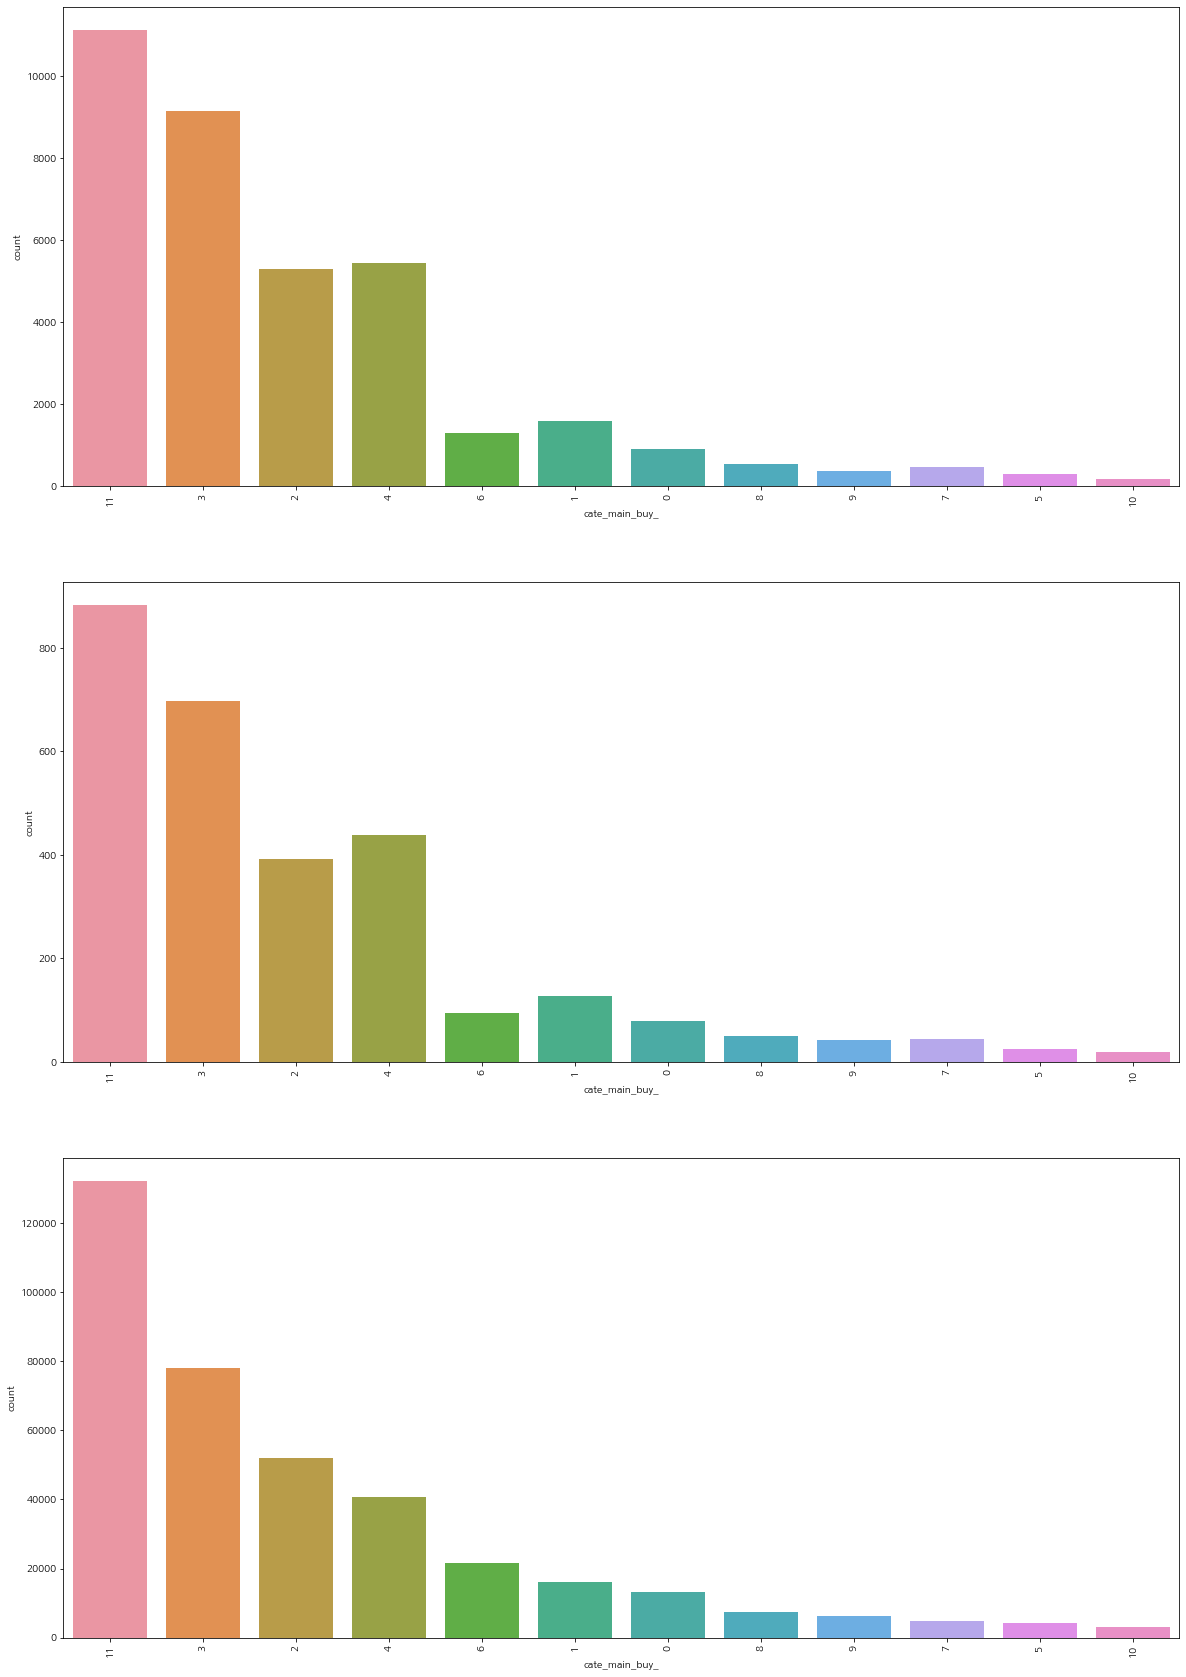

In [77]:
#rc('font', family = 'NanumGothic')

# 전체
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,30) )

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


sns.countplot( x = 'cate_main_buy_', data = trt_data , ax = axes[0], order = data_cate_['cate_main_buy_'].value_counts().index)

sns.countplot( x = 'cate_main_buy_', data = cont_data , ax = axes[1], order = data_cate_['cate_main_buy_'].value_counts().index)

sns.countplot( x = 'cate_main_buy_', data = nobuy_data , ax = axes[2], order = data_cate_['cate_main_buy_'].value_counts().index)

plt.show()

### ### buy_cate_3day

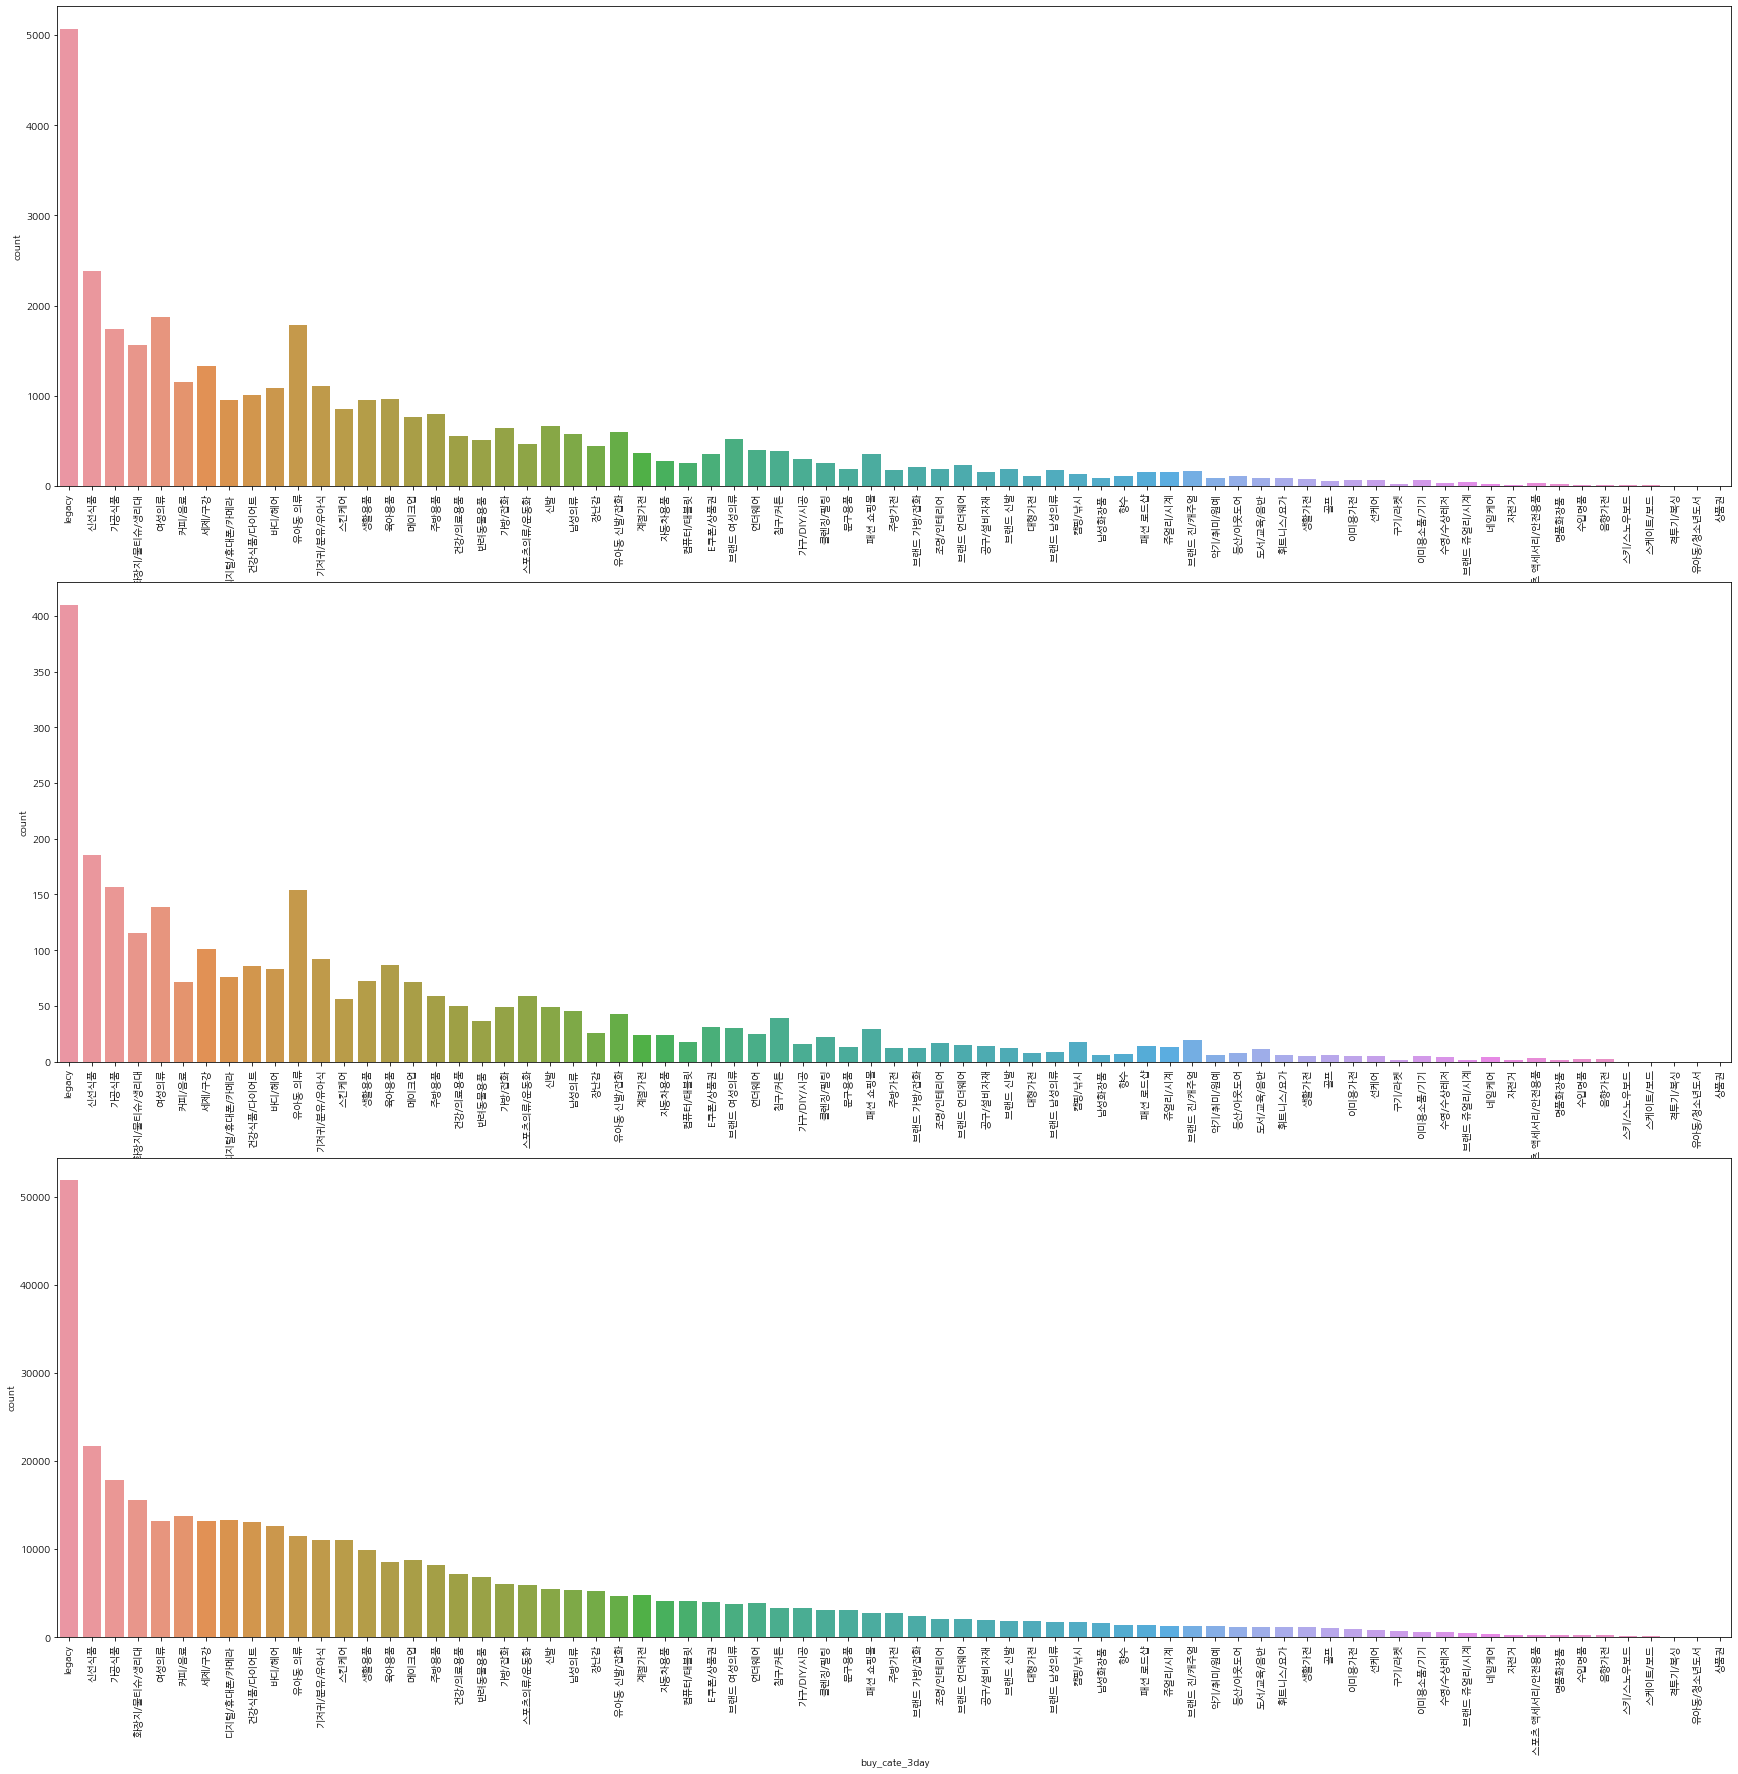

In [78]:
#rc('font', family = 'NanumGothic')

# 전체
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30,30) )

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


sns.countplot( x = 'buy_cate_3day', data = trt_data , ax = axes[0], order = data_cate_['buy_cate_3day'].value_counts().index)

sns.countplot( x = 'buy_cate_3day', data = cont_data , ax = axes[1], order = data_cate_['buy_cate_3day'].value_counts().index)

sns.countplot( x = 'buy_cate_3day', data = nobuy_data , ax = axes[2], order = data_cate_['buy_cate_3day'].value_counts().index)

plt.show()

---
---
---

# 2. 모델링
- poly3 simple 모델 변수들 load : ['buy_cnt_payment_3day', 'dt_cnt_last_buy']
- poly3 와 data_cate_ 의 row 순서 같다! - 붙여서 사용하면 돼!

In [61]:
# poly3 simple 데이터 load

poly3 = pd.read_csv('poly3_simple_0206.csv', index_col = 0)

In [78]:
poly3.head()

start_date  result_buy_yn  cont_group  buy_cnt_payment_3day  \
0  2019-11-20              1           0                   3.0   
1  2019-11-14              0           1                   1.0   
2  2019-11-14              0           0                   1.0   
3  2019-11-11              0           1                   1.0   
4  2019-11-12              0           1                   2.0   

   dt_cnt_last_buy wmp_freq text_mail_wemakepay  \
0                                         192.0   
1                                        1780.0   
2                                         216.0   
3                                          84.0   
4                                        1922.0   

   text_mail_wemakepay search_cnt  
0                           168.0  
1                            -2.0  
2                            44.0  
3                            50.0  
4                           100.0

In [79]:
data_cate_.head()

start_date  result_buy_yn  cont_group     m_id  text_yn  push_yn  mail_yn  \
0  2019-11-20              1           0  1000298        1        0        1   
1  2019-11-14              0           1  1000347        1        0        1   
2  2019-11-14              0           0  1000571        1        1        1   
3  2019-11-11              0           1  1001894        1        0        1   
4  2019-11-12              0           1  1002503        1        0        1   

  buying_trend_group buy_ep_yn_3day visit_gubn last_buy_seg last_buy_platform  \
0             stable              N          O          D-2               APP   
1             stable              Y          R          D-1              MWEB   
2               long              N          O          D-1               APP   
3              short              N          O          D-3               APP   
4             stable              N          O          D-1                PC   

   wmp_pay_yn referral_flag order_route  buy_amount_avg_all_seg  \
0           0       outside        best                       1   
1           0       outside        else                       1   
2           0        inside        else                       1   
3           0        direct        else                       1   
4           0       outside     special                       1   

   rgt_elapsed_days_seg  cate_main_buy_  text_mail_wemakepay_bool  \
0                     5               3                         0   
1                     5              11                         0   
2                     5              11                         0   
3                     5               2                         0   
4                     5               3                         0   

   text_mail_wemakepay  birth  ad_uv_yn cate_main_buy buy_cate_3day  
0                    2     30         1          신선식품        legacy  
1                    2     30         1       various         바디/헤어  
2                    2     40         1       various        legacy  
3                    2     30         1   화장지/물티슈/생리대        클렌징/필링  
4                    2     80         1          신선식품          신선식품

In [80]:
data_cate_.nunique()

start_date                      10
result_buy_yn                    2
cont_group                       2
m_id                        411220
text_yn                          2
push_yn                          2
mail_yn                          2
buying_trend_group               3
buy_ep_yn_3day                   2
visit_gubn                       3
last_buy_seg                     3
last_buy_platform                3
wmp_pay_yn                       2
referral_flag                    4
order_route                      4
buy_amount_avg_all_seg           6
rgt_elapsed_days_seg             6
cate_main_buy_                  12
text_mail_wemakepay_bool         2
text_mail_wemakepay              4
birth                            7
ad_uv_yn                         2
cate_main_buy                   73
buy_cate_3day                   73
dtype: int64

---

### ### candidate 0 : poly3

In [95]:
poly3.head()

start_date  result_buy_yn  cont_group  buy_cnt_payment_3day  \
0  2019-11-20              1           0                   3.0   
1  2019-11-14              0           1                   1.0   
2  2019-11-14              0           0                   1.0   
3  2019-11-11              0           1                   1.0   
4  2019-11-12              0           1                   2.0   

   dt_cnt_last_buy wmp_freq text_mail_wemakepay  \
0                                         192.0   
1                                        1780.0   
2                                         216.0   
3                                          84.0   
4                                        1922.0   

   text_mail_wemakepay search_cnt  
0                           168.0  
1                            -2.0  
2                            44.0  
3                            50.0  
4                           100.0

### - 20일

In [161]:
# test : 20일

train_ = poly3[ poly3.start_date < '2019-11-20'  ]
test_  = poly3[ poly3.start_date == '2019-11-20' ]
data_input = ( train_.drop(columns=['start_date']), test_.drop(columns=['start_date']) )

In [162]:
print( data_input[0].shape, data_input[1].shape )

(291644, 5) (44299, 5)


In [163]:
up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )

In [164]:
data_input[0].head()

result_buy_yn  cont_group  buy_cnt_payment_3day  \
1              0           1                   1.0   
2              0           0                   1.0   
3              0           1                   1.0   
4              0           1                   2.0   
6              0           1                   1.0   

   dt_cnt_last_buy wmp_freq text_mail_wemakepay  \
1                                        1780.0   
2                                         216.0   
3                                          84.0   
4                                        1922.0   
6                                          48.0   

   text_mail_wemakepay search_cnt  
1                            -2.0  
2                            44.0  
3                            50.0  
4                           100.0  
6                            -2.0

2020-02-06 18:10:36.989109


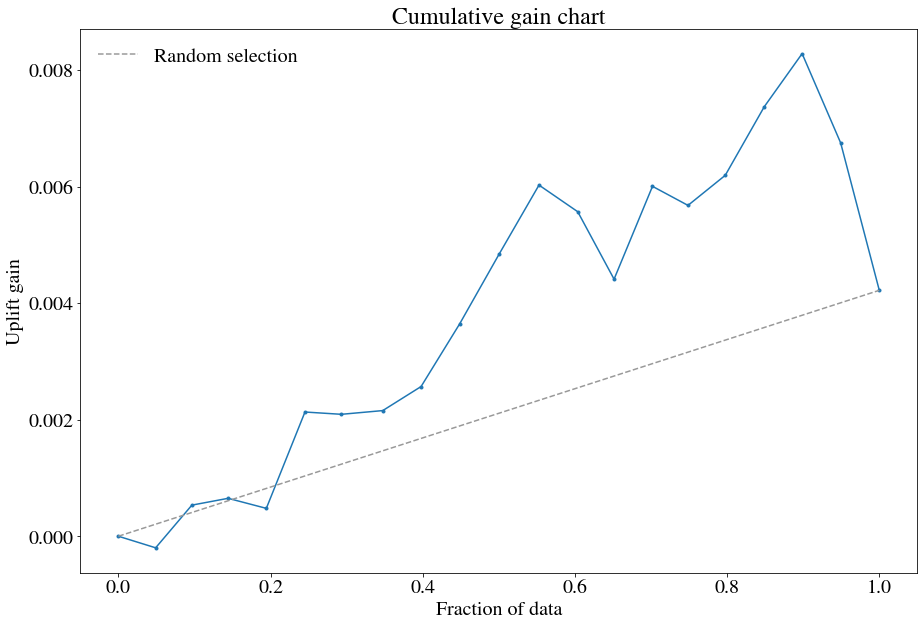

In [107]:
# 

print(datetime.datetime.now())

up.fit()
up.plot() # 

- 결과가 왜이러지??

In [108]:
# default paramter 가 바뀌었다...!
up.model # 바뀐거

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [145]:
up.model # 이전

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, num_parallel_tree=1, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='auto', verbosity=1)

In [109]:
default_parameters = {'base_score':0.5, 'booster':'gbtree', 'colsample_bylevel':1,
             'colsample_bynode':1, 'colsample_bytree':1, 'gamma':0,
             'importance_type':'gain', 'learning_rate':0.1, 'max_delta_step':0,
             'max_depth':3, 'min_child_weight':1, 'missing':None, 'n_estimators':100,
             'n_jobs':1, 'num_parallel_tree':1, 'objective':'reg:squarederror',
             'random_state':0, 'reg_alpha':0, 'reg_lambda':1, 'scale_pos_weight':1,
             'subsample':1, 'tree_method':'auto', 'verbosity':1}

2020-02-06 18:16:40.492706


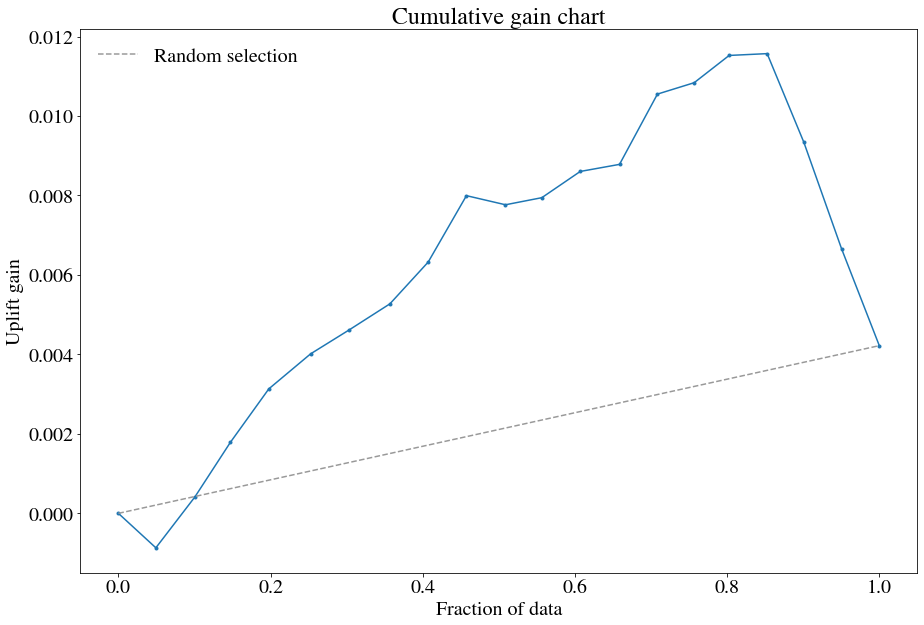

In [110]:
# default_parameters로 적용해주니깐 똑같아!

print(datetime.datetime.now())

up.fit( **default_parameters )
up.plot() # 

2020-02-06 18:29:34.167162


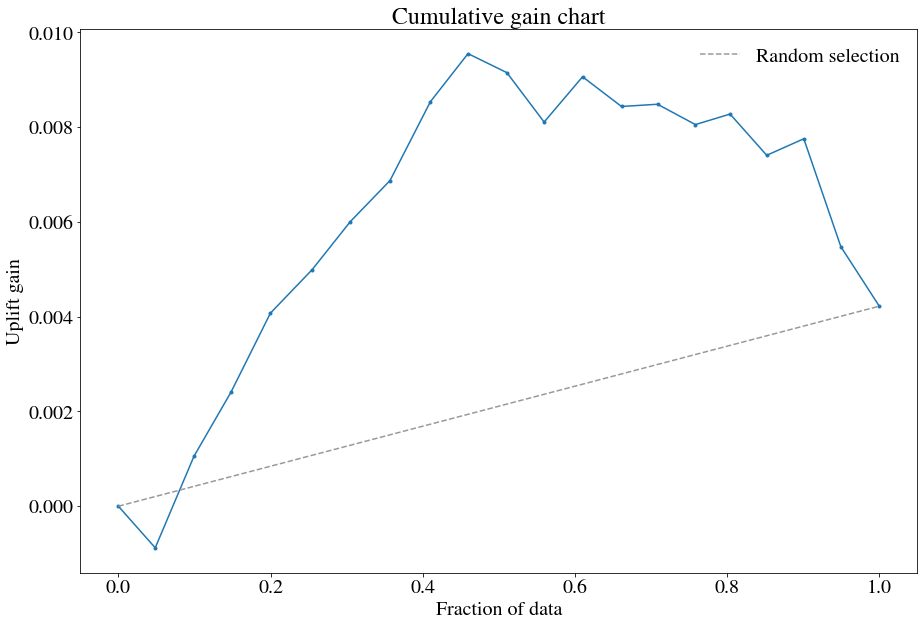

In [126]:
# 

print(datetime.datetime.now())

parameters = default_parameters.copy()
parameters.update({'n_estimators': 60})

up.fit( **parameters )
up.plot() # 

### ### 20일, Random under-sampling

In [165]:
# under-sampling

size = train_[train_.result_buy_yn == 1].shape[0]

buy_0_index = train_[train_.result_buy_yn == 0].sample(n=size).index.tolist() # buy_0 sampling
buy_1_index = train_[train_.result_buy_yn == 1].index.tolist()

sampled_train = train_[train_.index.isin(buy_0_index + buy_1_index)]

print(sampled_train.shape, test_.shape)

(58566, 6) (44299, 6)


In [166]:
data_input = ( sampled_train.drop(columns=['start_date']), test_.drop(columns=['start_date']) )

In [167]:
print( data_input[0].shape, data_input[1].shape )

(58566, 5) (44299, 5)


In [168]:
data_input[0].head()

result_buy_yn  cont_group  buy_cnt_payment_3day  \
6               0           1                   1.0   
8               0           1                   1.0   
19              1           1                   2.0   
23              1           1                   2.0   
25              0           1                   2.0   

    dt_cnt_last_buy wmp_freq text_mail_wemakepay  \
6                                           48.0   
8                                          498.0   
19                                        2640.0   
23                                        1566.0   
25                                          35.0   

    text_mail_wemakepay search_cnt  
6                             -2.0  
8                             10.0  
19                           126.0  
23                           387.0  
25                           104.0

In [169]:
up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )

2020-02-06 18:45:26.383556


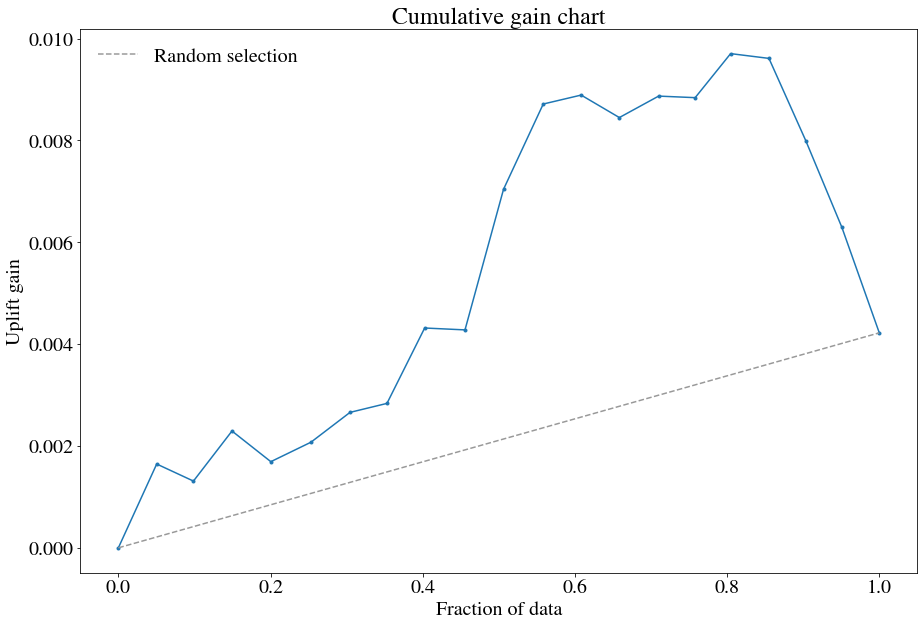

In [170]:
# 

print(datetime.datetime.now())

up.fit( **default_parameters )
up.plot() # 

In [171]:
up.test_results_.q1_aqini

0.04319708643391839

---

### (poly3 + order_route)

In [172]:
poly3_orderroute.head()

start_date  result_buy_yn  cont_group  buy_cnt_payment_3day  \
0  2019-11-20              1           0                   3.0   
1  2019-11-14              0           1                   1.0   
2  2019-11-14              0           0                   1.0   
3  2019-11-11              0           1                   1.0   
4  2019-11-12              0           1                   2.0   

   dt_cnt_last_buy wmp_freq text_mail_wemakepay  \
0                                         192.0   
1                                        1780.0   
2                                         216.0   
3                                          84.0   
4                                        1922.0   

   text_mail_wemakepay search_cnt  best  else  special  wmp_pick  
0                           168.0     1     0        0         0  
1                            -2.0     0     1        0         0  
2                            44.0     0     1        0         0  
3                            50.0     0     1        0         0  
4                           100.0     0     0        1         0

- 20일

In [179]:
# test : 20일

train_ = poly3_orderroute[ poly3_orderroute.start_date < '2019-11-20'  ]
test_  = poly3_orderroute[ poly3_orderroute.start_date == '2019-11-20' ]
data_input = ( train_.drop(columns=['start_date']), test_.drop(columns=['start_date']) )

In [180]:
print( data_input[0].shape, data_input[1].shape )

(291644, 9) (44299, 9)


In [181]:
up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )

In [182]:
data_input[0].head()

result_buy_yn  cont_group  buy_cnt_payment_3day  \
1              0           1                   1.0   
2              0           0                   1.0   
3              0           1                   1.0   
4              0           1                   2.0   
6              0           1                   1.0   

   dt_cnt_last_buy wmp_freq text_mail_wemakepay  \
1                                        1780.0   
2                                         216.0   
3                                          84.0   
4                                        1922.0   
6                                          48.0   

   text_mail_wemakepay search_cnt  best  else  special  wmp_pick  
1                            -2.0     0     1        0         0  
2                            44.0     0     1        0         0  
3                            50.0     0     1        0         0  
4                           100.0     0     0        1         0  
6                            -2.0     0     1        0         0

2020-02-06 18:47:53.803208


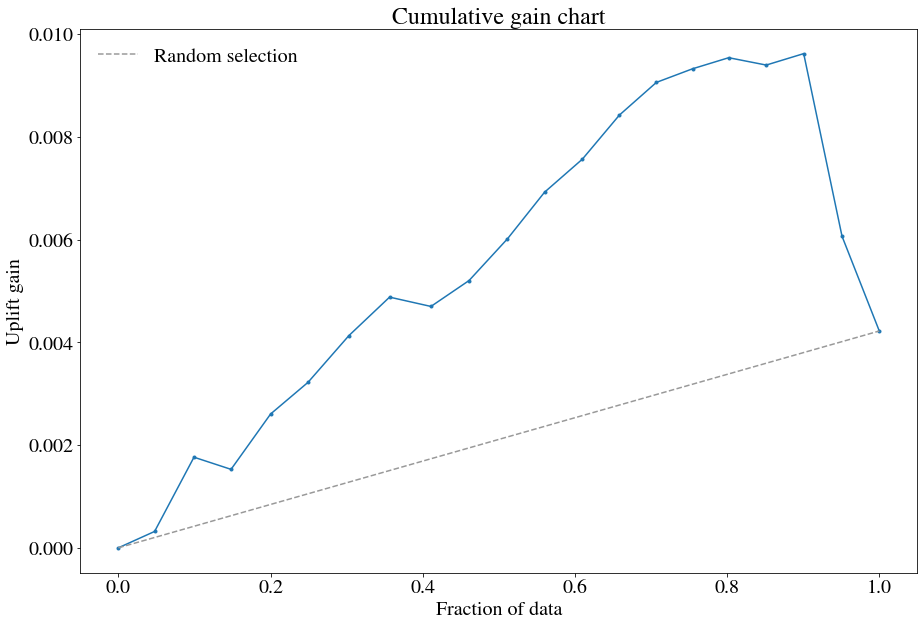

In [183]:
# 

print(datetime.datetime.now())

up.fit( **default_parameters )
up.plot() # 

In [184]:
up.test_results_.q1_aqini

0.044084356316917976

2020-02-06 18:49:13.661698


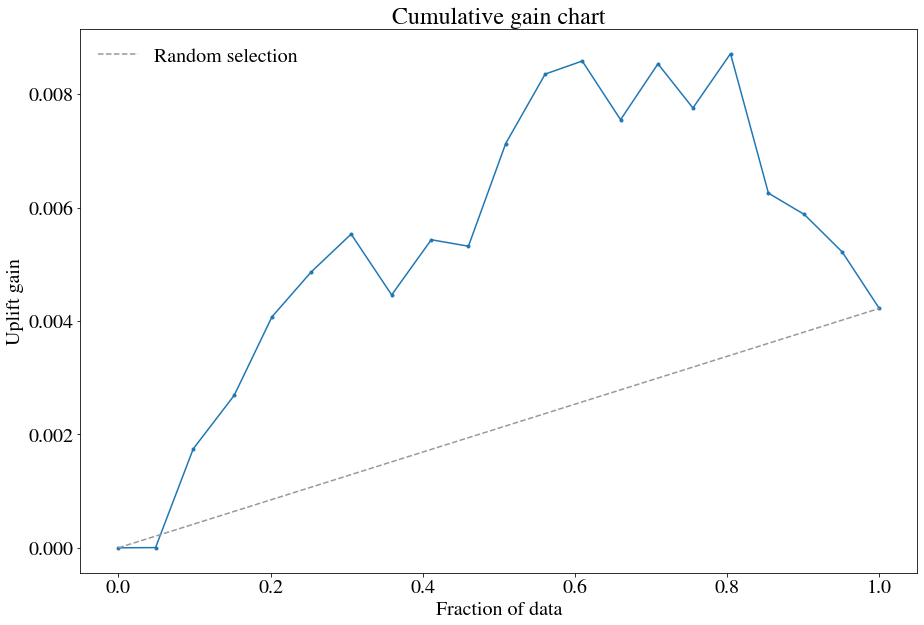

In [185]:
# 

print(datetime.datetime.now())

parameters = default_parameters.copy()
parameters.update({'n_estimators': 60})

up.fit( **parameters )
up.plot() # 

In [186]:
up.test_results_.q1_aqini

0.04096306052660758

### ### 20일, Random under-sampling

In [187]:
# under-sampling

size = train_[train_.result_buy_yn == 1].shape[0]

buy_0_index = train_[train_.result_buy_yn == 0].sample(n=size).index.tolist() # buy_0 sampling
buy_1_index = train_[train_.result_buy_yn == 1].index.tolist()

sampled_train = train_[train_.index.isin(buy_0_index + buy_1_index)]

print(sampled_train.shape, test_.shape)

(58566, 10) (44299, 10)


In [188]:
data_input = ( sampled_train.drop(columns=['start_date']), test_.drop(columns=['start_date']) )

In [189]:
print( data_input[0].shape, data_input[1].shape )

(58566, 9) (44299, 9)


In [190]:
data_input[0].head()

result_buy_yn  cont_group  buy_cnt_payment_3day  \
13              0           1                   1.0   
19              1           1                   2.0   
23              1           1                   2.0   
29              1           0                   1.0   
36              0           1                   1.0   

    dt_cnt_last_buy wmp_freq text_mail_wemakepay  \
13                                        -240.0   
19                                        2640.0   
23                                        1566.0   
29                                        -175.0   
36                                        2940.0   

    text_mail_wemakepay search_cnt  best  else  special  wmp_pick  
13                           -56.0     0     0        0         1  
19                           126.0     0     0        1         0  
23                           387.0     0     0        1         0  
29                          -171.0     0     0        1         0  
36                           234.0     0     0        1         0

In [191]:
up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )

2020-02-06 18:50:10.133294


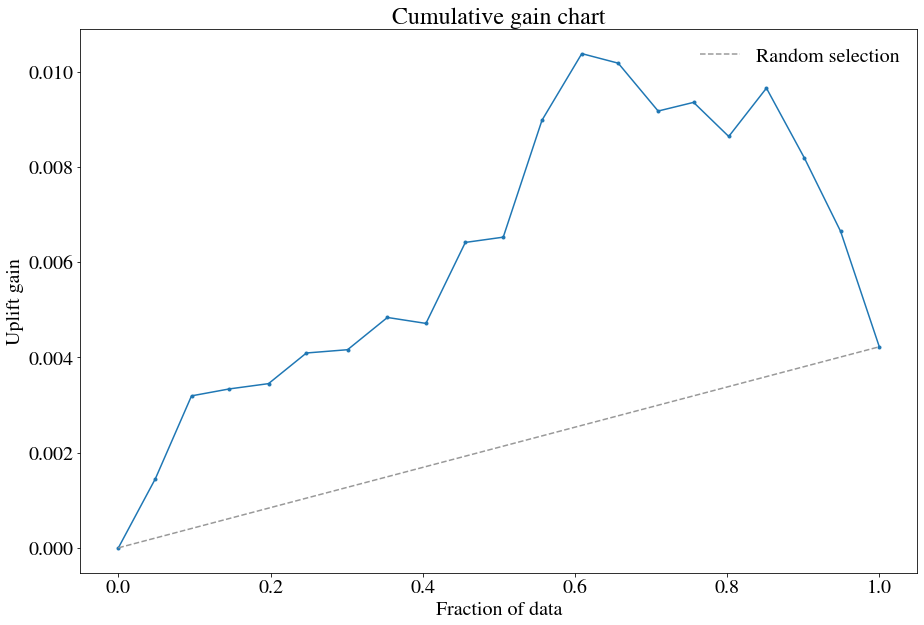

In [192]:
# 

print(datetime.datetime.now())

up.fit( **default_parameters )
up.plot() # 

In [193]:
up.test_results_.q1_aqini # 값은 좋아보여도, 별로 바람직하지 않다.

0.05295908406434636

---

### - 21일

### (poly3)

In [152]:
# test : 20일

train_ = poly3[ poly3.start_date < '2019-11-21'  ]
test_  = poly3[ poly3.start_date == '2019-11-21' ]
data_input = ( train_.drop(columns=['start_date']), test_.drop(columns=['start_date']) )

In [153]:
print( data_input[0].shape, data_input[1].shape )

(335943, 5) (41976, 5)


In [129]:
up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )

In [130]:
data_input[0].head()

result_buy_yn  cont_group  buy_cnt_payment_3day  \
0              1           0                   3.0   
1              0           1                   1.0   
2              0           0                   1.0   
3              0           1                   1.0   
4              0           1                   2.0   

   dt_cnt_last_buy wmp_freq text_mail_wemakepay  \
0                                         192.0   
1                                        1780.0   
2                                         216.0   
3                                          84.0   
4                                        1922.0   

   text_mail_wemakepay search_cnt  
0                           168.0  
1                            -2.0  
2                            44.0  
3                            50.0  
4                           100.0

2020-02-06 18:32:28.160984


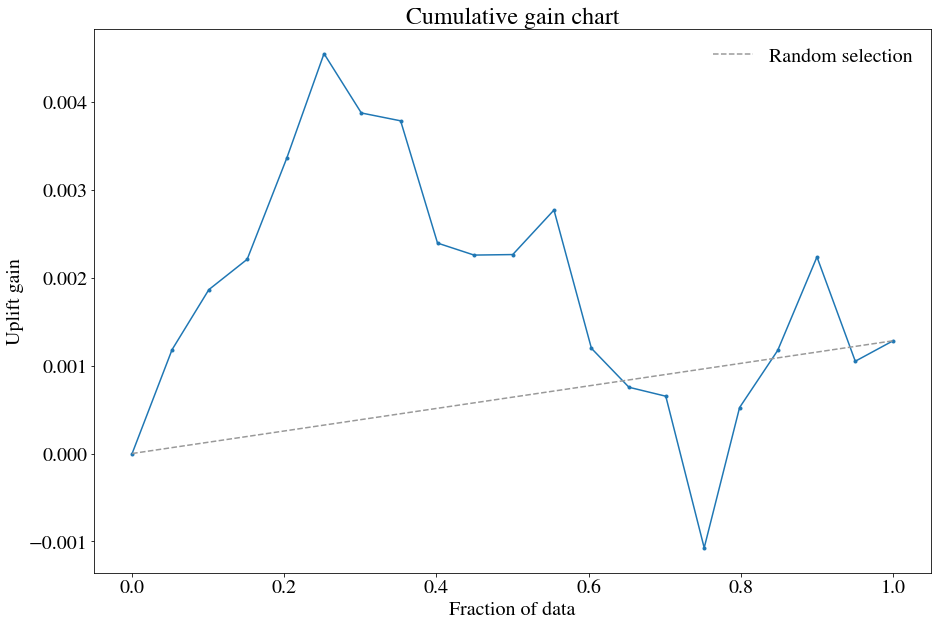

In [131]:
# default_parameters로 적용해주니깐 똑같아!

print(datetime.datetime.now())

up.fit( **default_parameters )
up.plot() # 

2020-02-06 18:33:21.164633


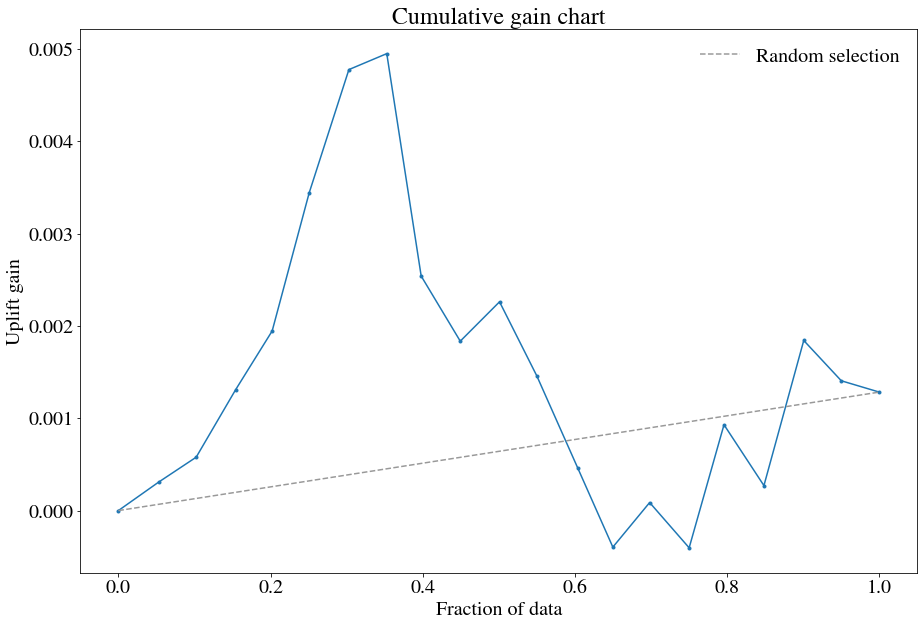

In [132]:
# 

print(datetime.datetime.now())

parameters = default_parameters.copy()
parameters.update({'n_estimators': 60})

up.fit( **parameters )
up.plot() # 

### ### 21일, Random under-sampling

In [154]:
# under-sampling

size = train_[train_.result_buy_yn == 1].shape[0]

buy_0_index = train_[train_.result_buy_yn == 0].sample(n=size).index.tolist() # buy_0 sampling
buy_1_index = train_[train_.result_buy_yn == 1].index.tolist()

sampled_train = train_[train_.index.isin(buy_0_index + buy_1_index)]

print(sampled_train.shape, test_.shape)

(66082, 6) (41976, 6)


In [155]:
data_input = ( sampled_train.drop(columns=['start_date']), test_.drop(columns=['start_date']) )

In [156]:
print( data_input[0].shape, data_input[1].shape )

(66082, 5) (41976, 5)


In [157]:
data_input[0].head()

result_buy_yn  cont_group  buy_cnt_payment_3day  \
0               1           0                   3.0   
9               0           1                   1.0   
11              0           1                   2.0   
14              0           1                   1.0   
19              1           1                   2.0   

    dt_cnt_last_buy wmp_freq text_mail_wemakepay  \
0                                          192.0   
9                                          -67.0   
11                                         192.0   
14                                        1512.0   
19                                        2640.0   

    text_mail_wemakepay search_cnt  
0                            168.0  
9                              1.0  
11                            30.0  
14                            34.0  
19                           126.0

In [158]:
up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )

2020-02-06 18:43:06.351631


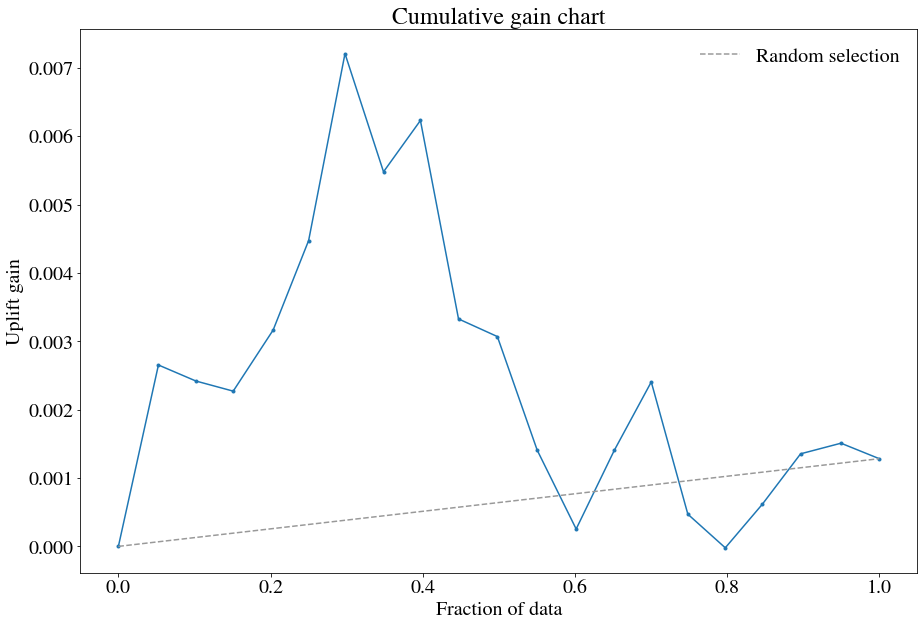

In [159]:
# 

print(datetime.datetime.now())

up.fit( **default_parameters )
up.plot() # 

In [160]:
up.test_results_.q1_aqini

0.022924936527051302

---

### (poly3 + order_route)

In [85]:
poly3_orderroute.head()

start_date  result_buy_yn  cont_group  buy_cnt_payment_3day  \
0  2019-11-20              1           0                   3.0   
1  2019-11-14              0           1                   1.0   
2  2019-11-14              0           0                   1.0   
3  2019-11-11              0           1                   1.0   
4  2019-11-12              0           1                   2.0   

   dt_cnt_last_buy wmp_freq text_mail_wemakepay  \
0                                         192.0   
1                                        1780.0   
2                                         216.0   
3                                          84.0   
4                                        1922.0   

   text_mail_wemakepay search_cnt  best  else  special  wmp_pick  
0                           168.0     1     0        0         0  
1                            -2.0     0     1        0         0  
2                            44.0     0     1        0         0  
3                            50.0     0     1        0         0  
4                           100.0     0     0        1         0

- 20일

In [133]:
# test : 20일

train_ = poly3_orderroute[ poly3_orderroute.start_date < '2019-11-21'  ]
test_  = poly3_orderroute[ poly3_orderroute.start_date == '2019-11-21' ]
data_input = ( train_.drop(columns=['start_date']), test_.drop(columns=['start_date']) )

In [134]:
print( data_input[0].shape, data_input[1].shape )

(335943, 9) (41976, 9)


In [135]:
up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )

In [136]:
data_input[0].head()

result_buy_yn  cont_group  buy_cnt_payment_3day  \
0              1           0                   3.0   
1              0           1                   1.0   
2              0           0                   1.0   
3              0           1                   1.0   
4              0           1                   2.0   

   dt_cnt_last_buy wmp_freq text_mail_wemakepay  \
0                                         192.0   
1                                        1780.0   
2                                         216.0   
3                                          84.0   
4                                        1922.0   

   text_mail_wemakepay search_cnt  best  else  special  wmp_pick  
0                           168.0     1     0        0         0  
1                            -2.0     0     1        0         0  
2                            44.0     0     1        0         0  
3                            50.0     0     1        0         0  
4                           100.0     0     0        1         0

In [137]:
import datetime

2020-02-06 18:39:33.953166


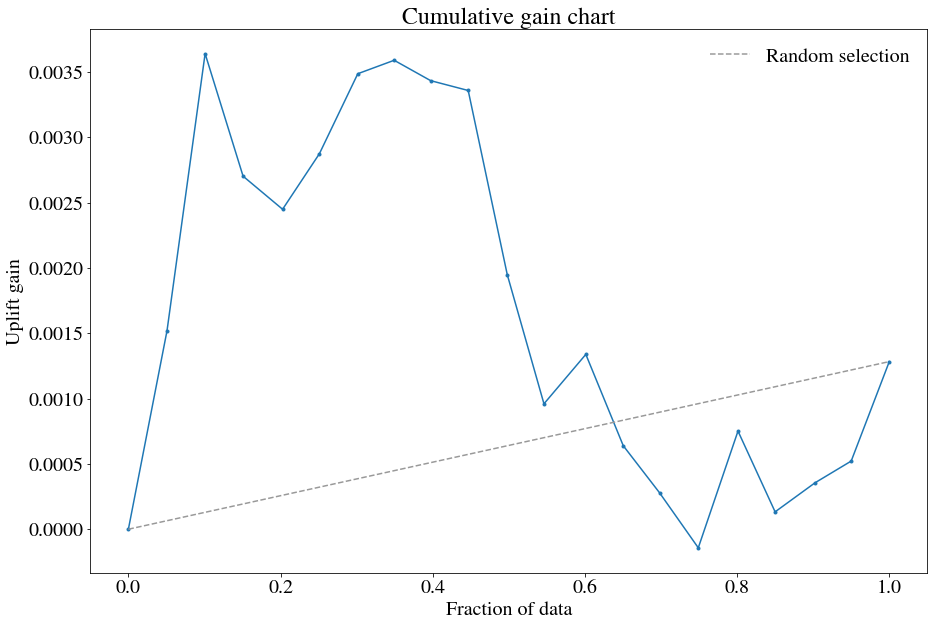

In [143]:
# 

print(datetime.datetime.now())

up.fit( **default_parameters )
up.plot() # 

In [144]:
up.test_results_.q1_aqini

0.013586896464172635

2020-02-06 18:37:01.708491


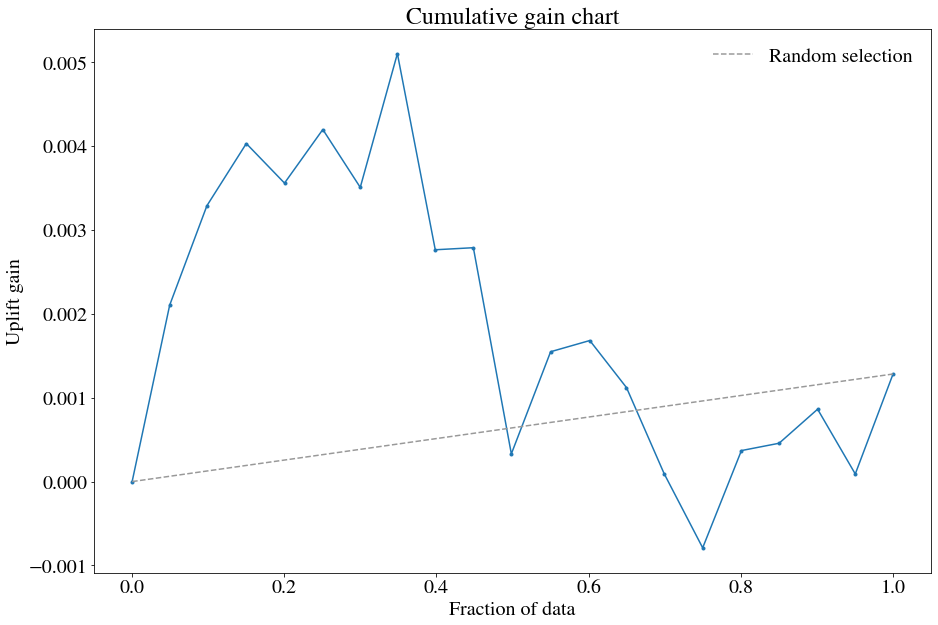

In [139]:
# 

print(datetime.datetime.now())

parameters = default_parameters.copy()
parameters.update({'n_estimators': 60})

up.fit( **parameters )
up.plot() # 

In [140]:
up.test_results_.q1_aqini

0.014605198367315978

2020-02-06 18:38:31.335485


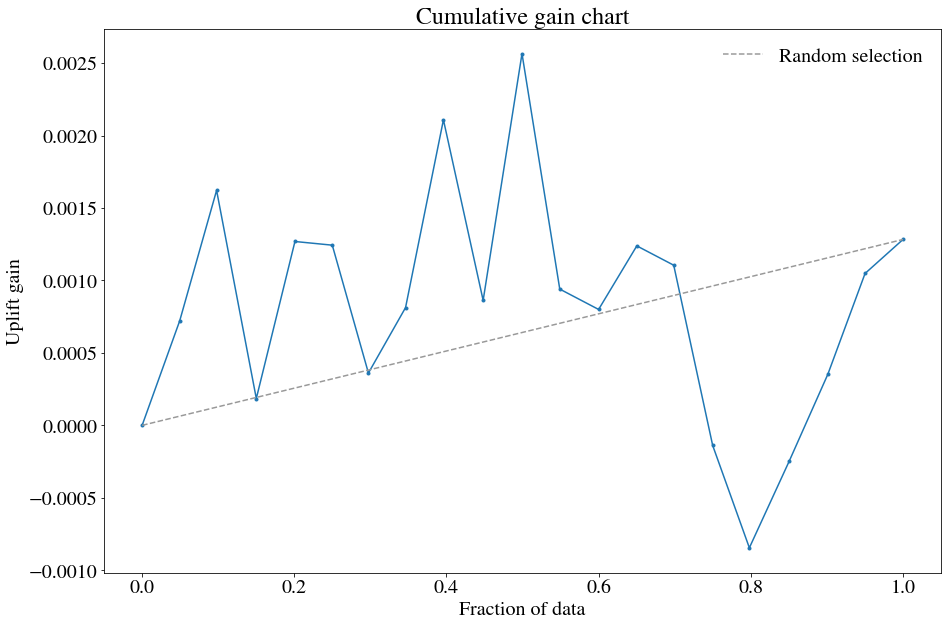

In [141]:
# 

print(datetime.datetime.now())

parameters = default_parameters.copy()
parameters.update({'n_estimators': 60, 'max_depth': 5} )

up.fit( **parameters )
up.plot() # 

In [142]:
up.test_results_.q1_aqini

0.0026100345471591836

### ### 21일, Random under-sampling

In [145]:
# under-sampling

size = train_[train_.result_buy_yn == 1].shape[0]

buy_0_index = train_[train_.result_buy_yn == 0].sample(n=size).index.tolist() # buy_0 sampling
buy_1_index = train_[train_.result_buy_yn == 1].index.tolist()

sampled_train = train_[train_.index.isin(buy_0_index + buy_1_index)]

print(sampled_train.shape, test_.shape)

(66082, 10) (41976, 10)


In [146]:
data_input = ( sampled_train.drop(columns=['start_date']), test_.drop(columns=['start_date']) )

In [147]:
print( data_input[0].shape, data_input[1].shape )

(66082, 9) (41976, 9)


In [148]:
data_input[0].head()

result_buy_yn  cont_group  buy_cnt_payment_3day  \
0               1           0                   3.0   
1               0           1                   1.0   
8               0           1                   1.0   
14              0           1                   1.0   
19              1           1                   2.0   

    dt_cnt_last_buy wmp_freq text_mail_wemakepay  \
0                                          192.0   
1                                         1780.0   
8                                          498.0   
14                                        1512.0   
19                                        2640.0   

    text_mail_wemakepay search_cnt  best  else  special  wmp_pick  
0                            168.0     1     0        0         0  
1                             -2.0     0     1        0         0  
8                             10.0     0     1        0         0  
14                            34.0     0     1        0         0  
19                           126.0     0     0        1         0

In [149]:
up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )

2020-02-06 18:42:11.219640


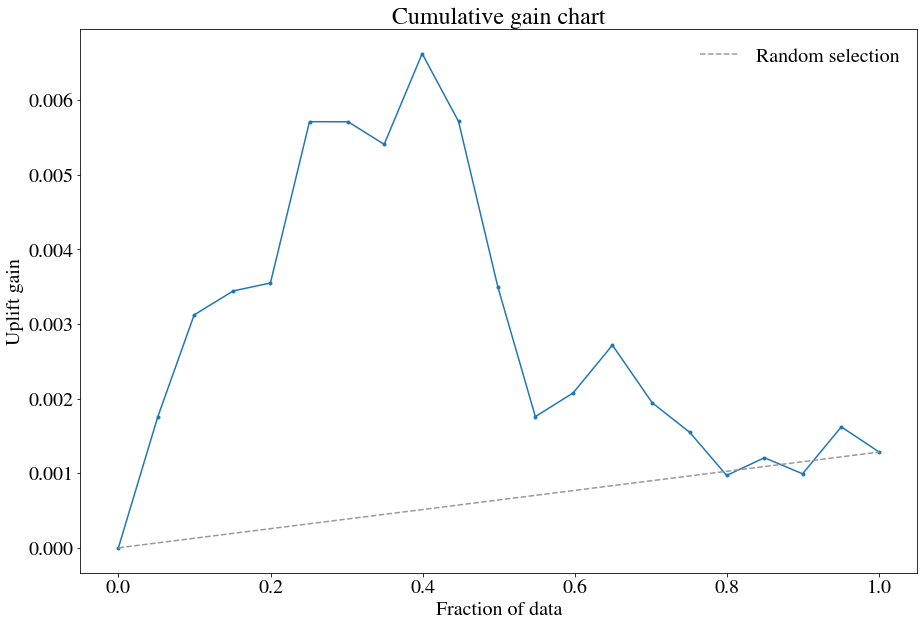

In [150]:
# 

print(datetime.datetime.now())

up.fit( **default_parameters )
up.plot() # 

In [151]:
up.test_results_.q1_aqini

0.02895634787017496